# Indus Valley Script- Text Analysis for Decipherment

# Helpers and Tests

Dataset was created as a csv file from ICIT web site from raw html files of ICIT code for each for the Text
Data labels were changes and a linearized copy of the original text was added

### Input:
Pickled data file from Language Models

### Output:
Test results


!pip install numpy
!pip install pandas
!python3 -m pip install matplotlib
!pip3 install scikit-learn
!pip3 install nltk
!pip3 install ipywidgets
!pip3 install -U dill
!pip3 install requests
!pip3 install -U spacy
!pip3 install numpy

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import collections
import random
import traceback
import pickle
import copy
nltk.download('punkt')

plt.style.use(style='seaborn')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/venkatsubramanian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from collections import defaultdict
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import everygrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.lm.models import MLE
from nltk.lm.models import KneserNeyInterpolated
from nltk.lm.models import Lidstone
from collections import Counter

In [3]:
random_seed = 8
seed = 8

# Sign Position
CONST_INITIAL = "Initial"
CONST_TERMINAL = "Terminal"
CONST_MEDIAL = "Medial"

CONST_ALL= "All"
CONST_NL = 10

# Algorithm
CONST_ALGO_SIGN_FILL_IN_FULL = "ALGO_SIGN_FILL_IN_FULL"
CONST_ALGO_SIGN_FILL_IN_START = "ALGO_SIGN_FILL_IN_START"
CONST_ALGO_MIXED = "ALGO_MIXED"

In [4]:
"""" Unpickle some of the dataframes needed """
df_train_x = pd.read_pickle('pickle/train_x.pkl')
df_train_y = pd.read_pickle('pickle/train_y.pkl')

df_train_x_rev = pd.read_pickle('pickle/train_x_rev.pkl')
df_train_y_rev = pd.read_pickle('pickle/train_y_rev.pkl')

df_test_x = pd.read_pickle('pickle/test_x.pkl')
df_test_y= pd.read_pickle('pickle/test_y.pkl')

print("Train size:", len(df_train_x))
print("Test size:", len(df_test_x))

df_test_x_rev = pd.read_pickle('pickle/test_x_rev.pkl')
df_test_y_rev = pd.read_pickle('pickle/test_y_rev.pkl')

orig_sign_df = pd.read_pickle('pickle/orig_sign_df.pkl')
print("Original sign df: \n", orig_sign_df)

df_unclear = pd.read_pickle('pickle/unclear_df.pkl')
print("Unclear text df: \n", df_unclear)

Train size: 1778
Test size: 445
Original sign df: 
     id_sign sign_class set   graph       type        image variants  \
0         1        SIM  01  stroke     stroke  sign001.jpg        1   
1         2        MKR  01  stroke     stroke  sign002.jpg        1   
2         3        SIM  01  stroke     stroke  sign003.jpg        1   
3         4        SIM  01  stroke     stroke  sign004.jpg        1   
4         5        SIM  01  stroke     stroke  sign005.jpg        1   
..      ...        ...  ..     ...        ...          ...      ...   
704     952        CMX  71  animal  uncertain  sign952.jpg        1   
705     953        CMX  71  animal       Pict  sign953.jpg        1   
706     956        SIM  71       -    att.d.e  sign956.jpg        1   
707     957        CMX  71       -  uncertain  sign957.jpg        1   
708     958        CMX  71       -  uncertain  sign958.jpg        1   

          function ligatur value frequency comment  
0    NUM, ITM, SHN       -     -       227

In [5]:
model_name_list = ["MLE","KneserNeyInterpolated", "Laplace", "Lidstone","StupidBackoff", "WittenBellInterpolated"]


"""Unpickle all the trained Language Models"""
def unpickle_models(order, model_type,data_type):
    try:
        model_list= []
        for index in range (0,len(model_name_list)):
            file_name = "pickle/" + model_name_list[index]+ "_" + model_type + "_" + data_type + "_" + str(order) +".pkl"
            print("Unpickling Model from ", file_name)
            with open(file_name , 'rb') as f:
                model_list.append(pickle.load(f))
    except Exception as e:
        print("Exception:", e.__class__, "unpickle_models")
        traceback.print_exc()
    return model_list

order=1
models_list_fwd_unigram_all = unpickle_models(order,"fwd","all")
models_list_rev_unigram_all = unpickle_models(order,"rev", "all")

order=2
models_list_fwd_bigram_all = unpickle_models(order,"fwd","all")
models_list_rev_bigram_all = unpickle_models(order,"rev","all")

order=3
models_list_fwd_trigram_all = unpickle_models(order,"fwd","all")
models_list_rev_trigram_all = unpickle_models(order,"rev","all")

order=4
models_list_fwd_quadrigram_all = unpickle_models(order,"fwd","all")
models_list_rev_quadrigram_all = unpickle_models(order,"rev","all")

order=5
models_list_fwd_pentagram_all = unpickle_models(order,"fwd","all")
models_list_rev_pentagram_all = unpickle_models(order,"rev","all")

order=6
models_list_fwd_hexagram_all = unpickle_models(order,"fwd","all")
models_list_rev_hexagram_all = unpickle_models(order,"rev","all")

order=7
models_list_fwd_septagram_all = unpickle_models(order,"fwd","all")
models_list_rev_septagram_all = unpickle_models(order,"rev","all")

order=1
models_list_fwd_unigram = unpickle_models(order,"fwd","train")
models_list_rev_unigram = unpickle_models(order,"rev", "train")

order=2
models_list_fwd_bigram = unpickle_models(order,"fwd","train")
models_list_rev_bigram = unpickle_models(order,"rev","train")

order=3
models_list_fwd_trigram = unpickle_models(order,"fwd","train")
models_list_rev_trigram = unpickle_models(order,"rev","train")

order=4
models_list_fwd_quadrigram = unpickle_models(order,"fwd","train")
models_list_rev_quadrigram = unpickle_models(order,"rev","train")

order=5
models_list_fwd_pentagram = unpickle_models(order,"fwd","train")
models_list_rev_pentagram = unpickle_models(order,"rev","train")

order=6
models_list_fwd_hexagram = unpickle_models(order,"fwd","train")
models_list_rev_hexagram = unpickle_models(order,"rev","train")

order=7
models_list_fwd_septagram = copy.deepcopy(unpickle_models(order,"fwd","train"))
models_list_rev_septagram = copy.deepcopy(unpickle_models(order,"rev","train"))


Unpickling Model from  pickle/MLE_fwd_all_1.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_fwd_all_1.pkl
Unpickling Model from  pickle/Laplace_fwd_all_1.pkl
Unpickling Model from  pickle/Lidstone_fwd_all_1.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_all_1.pkl
Unpickling Model from  pickle/WittenBellInterpolated_fwd_all_1.pkl
Unpickling Model from  pickle/MLE_rev_all_1.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_rev_all_1.pkl
Unpickling Model from  pickle/Laplace_rev_all_1.pkl
Unpickling Model from  pickle/Lidstone_rev_all_1.pkl
Unpickling Model from  pickle/StupidBackoff_rev_all_1.pkl
Unpickling Model from  pickle/WittenBellInterpolated_rev_all_1.pkl
Unpickling Model from  pickle/MLE_fwd_all_2.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_fwd_all_2.pkl
Unpickling Model from  pickle/Laplace_fwd_all_2.pkl
Unpickling Model from  pickle/Lidstone_fwd_all_2.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_all_2.pkl
Unpickling Model from  pickle/Witte

Unpickling Model from  pickle/StupidBackoff_fwd_train_6.pkl
Unpickling Model from  pickle/WittenBellInterpolated_fwd_train_6.pkl
Unpickling Model from  pickle/MLE_rev_train_6.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_rev_train_6.pkl
Unpickling Model from  pickle/Laplace_rev_train_6.pkl
Unpickling Model from  pickle/Lidstone_rev_train_6.pkl
Unpickling Model from  pickle/StupidBackoff_rev_train_6.pkl
Unpickling Model from  pickle/WittenBellInterpolated_rev_train_6.pkl
Unpickling Model from  pickle/MLE_fwd_train_7.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_fwd_train_7.pkl
Unpickling Model from  pickle/Laplace_fwd_train_7.pkl
Unpickling Model from  pickle/Lidstone_fwd_train_7.pkl
Unpickling Model from  pickle/StupidBackoff_fwd_train_7.pkl
Unpickling Model from  pickle/WittenBellInterpolated_fwd_train_7.pkl
Unpickling Model from  pickle/MLE_rev_train_7.pkl
Unpickling Model from  pickle/KneserNeyInterpolated_rev_train_7.pkl
Unpickling Model from  pickle/Laplace_rev

In [6]:
def check_model(models_list):
    for index in range (0,len(models_list)):
        print("Unpicked Model Check:",model_name_list[index],"Order:", models_list[index].order, models_list[index].vocab)

In [7]:
check_model(models_list_fwd_septagram)

Unpicked Model Check: MLE Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: KneserNeyInterpolated Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: Laplace Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: Lidstone Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: StupidBackoff Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
Unpicked Model Check: WittenBellInterpolated Order: 7 <Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>


In [8]:
"""Unpickle the Initial Terminal KnesserNey Bigram model"""
file_name = "pickle/KneserNeyInterpolated_it_2.pkl"
print("Unpickling Model from ", file_name)
with open(file_name , 'rb') as f:
    model_it_bigram_kn = pickle.load(f)

Unpickling Model from  pickle/KneserNeyInterpolated_it_2.pkl


In [9]:
def reverse_text(text):
    # first split the string into chars
    chars = text.split(' ')

    # then reverse the split string list and join with a space
    reversed_text = ' '.join(reversed(chars))
    return reversed_text

In [10]:
def reverse_single_text(text):
    list_reversed_text = []
    # Tokenize to words
    # first split the string into chars
    chars = text.split(' ')

    # then reverse the split string list and join with a space
    reversed_text = ' '.join(reversed(chars))
    return reversed_text

In [11]:
def reverse_text(a):
    list_reversed_text = []
    for text in a :
        # Tokenize to words
        # first split the string into chars
        chars = text.split(' ')

        # then reverse the split string list and join with a space
        reversed_text = ' '.join(reversed(chars))
        list_reversed_text.append(reversed_text)
    return list_reversed_text 

In [12]:
# Get ngram as list given a text (pass direction_of_string as "R/L" or "L/R")
def get_ngrams_as_list(data,direction_of_string,num):
    
    if(direction_of_string=="R/L"):
        # We need to convert R/L text to L/R to be able to get ngrams using nltk
        data_string = reverse_text(data)
    
    else: data_string= data
    
    n_grams =  ngrams(nltk.word_tokenize(data_string), num)
    return  [ ' '.join(grams) for grams in n_grams]

# Text Positional Ngram Analysis Model

In [13]:
from nltk.tokenize import word_tokenize,sent_tokenize
from typing import Dict
from bisect import bisect
from itertools import accumulate

class PositionalNgramModel:
    text_norm_position_unigrams_freq_dict=None
    df_text_norm_position_unigrams_freq=None
    df_text_norm_position_unigrams_prob=None
    text_norm_position_unigrams_maxValueIndex_dict = None
    text_norm_position_unigrams_unigrams_tuple = ()
    
    text_norm_position_bigrams_freq_dict = None
    df_text_norm_position_bigrams_freq=None
    df_text_norm_position_bigrams_prob=None
    text_norm_position_bigrams_maxValueIndex_dict = None
    
    text_norm_position_trigrams_freq_dict = None
    df_text_norm_position_trigrams_freq=None
    df_text_norm_position_trigrams_prob=None
    text_norm_position_trigrams_maxValueIndex_dict = None
    
    text_norm_position_quadgrams_freq_dict= None
    df_text_norm_position_quadgrams_freq=None
    df_text_norm_position_quadgrams_prob=None
    text_norm_position_bigrams_maxValueIndex_dict = None
    

    def _random_generator(self, seed_or_generator):
        if isinstance(seed_or_generator, random.Random):
            return seed_or_generator
        return random.Random(seed_or_generator)
    
    def _weighted_choice(self, population, weights, random_generator=None):
        """Like random.choice, but with weights.
        Heavily inspired by python 3.6 `random.choices`.
        """
        if not population:
            raise ValueError("Can't choose from empty population")
        if len(population) != len(weights):
            raise ValueError("The number of weights does not match the population")
        cum_weights = list(accumulate(weights))
        total = cum_weights[-1]
        threshold = random_generator.random()
        return population[bisect(cum_weights, total * threshold)]
    
    # To get a Positional Number for a unigram, bigram, trigram and Quadgram
    # l = Length of the text
    # s = starting position of the first character of the ngram
    # wp = weighted position = int(s/l)
    # Get the normalized position
    # Since the text passed is L/R,start index i from length of the text
    def get_norm_position(self, text,direction_of_string, search_string):
        try:
            num_chars, minp, maxp,w = 0,-1,-1,0
            sp=-1
            index=-1
            pos=-1

            #ngrams which are used as search_strings are generated from left to right, so text need to be changed to L/R

            if(direction_of_string=="R/L"):
                new_text = reverse_text(text)
            else: new_text = text


            l_pos= len(new_text )

            chars = new_text .split(' ')
            num_chars = len(chars)
            w= num_chars/CONST_NL


            pos = new_text.find(search_string)
            if(pos<0):  #not found
                return sp, minp, maxp, w
            else: 
                #sp = round((l_pos-pos)/4)
                sp = round(pos/4 +1)

            minp= int((sp-1)* (CONST_NL/num_chars) +1)
            maxp = int(sp*CONST_NL/num_chars)

            #print("text, search_string", new_text ,",", search_string)
            #print("l_pos, pos, sp, minp, maxp", l_pos, pos,sp, minp, maxp)

            if(minp<1): minp=1
            elif(minp>CONST_NL): minp = CONST_NL

            if(maxp<1): maxp=1
            elif(maxp>CONST_NL): maxp = CONST_NL

        except Exception as e:
            print("Exception:", e.__class__, "get_norm_position")
            traceback.print_exc()

        return sp,minp, maxp, w


    def get_text_norm_position_ngrams_freq(self,a,direction_of_string, n):

        average_allocation= True # Average out minp and maxp and allocate to the histogram. Don't care about weight

        #text_norm_position_ngrams_freq=defaultdict(dict[int, int])
        text_norm_position_ngrams_freq=defaultdict(dict)
        
        norm_pos =-1
        i=0
        sp=-1

        try:
            #Fill the values with zeros in decreasing order so that we can keep same order in graph
            for text in a:
              for word in get_ngrams_as_list(text,direction_of_string, n):
                for j in range (10,0, -1):
                    text_norm_position_ngrams_freq[word][j]=0

            for text in a:
              for word in get_ngrams_as_list(text,direction_of_string, n):
                initial_char = word #Look for position of Initial char of the ngram
                sp,minp, maxp, w = self.get_norm_position(text,direction_of_string, initial_char)

                if(minp<0 or maxp<0): break #No match


                if(average_allocation):
                    norm_pos = round((minp+ maxp)/2)
                    #print("word, norm_pos", word, norm_pos)
                    val = text_norm_position_ngrams_freq[word].get(norm_pos,0)
                    text_norm_position_ngrams_freq[word][norm_pos]= val+ w
                else:

                    if(minp!=maxp):
                        val = text_norm_position_ngrams_freq[word].get(minp,0)
                        text_norm_position_ngrams_freq[word][minp]= val+ w

                        val = text_norm_position_ngrams_freq[word].get(maxp,0)
                        text_norm_position_ngrams_freq[word][maxp]= val +w
                    else:
                        val = text_norm_position_ngrams_freq[word].get(minp,0)
                        text_norm_position_ngrams_freq[word][minp]= val+ w

                i=i+1

        except Exception as e:
                print("Exception:", e.__class__, "get_text_norm_position_ngrams_freq")
                traceback.print_exc()

        return  text_norm_position_ngrams_freq

    # Can be generatilzed to any N later
    def fit(self, a, direction_of_string):
        try:
            print(a)

            self.text_norm_position_unigrams_freq_dict=defaultdict(dict)
            self.text_norm_position_unigrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string, 1)
            self.df_text_norm_position_unigrams_freq=pd.DataFrame(self.text_norm_position_unigrams_freq_dict)

            self.df_text_norm_position_unigrams_prob = self.df_text_norm_position_unigrams_freq.div(self.df_text_norm_position_unigrams_freq.sum(axis=1), axis=0)
            self.df_text_norm_position_unigrams_prob = self.df_text_norm_position_unigrams_prob.assign(max_value=self.df_text_norm_position_unigrams_prob.values.max(1))
            df_text_norm_position_unigrams_maxValueIndex = self.df_text_norm_position_unigrams_prob.idxmax(axis = 1)
            self.text_norm_position_unigrams_maxValueIndex_dict = df_text_norm_position_unigrams_maxValueIndex.to_dict()

            # Build the unigrams tuple
            for col in self.df_text_norm_position_unigrams_prob:
                self.text_norm_position_unigrams_unigrams_tuple =  self.text_norm_position_unigrams_unigrams_tuple + (col,)

            self.text_norm_position_unigrams_unigrams_tuple= sorted(self.text_norm_position_unigrams_unigrams_tuple)

            #print(self.df_text_norm_position_unigrams_freq)
            #print(self.df_text_norm_position_unigrams_prob)
            #print(self.text_norm_position_unigrams_maxValueIndex_dict)

            #Bigram
            #self.text_norm_position_bigrams_freq_dict=defaultdict(dict[int, int])
            self.text_norm_position_bigrams_freq_dict=defaultdict(dict)
            self.text_norm_position_bigrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string,2)
            self.df_text_norm_position_bigrams_freq=pd.DataFrame(self.text_norm_position_bigrams_freq_dict)
            self.df_text_norm_position_bigrams_prob = self.df_text_norm_position_bigrams_freq.div(self.df_text_norm_position_bigrams_freq.sum(axis=1), axis=0)
            #print(self.df_text_norm_position_bigrams_freq)test

            #Trigram
            #self.text_norm_position_trigrams_freq_dict=defaultdict(dict[int, int])
            self.text_norm_position_trigrams_freq_dict=defaultdict(dict)
            self.text_norm_position_trigrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string,3)
            self.df_text_norm_position_trigrams_freq=pd.DataFrame(self.text_norm_position_trigrams_freq_dict)
            self.df_text_norm_position_trigrams_prob = self.df_text_norm_position_trigrams_freq.div(self.df_text_norm_position_trigrams_freq.sum(axis=1), axis=0)
            #print(self.df_text_norm_position_trigrams_freq)

            #Quadgram
            #self.text_norm_position_quadgrams_freq_dict=defaultdict(dict[int, int])
            self.text_norm_position_quadgrams_freq_dict=defaultdict(dict)
            self.text_norm_position_quadgrams_freq_dict=self.get_text_norm_position_ngrams_freq(a,direction_of_string,4)
            self.df_text_norm_position_quadgrams_freq=pd.DataFrame(self.text_norm_position_quadgrams_freq_dict)
            self.df_text_norm_position_quadgrams_prob = self.df_text_norm_position_quadgrams_freq.div(self.df_text_norm_position_quadgrams_freq.sum(axis=1), axis=0)
            #print(df_text_norm_position_quadgrams_freq)
        
        except Exception as e:
            print("Exception:", e.__class__, "fit")
            traceback.print_exc()
        
        return self.df_text_norm_position_unigrams_prob, self.df_text_norm_position_bigrams_prob, self.df_text_norm_position_trigrams_prob,self.df_text_norm_position_quadgrams_prob

    def get_text_norm_position_unigrams_char_with_max_prob(self, position):
        try:
            char= self.text_norm_position_unigrams_maxValueIndex_dict[position]
            print("Max Prob for Position:", position, "is for character:",char )
        
        except Exception as e:
            print("Exception:", e.__class__, "get_text_norm_position_unigrams_char_with_max_prob")
            traceback.print_exc()
        return char
    
    def get_text_norm_position_unigrams_char_prob(self, position, word):
       
        prob=0
        try:
            prob = self.df_text_norm_position_unigrams_prob.loc[position,word]
        except Exception as e:
            print("Exception:", e.__class__, "get_text_norm_position_unigrams_char_prob")
            traceback.print_exc()
        return prob
    
    def get_text_norm_position_unigrams_char_with_weighted_prob(self, position):

        try:
            random_generator = self._random_generator(random_seed)
            #print(tuple(self.get_text_norm_position_unigrams_char_prob(position, w) for w in  self.text_norm_position_unigrams_unigrams_tuple)) 

            return self._weighted_choice(
                    self.text_norm_position_unigrams_unigrams_tuple,
                    tuple(self.get_text_norm_position_unigrams_char_prob(position, w) for w in  self.text_norm_position_unigrams_unigrams_tuple),
                    random_generator,
                )
        except Exception as e:
            print("Exception:", e.__class__, "get_text_norm_position_unigrams_char_with_weighted_prob")
            traceback.print_exc()
    
    def find_characters(self, a, seed):
        #For each of the text with unclear character go through it
        ans=-1
        out_char = None
        out_char_list = []
        try:
            for text in a :
                print("Finding Unclear character for", text)
                chars = text.split(' ')
                index = len(chars) - chars.index("000")
                if(index<0):  #not found
                    return 
                else: 
                    # Find the char with highest probablity for this position
                    print(index)
                    out_char = self.get_text_norm_position_unigrams_char_with_max_prob(index)
                    print("Index, out_char:", index, out_char)
                    out_char_list.append(out_char)
    
        except Exception as e:
            print("Exception:", e.__class__, "find_characters")
            
        return  out_char_list

## Text Positional Analysis - Basic check

In [14]:
a= df_train_x[df_train_x.l_to_r_text!=''].l_to_r_text
posNgramModel = PositionalNgramModel()

#Train model with xtrain data
df_text_norm_position_unigrams_prob, df_text_norm_position_bigrams_prob, df_text_norm_position_trigrams_prob,df_text_norm_position_quadgrams_prob = posNgramModel.fit(a, "L/R")

#print(posNgramModel.get_text_norm_position_unigrams_char_prob(10, '720'))

print(posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(1))
print(posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(10))

0                               013
1                           700 034
2                       590 407 740
3           820 002 806 590 405 740
4       140 920 484 337 503 456 400
                   ...             
1773                240 100 740 400
1774                840 032 740 400
1775                370 002 550 527
1776                235 220 222 740
1777        820 002 803 032 384 740
Name: l_to_r_text, Length: 1778, dtype: object
235
407


## ModelWithFilling for ngram

In [15]:
from bisect import bisect
from itertools import accumulate
from nltk.tokenize.treebank import TreebankWordDetokenizer
import traceback

detokenize = TreebankWordDetokenizer().detokenize 

class ModelWithFilling:

    def __init__(self, this_model, posNgramModel=None, fill_using_position=True):
        self.model = this_model
        self.posNgramModel = posNgramModel
        self.fill_using_position = fill_using_position
        if(not this_model or not posNgramModel): print("Need non Empty Model for creating instance of ModelWithFilling")
        
        self.set_model_name(this_model.__class__.__name__)
    
    def _random_generator(self, seed_or_generator):
        if isinstance(seed_or_generator, random.Random):
            return seed_or_generator
        return random.Random(seed_or_generator)
    
    def _weighted_choice(self, population, weights, random_generator=None):
        """This is from NLTK """
        """Like random.choice, but with weights.
        Heavily inspired by python 3.6 `random.choices`.
        """
        if not population:
            raise ValueError("Can't choose from empty population")
        if len(population) != len(weights):
            raise ValueError("The number of weights does not match the population")
        cum_weights = list(accumulate(weights))
        total = cum_weights[-1]
        threshold = random_generator.random()
        #TBD Remove this
        #threshold =0.001
        
        return population[bisect(cum_weights, total * threshold)]

    def set_model_name(self, name):
        self.model_name = name
        
    def get_model(self):
        return self.model

    
      # Redefine this function defined in NTLK with some changes
    def generate(self,num_words=1, text_seed=None, random_seed=None, position=-1):

        #print("Generating for text:", text_seed, "and position:", position)
        text_seed = [] if text_seed is None else list(text_seed)
        pos=-1

        random_generator = self._random_generator(random_seed)
        # This is the base recursion case.
        if num_words == 1:
            context = (
                text_seed[-self.model.order + 1 :]
                if len(text_seed) >= self.model.order
                else text_seed
            )
            samples = self.model.context_counts(self.model.vocab.lookup(context))   
            
            #print("____Context:", context, "Samples:", samples)
            while context and not samples:
                context = context[1:] if len(context) > 1 else []
                samples = self.model.context_counts(self.model.vocab.lookup(context))
            # Sorting samples achieves two things:
            # - reproducible randomness when sampling
            # - turns Mapping into Sequence which `_weighted_choice` expects
            samples = sorted(samples)
            
            #if(len(context) < 1 ): 
                #print("@@@@@@@@@@@@@@@@@@@@@@@", "context:", context, "Must return Positional Prob for pos:", position)
                
            if(self.fill_using_position and self.posNgramModel and len(context)<1 and position!=-1):
                pos = self.posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(position)
                print("Returning Positional Prob for pos:", position, ":", pos, "for text_seed:", text_seed)
                return pos
            else: 
                #print("Before returning, Context:", context)
                #for w in samples:
                    #print("Before returning, Sample Item:", w, self.model.score(w, context))
                    
                return self._weighted_choice(
                samples,
                tuple(self.model.score(w, context) for w in samples),
                random_generator,
            )
        
        # We build up text one word at a time using the preceding context.
        generated = []
        for _ in range(num_words):
            generated.append(
                self.generate(
                    num_words=1,
                    text_seed=text_seed + generated,
                    random_seed=random_generator,
                )
            )
        return generated
    

    def generate_sent(self, num_words,char_seed, random_seed, position=-1):
        """
        :param model: An ngram language model.
        :param num_words: Max no. of words to generate.
        :param random_seed: Seed value for random.
        """
        content = []
        try:
            for token in self.generate(num_words, text_seed=char_seed, random_seed=random_seed, position=position):
                if token == '<s>':
                    continue
                if token == '</s>'  or token == '< /s>' :
                    break
                content.append(token)
        except Exception as e:
            print("Exception:", e.__class__, "in ModelwithFilling:generate_sent")
            traceback.print_exc()
        return detokenize(content)
    
    # Redefine this function defined in NTLK with some changes
    def generate_rich_results(self, text,num_words=1, text_seed=None, random_seed=None, position=-1):
    
        try:
            result_list = []
            missing_char, sign_score, order_of_match = "", -1, -1
            df_results = None
            
            #print("Generating for text:", text_seed, "and position:", position)
            text_seed = [] if text_seed is None else list(text_seed)
            pos=-1

            random_generator = self._random_generator(random_seed)
            # This is the base recursion case.
            if num_words == 1:
                context = (
                    text_seed[-self.model.order + 1 :]
                    if len(text_seed) >= self.model.order
                    else text_seed
                )
                samples = self.model.context_counts(self.model.vocab.lookup(context))
                
                #Added: If we get a padding character, ignore it and go further
                if(len(samples)==1):
                    #print(samples)
                    for w in samples:
                        if(w=="</s>" or w=="<s>" ): 
                            #print("settings samples to None")
                            samples = None
                    

                #print("____Context:", context, "Samples:", samples)
                while context and not samples:
                    context = context[1:] if len(context) > 1 else []
                    samples = self.model.context_counts(self.model.vocab.lookup(context))
                    for w in samples:
                        """ If there is only one item in sample check if it is not a padding character
                        if it is padding charactor, this sample is invalid"""
                        if(len(samples)==1):
                            if w == '<s>' or w == '</s>' or w == '< /s>' :
                                samples=None

                samples = sorted(samples)

                
                if(self.fill_using_position and self.posNgramModel and len(context)<1 and position!=-1):
                    pos = self.posNgramModel.get_text_norm_position_unigrams_char_with_weighted_prob(position)
                    print("Returning Positional Prob for pos:", position, ":", pos, "for text_seed:", text_seed, "context:", context)
                    score = self.model.score(pos, context)
                    upd_text = text
                    upd_text = upd_text.replace("000", pos)
                    
                    result_sub_dict = {'orig_text': text,
                            'upd_text': upd_text,
                            'sign': pos,
                            'score': score,
                            'context_text': context,
                            'context_score': score,
                            'order': len(context),
                            'model_name': self.model_name,
                            'model_order': self.get_model().order}

                    result_list.append(result_sub_dict)
                else: 
                    #print("Context:", context)
                    for w in samples:
                        if w == '<s>' or w == '</s>' or w == '< /s>' :
                            continue
                        score = self.model.score(w, context)
                        upd_text = text
                        upd_text = upd_text.replace("000", w)
                        result_sub_dict = {'orig_text': text,
                                'upd_text': upd_text,
                                'sign': w,
                                'score': score,
                                'context_text': context,
                                'context_score': score,
                                'order': len(context),
                                'model_name': self.model_name,
                                'model_order': self.get_model().order}
                        
                        #print("Adding:", result_sub_dict, "to result_list")
                        result_list.append(result_sub_dict)
                            
                if(len(result_list)>0):
                    df_results = self.process_result(result_list, "score" )
                    if(len(df_results)>0):
                        df_top_results =df_results.head(1)
                        if(len(df_top_results)>0):
                            missing_char= df_top_results['sign'].iloc[0]
                            sign_score = df_top_results['score'].iloc[0]
                            order_of_match = df_top_results['order'].iloc[0]
                        else:
                            print("--->df_top_results has zero length")
                else:
                    print("result_list is empty!!!!!!!!!!!!!", "text:",text, "context:", context)
            
   
                return missing_char, sign_score, order_of_match, df_results

        except Exception as e:
            print("Exception:", e.__class__, "in  generate_rich_results")
            traceback.print_exc()
            
        return missing_char, sign_score, order_of_match, df_results
    
    
    def get_the_perplexity(self, text, sign):
        
        perp_dict = defaultdict()
        perp=100000
        #this_tokenized_text= word_tokenize(text)
        this_tokenized_text= text.split(' ')
        this_tokenized_text_list = []
        this_tokenized_text_list.append(this_tokenized_text)

        #print("this_tokenized_text_list", this_tokenized_text_list)
        this_data_list = []
        this_data_list, _= padded_everygram_pipeline(self.model.order, this_tokenized_text_list)
        for i, test in enumerate(this_data_list):
            perp =self.model.perplexity(test)
            if(perp>100000): perp = 100000

            #if(perp<100000):print("sign:",sign, "text:", new_text,"Perp:", perp)
            perp_dict[str(sign)] = perp 
        
        min_value = min(perp_dict.values())
        res = [key for key in perp_dict if perp_dict[key] == min_value]
        #print("res[0], min_value", res[0], min_value)
                
        return res[0], min_value
    
    
  
            
        
    """ From the language model get the k th order ngram
        and using it get the characters that form the ngram"""
    def get_model_ngrams_list0(self, text, k, type_ngram):
        try:
            list_ngrams = []
            list_dict_ngrams = list(self.model.counts[k+1])
            
            #print("get_model_ngrams_list0", text, ":", list_dict_ngrams)

            if(k>=3):
                # cannot use word_tokenize as we could be dealing with <s>
                text_list = text.split(' ')

            for tpl in list_dict_ngrams:

                if(k==2 and len(tpl)>1):
                    #bigram
                    if(type_ngram=="left_bigram" and tpl[0]==text):
                        list_ngrams.append(tpl[1])
                    elif(type_ngram=="right_bigram" and tpl[1]==text):

                        list_ngrams.append(tpl[0])

                elif(k==3 and len(tpl)>2):
                    #trigram
                    if(type_ngram=="trigram" and tpl[0]==text_list[0] and tpl[2]==text_list[1]):
                        list_ngrams.append(tpl[1])
                elif(k==4 and len(tpl)>3):
                    #quadragram
                    #print("text_list, tpl:", text_list, tpl)
                    if(type_ngram=="quadragram" and tpl[0]==text_list[0] and tpl[2]==text_list[1] and tpl[3]==text_list[2]):
                        list_ngrams.append(tpl[1])

        except Exception as e:
            print("Exception:", e.__class__, "get_model_ngrams_list0")
            traceback.print_exc()    
        return list_ngrams
  
    
    def get_the_score(self, text):
        
        try:
            score =0    
            # cannot use word_tokenize as we could be dealing with <s> and </s>
            list_tokens = text.split(' ')
            #print("list_tokens:", list_tokens)
            if(len(list_tokens)==1):
                score = self.model.score(list_tokens[0]) 
            elif(len(list_tokens)==2):
                score = self.model.score(list_tokens[1], list_tokens[0].split())
            elif(len(list_tokens)==3):
                score = self.model.score(list_tokens[2], (list_tokens[0] + " " + list_tokens[1]).split())
            elif(len(list_tokens)==4):
                score = self.model.score(list_tokens[3], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2]).split())
            elif(len(list_tokens)==5):
                score = self.model.score(list_tokens[4], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2] + " " + list_tokens[3]).split())
            elif(len(list_tokens)==6):
                score = self.model.score(list_tokens[5], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2] + " " + list_tokens[3] + " " + list_tokens[4]).split())
            elif(len(list_tokens)==7):
                score = self.model.score(list_tokens[6], (list_tokens[0] + " " + list_tokens[1] + " " + list_tokens[2] + " " + list_tokens[3] + " " + list_tokens[4] + " " + list_tokens[5]).split())
            else:
                print("More than 7 tokens in input text. Not getting score",list_tokens )
        except Exception as e:
            print("Exception:", e.__class__, "get_the_score")
            traceback.print_exc()
        return score
    
    def get_the_score2(self, text):
        
        try:
            score =0 
            param1= " "
            param2= " "
            list_tokens = text.split(' ')
            i=0
            list_token_max_index = len(list_tokens)-1
            for token in list_tokens:  
                if(len(list_tokens)==1):
                    score = self.model.score(token)
                    return score
                elif(i==list_token_max_index-1):
                    param2= param2 + " " + token
                    param2 = param2.split()
                elif(i==list_token_max_index):
                    param1 =token
                elif(i!=list_token_max_index):
                    param2 = param2 + " " + token
                
                i=i+1
            
            #print("Sending:", "param1:", param1, "param2:", param2)
            score = self.model.score(param1, param2)
            
        except Exception as e:
            print("Exception:", e.__class__, "get_the_score")
            traceback.print_exc()
        return score
    
    def compute_score(self, list_ngram, char1, char2,char3, type_ngram):
        
        try:
            score =0
            this_dict = defaultdict()
            
            for sign in list_ngram:

                if(sign!='<s>'): replaced_sign = f"{sign:3}"
                else: replaced_sign = sign

                if(type_ngram=="left_bigram"):
                    left_bigram = char1 + " " + replaced_sign
                    score = self.get_the_score(left_bigram)
                    this_dict[replaced_sign]=score

                elif(type_ngram=="right_bigram"):
                    right_bigram = replaced_sign + " " + char1
                    score = self.get_the_score(right_bigram)
                    this_dict[replaced_sign]=score

                elif(type_ngram=="trigram"):
                    trigram = char1 + " " + replaced_sign +  " " + char2
                    score = self.get_the_score(trigram)
                    this_dict[replaced_sign]=score
                    
                elif(type_ngram=="quadragram"):
                    quadragram = char1 + " " + replaced_sign +  " " + char2 + " " + char3
                    #print("Getting quadragram score for:", quadragram)
                    score = self.get_the_score(quadragram)
                    this_dict[replaced_sign]=score
                else:
                    print("Wrong type ngram. Can't compute score")

        except Exception as e:
            print("Exception:", e.__class__, "compute_score")
            traceback.print_exc()

        return this_dict


    def keep_ngram_size(self,ngram_list, n):
        new_list=[x for x in ngram_list if len(x)<=n]
        return new_list
    
    """Process the result_list which is a list of dictionaries
        In the dictionary signs are keys and value is a tuple of
        context_text, order of match and score"""
    def process_result(self, result_list, sort_by):
        try:
            
            df_results = pd.DataFrame(result_list)
            """Return a sorted dataframe,sorted descending on score"""
            #df_results = df_results.sort_values(by = ['score', 'order'], ascending = [False, False])
            #df_results = df_results.sort_values(by = ['score'], ascending = [False])
            
            if(sort_by=="context_score"):
                df_results = df_results.sort_values(by = ['order', 'context_score'], ascending = [False, False])
            elif(sort_by=="score"):
                df_results = df_results.sort_values(by = ['order', 'score'], ascending = [False, False])
            
            
            #print("^^^^^^^^Returned sorted Dataframe of results ^^^^^^^")
            #print(df_results)
            """Remove duplicate answer where sign is same and just return top 10"""
            df_top_results = df_results.drop_duplicates(subset =["sign"], inplace = False, keep = "first")
            df_top_results =df_top_results.head(10)
           
        except Exception as e:
            print("Exception:", e.__class__, "process_result(")
            traceback.print_exc()
        return df_top_results
                        

    """ This is to find the missing characters for texts of size 2 char or more
    If the missing character is found in ith position in the text and text is of length m, goal is to find all
    ngrams that has the missing character. These are the input ngrams. In each of the input ngrams substitute the missing character 
    with options we have from possible ngram of order in the model and get scores. Use the ones with the highest score and highest order
    """
    def get_missing_char(self,text, random_seed=seed, order_start=7, position=-1):
        
        missing_char=""
        sign_score =-1
        order_of_match=-1
        i=-1
        result_list = []
        list_to_add = []
        result_list= None
        df_results = None
        df_top_results= None
        try:
            
            text_ngrams_list = []
            list_tokens = text.split(' ')
            
            i = list_tokens.index("000") if "000" in list_tokens else None             
            if(i==None): 
                print("Text does not have missing character!")
                return missing_char, sign_score, order_of_match, df_results
            
            
            
            last_token_index = len(list_tokens)-1 
                
            # TBD: Add check to see if text is of size 1, and if so exit
                
            for char_idx in range(0, i+1):
                for n in range(last_token_index+1, i, -1):
                    list_to_add = list_tokens[char_idx:n]  
                    #TBD remove this if condition later
                    #if('<s>' not in list_to_add and '</s>' not in list_to_add):
                    text_ngrams_list.append(list_to_add)
            
            """Sort by length of ngram descending"""
            text_ngrams_list.sort(key=len, reverse=True)
  
            # keep only the k th order input ngram or below
            k=order_start
            text_ngrams_list= self.keep_ngram_size(text_ngrams_list,k)
            
            #print("text_ngrams_list:", text_ngrams_list)
            """send the text_ngrams_list to get an answers for missing characters"""
            result_list = self.get_missing_char_selection(text, text_ngrams_list)
            
            if(result_list):
                df_results = self.process_result(result_list, "context_score")
                if(len(df_results)>0):
                    df_top_results =df_results.head(1)
                    if(len(df_top_results)>0):
                        missing_char= df_top_results['sign'].iloc[0]
                        sign_score = df_top_results['score'].iloc[0]
                        order_of_match = df_top_results['order'].iloc[0]
                    else:
                        print("--->df_top_results has zero length")
            
        except Exception as e:
            print("Exception:", e.__class__, "get_missing_char")
            print("Errored Text:", text, "get_missing_char")
            traceback.print_exc()
        return missing_char, sign_score, order_of_match, df_results

    
    """For each if ngram in text_ngrams_list go through them and get possible 
        missing character options"""
    def get_missing_char_selection(self,text, text_ngrams_list):
  
        try:
            sign_score_tpl= ()
            order_of_match=-1
            char_list=[]
            context_list = []
            order_list = []
            score_list = []
            sign_list = []            
            result_list = []
            result_sub_dict=defaultdict()
            last_order_match =0
            num_orders_matched=0
            match = False
            max_orders_down =2

            for ngram_list_item in text_ngrams_list:
                char_list = []
                #print("ngram_list_item:", ngram_list_item)
        
                this_order_match = len(ngram_list_item) 
                
                
                #if(this_order_match <last_order_match):
                if(num_orders_matched>max_orders_down):
                    """We are going too much down in order, so return"""
                    return result_list
                
                """Get the characters that are options for the missing char"""
                char_list= self.get_missing_char_options(ngram_list_item)
                
                if(len(char_list)==0): 
                    """No Match, nothing added"""
                    #TBD remove
                    #print("No match for",ngram_list_item, "moving to the next ngram")
                else:
                    last_order_match = len(ngram_list_item)
                    
                    
                    for sign in char_list:
                        if(sign!='<s>'and sign!='</s>'): replaced_sign = f"{sign:3}"
                        else: replaced_sign = sign

                        i = ngram_list_item.index("000") if "000" in ngram_list_item else None

                        if(i==None): 
                            print("Exception:No missing char found. Returning")
                            break

                        """copy the list, add the new sign and remove the 000"""
                        new_context_text_token_list = ngram_list_item.copy()

                        new_context_text_token_list.insert(i, replaced_sign)
                        new_context_text_token_list.remove("000")
                        #print("new_context_text_token_list", new_context_text_token_list)

                        """Convert to a string and get its model score"""
                        context_text=""
                        updated_text=""
                        context_score=0
                        score=0
                        
                        context_text = ' '.join(str(x) for x in new_context_text_token_list)

                        context_score = self.get_the_score2(context_text)
                        
                        updated_text = text.replace("000", replaced_sign)
                        #TBD Score calc for full text is taking time, commenting out for now
                        #score = self.get_the_score2(updated_text)
                        
                        result_sub_dict = {'orig_text': text,
                            'upd_text': updated_text,
                            'sign': replaced_sign,
                            'score': score,
                            'context_text': context_text,
                            'context_score': context_score,
                            'order': len(new_context_text_token_list),
                            'model_name': self.model_name,
                            'model_order': self.get_model().order
                                          }
            
                        match=True
                        #if(verbose_debug): print('sign', sign, 'context_text', context_text, 'context_score', context_score)
                        result_list.append(result_sub_dict)
                
                    if(match==True): num_orders_matched = num_orders_matched+1
                    match = False
                        
 
        except Exception as e:
            print("Exception:", e.__class__, "get_missing_char_selection")
            traceback.print_exc()

        """This means either an exception happened or there was no match for any ngram_list_item"""
        return result_list
  
    
    def get_missing_char_options(self, context_text_token_list):
        
        try:
            list_chars = []
            i=-1
            list_dict_ngrams= []
            k= len(context_text_token_list)
            i = context_text_token_list.index("000") if "000" in context_text_token_list else None
            
            if(i==None): 
                print("No Missing chars.Returning ...")
                return None
            
            """ Get the ngrams of order k+1: This is assuming padding is sent in the text"""
            """ If model order is < k then an empty list is returned"""
            list_dict_ngrams = list(self.model.counts[k+1])
            #print("Input context:", context_text_token_list)
            #print("List of ngrams of order ", k, ":", list_dict_ngrams)
            
            for tpl in list_dict_ngrams:
                """ There won't be any match if number of items in tpl is not same as k """
                """ which will happen if context is longer than order of the model"""
                if(len(tpl)==k):
                    #print("text_list, tpl:", context_text_token_list, tpl)
                    match= True
                    for m in range(0, k):
                        """Skip the missing char index and compare the rest"""
                        if(m!=i and context_text_token_list[m]!=tpl[m]):
                            match = False
                            break
                    if(match): 
                        """Append the i th element of the tuple"""
                        """ Don't match <s> and </s>"""
                        if(tpl[i]!="<s>" and tpl[i]!="</s>"): 
                            #print("######## Matched! Adding",tpl[i])
                            list_chars.append(tpl[i])


                """Do a match and append the matched tpls to list_ngrams"""
        except Exception as e:
            print("Exception:", e.__class__, "get_missing_char_options")
            traceback.print_exc()
        return list_chars

    def weighted_score(self, sorted_score_list):
        try:
            sign_list = []
            score_list = []
            sign =""
            score=-1
            for i in range(0, len(sorted_score_list)):
                sign_score_tpl = sorted_score_list[i]
                sign_list.append(sign_score_tpl[0])
                score_list.append(sign_score_tpl[1])
            tuple1 = tuple(sign_list)
            tuple2 = tuple(score_list)

            random_generator = _random_generator(seed)
            random_generator.random()
            sign = _weighted_choice(tuple1, tuple2, random_generator,)
            i=sign_list.index(sign)
            score = score_list[i]

        except Exception as e:
            print("Exception:", e.__class__, "weighted_score")
            traceback.print_exc()
    
        return sign, score
        
 

In [16]:
#Tokenize the text

# If we need to generate ngrams from it from r to l text, ngrams would be in opposite direction, so
# use reversed text to generate tokenized_text (l to r) and regular text to generate reverse_tokenized_text (r to l)
    
tokenized_text = list(df_train_x[df_train_x.l_to_r_text!=''].l_to_r_text.apply(word_tokenize))
reverse_tokenized_text = list(df_train_x_rev[df_train_x_rev.reversed_text!=''].reversed_text.apply(word_tokenize))


In [17]:
#Check one of the models and play with it
k=4
model_kn = KneserNeyInterpolated(k) #Quadgram model
model_kn_rev = KneserNeyInterpolated(k) # Reverse string, Quadgram model

train_data, padded_sents = padded_everygram_pipeline(k, tokenized_text)
train_data_rev, padded_sents_rev = padded_everygram_pipeline(k, reverse_tokenized_text)

model_kn.fit(train_data, padded_sents)
print(model_kn.vocab)

model_kn_rev.fit(train_data_rev, padded_sents_rev)
print(model_kn_rev.vocab)
      
print(model_kn.vocab.lookup(tokenized_text[0]))
print(model_kn.counts)

text_seed = '390'
num_words=1
context = ['390']

#pickle the model
pickle.dump(model_kn, open('pickle/kn_quad_model.pkl', 'wb'))
pickle.dump(model_kn_rev, open('pickle/kn_rev_quad_model.pkl', 'wb'))

#'l_to_r_text' : "634 368 002 061 717 390"
    
print("count of 390:", model_kn.counts['390'])
print(model_kn.counts[['717']]['390'])
print(model_kn.counts[['368', '002']]['061'])
print(model_kn.counts[['002', '061']]['717'])
print(model_kn.score('390'))
# lm.score("b", ["a"]) what is the chance that “b” is preceded by “a”.
print("---", model_kn.score('390', ['717']))

print(model_kn.score('390', '717'.split()))  # P('390'|'717) Given 717 occurs what is the prob of 390
print(model_kn.score('061', '717'.split()))  # P('740'|'390)
print(model_kn.score('368', '002 061'.split()))  # P('368|'002 061')
print(model_kn.score('002', '0061 717'.split()))

print("Entropy and Perplexity")

test = [('634', '368'), ('002', '061')]
print(model_kn.entropy(test))
print(model_kn.perplexity(test))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<Vocabulary with cutoff=1 unk_label='<UNK>' and 583 items>
('013',)
<NgramCounter with 4 ngram orders and 61560 ngrams>
count of 390: 139
1
1
1
0.014691478942213516
--- 0.04204434155462559
0.04204434155462559
0.00035318908972190076
3.458407916511873e-05
0.002472323628053305
Entropy and Perplexity
3.3525472392943794
10.214503954701296


In [18]:
print(models_list_fwd_pentagram[0].vocab)
print(models_list_fwd_pentagram[0].counts)
print(models_list_fwd_pentagram[0].order)
print("count of 390:", models_list_fwd_pentagram[0].counts['390'])
print("count of 850:", models_list_fwd_pentagram[0].counts['850'])

print_train_data_details= False
#If you iterate through this, the iterator is done with and model 
# fitting won't work subsequently
# so set print_train_data_details= False before trying the actual model

if(print_train_data_details):
    for ngramlize_sent in train_data_list_fwd_pentagram[0]:
        print(list(ngramlize_sent))
        print()
    print('#############')
    list(padded_sents_list_fwd_pentagram[0])

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<NgramCounter with 5 ngram orders and 90285 ngrams>
5
count of 390: 139
count of 850: 16


## Test the ModelWithFilling

In [19]:
model_wf = ModelWithFilling(model_kn, posNgramModel, True) # Fix this later. Need to create Position Model first

print(model_wf.generate(1, ['867'],42, 10))

samples = model_kn.context_counts(model_kn.vocab.lookup(['899']))
print(samples)


Returning Positional Prob for pos: 10 : 407 for text_seed: ['867']
407
<FreqDist with 0 samples and 0 outcomes>


In [20]:
def pack_list(first_param, second_param, third_param):
    packed_list = []
    
    if(third_param!=-1):
        packed_list.append(third_param)
        
    if(second_param!=-1):
        packed_list.append(second_param)
        
    if(first_param!=-1):
        packed_list.append(first_param)
  
    return packed_list

In [21]:
def get_list_token(initial, j, list_tokens, index_unclear_signs, k,l,m):
    one_before=-1
    two_before=-1
    three_before=-1
    param =[]
    last_token_index = len(list_tokens)-1 
    #print(terminal, j, list_tokens, index_unclear_signs, k,l,m)
    
    try:
        if(initial):     
            # You need to send reverse of the characters
            if(index_unclear_signs[j]+k<=last_token_index):
                one_before = list_tokens[index_unclear_signs[j]+k]

            if(index_unclear_signs[j]+l<=last_token_index):
                two_before = list_tokens[index_unclear_signs[j]+l]
            
            if(index_unclear_signs[j]+m<=last_token_index):
                three_before = list_tokens[index_unclear_signs[j]+m]
                
        else:
            if(index_unclear_signs[j]+k>=0):
                one_before= list_tokens[index_unclear_signs[j]+k]

            if(index_unclear_signs[j]+l>=0):
                two_before = list_tokens[index_unclear_signs[j]+l]
                
            if(index_unclear_signs[j]+m>=0):
                three_before = list_tokens[index_unclear_signs[j]+m]


        param = pack_list(one_before, two_before, three_before)
        
    except Exception as e:
        print("Exception:", e.__class__, "occurred in get_list_token.")
    return param

In [22]:
def get_char_by_position(this_text, position_type):
    char_list = []
    # first split the string into chars
    chars = this_text.split(' ') 
    if(position_type == "Initial"):
        char_list.append(chars[0])
    elif(position_type == "Terminal"):
        char_list.append(chars[len(chars)-1])
    return char_list

#test
print(get_char_by_position('850 000 741 838 798 740 621', "Terminal"))


['621']


In [23]:
print(model_it_bigram_kn.generate(1,get_char_by_position('850 000 741 838 798 740 621', "Terminal"), seed ))
print(model_it_bigram_kn.generate(1,['621'], seed ))

print(get_char_by_position('231 233 804', "Terminal"))

print(model_it_bigram_kn.generate(1,get_char_by_position('231 233 804', "Terminal"), seed ))

514
514
['804']
231


In [24]:
def get_perplexity(model1, k, this_texts, this_tokenized_text,seed):
    try:
        model_wf_1 = ModelWithFilling(model1,posNgramModel, None)
        this_data_list = []
        this_data_list, _= padded_everygram_pipeline(k, this_tokenized_text)
        for i, test in enumerate(this_data_list):
            print("Perplexity( {0}):{1}".format(this_texts[i], model_wf_1.get_model().perplexity(test)))
    except Exception as e:
                print("Exception:", e.__class__, "get_perplexity")
                traceback.print_exc()
                

In [25]:
"""For each of the text with unclear character go through it
    and identify the character"""
def find_missing_characters(model1, model2, a, fill_using_position, order_start, seed): 
    ans=-1
    unclear_chars = []
    full_df_results_list = []
    first_unclear=0
   
    term = None
    df_results = None
    
    try:
        model_wf_1 = ModelWithFilling(model1,posNgramModel, fill_using_position)
        model_wf_2 = ModelWithFilling(model2,posNgramModel, fill_using_position)
        """Model2 is not used for now"""
        
        for text in a :
            """Identify the position of the unclear text and get its immediate neighbors"""
            list_tokens = text.split(' ')

            last_token_index = len(list_tokens)-1  
            index_unclear_signs = []

            for i in range(0, last_token_index+1) :
                    if(list_tokens[i]=='000'):
                        index_unclear_signs.append(i)
                        first_unclear=i

            position_unclear_char = len(list_tokens)- first_unclear
            j=0

            if(len(index_unclear_signs)==0):
                """ No Unclear chars"""
                print("!!! No Unclear chars, list_tokens:", list_tokens)

            """assuming only one unclear sign in a text. TBD: Extend this later to more than one unclear sign"""
            if(len(index_unclear_signs)>1):
                #print("Many chars are unclear in the text, not able to decipher the text. Moving on ...\n")
                continue

            if(index_unclear_signs[j]==1):
                """Initial char is missing"""
                
                if(verbose_debug): print("L to R: Initial char is unclear", text)
            
                    
            elif(index_unclear_signs[j]==last_token_index-1):
                """Terminal char is missing"""
                if(verbose_debug): print("L to R: Terminal char is unclear", text)
            else:   
                """Medial char is missing"""
                if(verbose_debug): print("L to R: One of the middle char is unclear", text)


            if(index_unclear_signs[j]==1 and use_initial_terminal_model):
                """ Get the Terminal character as a list
                    Pass it to the Initial Terminal Model """
                term = get_char_by_position(text, "Terminal")
                ans = model_it_bigram_kn.generate(1,get_char_by_position(text, "Terminal"), seed )

            else:
                """This is the algo_1""" 
                ans_algo_1, rank_algo_1, order_of_match_algo_1= "",-1,-1
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results = model_wf_1.get_missing_char(text,seed,order_start, position_unclear_char)
                if(verbose_debug): print("Char, score, order of match using algo-1", ans_algo_1, rank_algo_1, order_of_match_algo_1)

                ans = ans_algo_1
                rank = rank_algo_1

                if(verbose_debug): print("Answer:", ans)
                
                unclear_chars.append(ans)
                full_df_results_list.append(df_results)

    except Exception as e:
        if(verbose_debug): 
            print("Exception:", e.__class__, "find_missing_characters.")
            traceback.print_exc()
            
    return  unclear_chars, full_df_results_list

In [26]:
def find_missing_characters_look_ahead(model1, model2, a, fill_using_position, seed):
    #For each of the text with unclear character go through it
    
    ans=-1
    unclear_chars = []
    full_df_results_list = []
    first_unclear=0
    
    model_wf_1 = ModelWithFilling(model1,posNgramModel, fill_using_position)
    model_wf_2 = ModelWithFilling(model2,posNgramModel, fill_using_position)
    term = None
    
    for text in a :
        try:
            #print("text:", text)
            #Identify the position of the unclear text and get its immediate neighbors
            list_tokens = text.split(' ')
            last_token_index = len(list_tokens)-1  
            index_unclear_signs = []
            param =[]
            param1, param2 = [],[]
            ans, ans_algo_1, ans_algo_2 = "","", ""
            rank, rank_algo_1, rank_algo_2 = -1,-1,-1
            order_of_match_algo_1, order_of_match_algo_2= -1,-1
            df_results_1, df_results_2, df_results= None, None, None
            

            for i in range(0, last_token_index+1) :
                    if(list_tokens[i]=='000'):
                        index_unclear_signs.append(i)
                        first_unclear=i

            position_unclear_char = len(list_tokens)- first_unclear
            
            #if(verbose_debug): 
                #print("Text:Index of Unclear signs:", str(text) + ": " + str(index_unclear_signs), "position (RtoL):", position_unclear_char)

            #assuming one unclear sign in a text. TBD: Extend this later to more than one unclear sign
            j=0
            if(index_unclear_signs[j]==1):
                param = get_list_token(True, j, list_tokens, index_unclear_signs, 1,2,3)
                if(verbose_debug): print("L to R: Initial char is unclear", text, "Sending: ", param , " to generate next char from second model")
                
                #Use reverse model
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_2.generate_rich_results(text, 1, param , random_seed=seed, position=position_unclear_char)


            elif(index_unclear_signs[j]==last_token_index-1):

                param = get_list_token(False, j, list_tokens, index_unclear_signs, -1,-2,-3)
                if(verbose_debug): print("L to R: Terminal char is unclear", text,"Sending: ", param , " to generate next char from first model")
                
                #Use fwd model
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.generate_rich_results(text,1, param, random_seed=seed, position=position_unclear_char)
        

            else:
                #Not proceeding if more than one char is unclear
                if(len(index_unclear_signs)>1):
                    #print("Many chars are unclear in the text, not able to decipher the text. Moving on ...\n")
                    continue
                
                if(verbose_debug):print("L to R: One of the middle char is unclear")   
                param1 = get_list_token(False,j, list_tokens, index_unclear_signs, -1,-2,-3)
                if(verbose_debug): print("L to R - part-1:", text, "Sending: ", param1 , " to generate next char from first model")
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.generate_rich_results(text, 1, param1, random_seed=seed, position=position_unclear_char)           
                
                if(verbose_debug): print("Sign, score, order of match:", ans_algo_1, rank_algo_1, order_of_match_algo_1)
                    
                param2 = get_list_token(True,j, list_tokens, index_unclear_signs, 1,2,3)
                if(verbose_debug): print("L to R - part-2:", text, "Sending: ", param2 , " to generate next char from second model")
                ans_algo_2, rank_algo_2, order_of_match_algo_2,df_results_2 = model_wf_2.generate_rich_results(text, 1, param2, random_seed=seed, position=position_unclear_char)
                if(verbose_debug): print("Sign, score, order of match:", ans_algo_2, rank_algo_2, order_of_match_algo_2)
                
            if(rank_algo_2> rank_algo_1):
                ans = ans_algo_2
                rank= rank_algo_2
                order_of_match = order_of_match_algo_2
                if(len(df_results_2)==0): 
                    print("df_results_2 is empty")
                
                df_results = df_results_2.copy()
            else:
                ans = ans_algo_1
                rank= rank_algo_1
                order_of_match = order_of_match_algo_1
                
                if(len(df_results_1)==0): 
                     print("df_results_1 is empty")
                   
                df_results = df_results_1.copy()
                
            
            if(verbose_debug): print("Sign, score, order of match:", ans, rank, order_of_match)

            unclear_chars.append(ans)
            
            if(len(df_results)==0): print("df_results is None for", text)
                
            full_df_results_list.append(df_results)

        except Exception as e:
            if(verbose_debug): 
                print("Exception:", e.__class__, "find_missing_characters_look_ahead")
                traceback.print_exc()
            
    return  unclear_chars, full_df_results_list

In [27]:
def find_missing_characters_mixed(model1, model2, a, fill_using_position, order_start, seed):
    
    ans=-1
    unclear_chars = []
    full_df_results_list = []
    first_unclear=0
    
    model_wf_1 = ModelWithFilling(model1,posNgramModel, fill_using_position)
    model_wf_2 = ModelWithFilling(model2,posNgramModel, fill_using_position)
    term = None
    
    for text in a :
        try:
            #print("text:", text)
            #Identify the position of the unclear text and get its immediate neighbors
            list_tokens = text.split(' ')
            last_token_index = len(list_tokens)-1  
            index_unclear_signs = []
            param =[]
            param1, param2 = [],[]
            ans, ans_algo_1, ans_algo_2 = "","", ""
            rank, rank_algo_1, rank_algo_2 = -1,-1,-1
            order_of_match_algo_1, order_of_match_algo_2= -1,-1
            df_results_1, df_results_2, df_results= None, None, None
            

            for i in range(0, last_token_index+1) :
                    if(list_tokens[i]=='000'):
                        index_unclear_signs.append(i)
                        first_unclear=i

            position_unclear_char = len(list_tokens)- first_unclear
            
            #if(verbose_debug): 
                #print("Text:Index of Unclear signs:", str(text) + ": " + str(index_unclear_signs), "position (RtoL):", position_unclear_char)

            #assuming one unclear sign in a text. TBD: Extend this later to more than one unclear sign
            j=0
            if(index_unclear_signs[j]==1):
                param = get_list_token(True, j, list_tokens, index_unclear_signs, 1,2,3)
                if(verbose_debug): print("L to R: Initial char is unclear", text, "Sending: ", param , " to generate next char from second model")
                
                #Look ahead model
                #Use reverse model
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_2.generate_rich_results(text, 1, param , random_seed=seed, position=position_unclear_char)


            elif(index_unclear_signs[j]==last_token_index-1):

                if(verbose_debug): print("L to R: Terminal char is unclear", text)
                
                # TBD: hard-code order_start that works well for Terminal
                order_start=3
                    
                # Sign Fill in
                ans_algo_1, rank_algo_1, order_of_match_algo_1= "",-1,-1
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.get_missing_char(text,seed,order_start, position_unclear_char)
                if(verbose_debug): print("Char, score, order of match using algo-1", ans_algo_1, rank_algo_1, order_of_match_algo_1)

                ans = ans_algo_1
                rank = rank_algo_1
            else:
                #Not proceeding if more than one char is unclear
                if(len(index_unclear_signs)>1):
                    #print("Many chars are unclear in the text, not able to decipher the text. Moving on ...\n")
                    continue
                
                 #Sign Fill in
                # TBD hard-code order_start that works well for Medial
                order_start=4
                
                ans_algo_1, rank_algo_1, order_of_match_algo_1= "",-1,-1
                ans_algo_1, rank_algo_1, order_of_match_algo_1,df_results_1 = model_wf_1.get_missing_char(text,seed,order_start, position_unclear_char)
                if(verbose_debug): print("Char, score, order of match using algo-1", ans_algo_1, rank_algo_1, order_of_match_algo_1)

                ans = ans_algo_1
                rank = rank_algo_1
                    
            if(rank_algo_2> rank_algo_1):
                ans = ans_algo_2
                rank= rank_algo_2
                order_of_match = order_of_match_algo_2
                if(len(df_results_2)==0): 
                    print("df_results_2 is empty")
                
                df_results = df_results_2.copy()
            else:
                ans = ans_algo_1
                rank= rank_algo_1
                order_of_match = order_of_match_algo_1
                
                if(len(df_results_1)==0): 
                     print("df_results_1 is empty")
                   
                df_results = df_results_1.copy()
                
            
            if(verbose_debug): print("Sign, score, order of match:", ans, rank, order_of_match)

            unclear_chars.append(ans)
            
            if(len(df_results)==0): print("df_results is None for", text)
                
            full_df_results_list.append(df_results)

        except Exception as e:
            if(verbose_debug): 
                print("Exception:", e.__class__, "find_missing_characters_mixed")
                traceback.print_exc()
            
    return  unclear_chars, full_df_results_list

In [28]:
def get_group_for_sign(id_sign):
    for graph in orig_sign_df[orig_sign_df.id_sign==id_sign].graph :
        return(graph)

In [29]:
def add_answers(text,answer_list, answer, type_unclear_char):
    dict_row = {'text':text, 'len_text':len(text), 'answer':answer, 'type': type_unclear_char}
    answer_list.append(dict_row)

In [30]:
def add_wrong_answers(wrong_answer_list, text, predicted_answer,predicted_answer_group, correct_answer,correct_answer_group, type_unclear_char):
    chars = text.split(' ')
    dict_row = {'text':text, 'len_text':len(chars),'pred_answer':predicted_answer, 'pred_answer_group': predicted_answer_group, 'correct_answer': correct_answer,'correct_answer_group': correct_answer_group, 'type': type_unclear_char}
    wrong_answer_list.append(dict_row)
    

In [31]:
def tabulate_answers(ans, full_df_results_list, test_list):
    tabulated_answers=[]
    text = ""
    predicted_answer_group =""
    this_ans =""
    i=0
    try:
        for answer in ans:
            this_ans = answer.replace(" ", "")
            text =test3_made_up_list[i] #changed_text
            predicted_answer_group = get_group_for_sign(this_ans)
            dict_row = {'text':text, 'pred_answer':this_ans, 'pred_answer_group': predicted_answer_group}
            tabulated_answers.append(dict_row)
            i=i+1
    except Exception as e:
            print("Exception:", e.__class__, "tabulate_answers")
            traceback.print_exc()
    return tabulated_answers         

In [32]:
%%html
<style>
figure.item {
    /* To correctly align image, regardless of content height: */
    vertical-align: top;
    display: inline-block;
    /* To horizontally center images and caption */
    text-align: center;
    /* The width of the container also implies margin around the images. */
    /*width: 30px;*/
}
img {
    width: 15px;
    height: 10px;
    background-color: grey;
}
.caption {
    /* Make the caption a block so it occupies its own line. */
    display: block;
}
</style>


In [33]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from IPython.display import display, HTML


def get_img_urls(sign_number_list):
    #img_urls = "<figure class=\"half\" style=\"display:flex\">"
    img_urls = "<figure class=\"item\" style=\"display:flex\">"

    for sign_number in sign_number_list:
        img_urls = img_urls + " " + "<img src=\"../ICIT/ICIT Sign List/S" + str(sign_number) + ".jpg\" alt=\"img\" width=\"15\" height=\"10\" class=\"w3-image\">"
        img_urls = img_urls + " " + "<figcaption class=\"caption\">" + str(sign_number) + "</figcaption>"
    img_urls = img_urls + " " + "</figure>"
    return img_urls
    #return "<img src=\"../ICIT/ICIT Sign List/S" + str(sign_number)+ ".jpg\" alt=\"img\" width=\"15\" height=\"10\">"

def display_table(df_inp,caption):
    pd.set_option('display.colheader_justify', 'center')
    
    df_inp_top_x = df_inp.copy()
    df_inp_top_x.style.set_properties(**{'text-align': 'left'})
    df_inp_top_x['orig_text_sign'] = None
    df_inp_top_x['most_prob_sign_img'] = None
    df_inp_top_x['prob_sign_img'] = None
    
    for i in range(0, len(df_inp_top_x)):
        df_inp_top_x.loc[i:,'orig_text_sign'] = get_img_urls(df_inp_top_x.loc[i]['orig_text'].split())
        df_inp_top_x.loc[i:,'most_prob_sign_img'] = get_img_urls(df_inp_top_x.loc[i]['most_prob_sign'].split())
        df_inp_top_x.loc[i:,'prob_sign_img'] = get_img_urls(df_inp_top_x.loc[i]['prob_sign'].split())

    df_inp_top_x.style.set_caption(caption)
    df_inp_top_x.style.set_properties(subset=['orig text sign'], **{'width-min': '100px'})
    df_inp_top_x.style.set_properties(subset=['most prob sign img'], **{'width-min': '100px'})
    df_inp_top_x.style.set_properties(subset=['prob sign img'], **{'width-min': '100px'})
    #col_space='100px'
    
    display(HTML(df_inp_top_x[['orig_text_sign','most_prob_sign_img','prob_sign_img']].to_html(escape=False, index=False)))
    

In [34]:
def display_test3_results(full_df_results_list,test3_made_up_list):
    try:
        result_dict = defaultdict()
        result_list = []
        df_displayable_results = None
        caption = "Identifying missing and unclear signs"
        i=0
        
        """Go through the results and make a df for making it displayable"""
        
        #print("Result table:", full_df_results_list)
        
        for df_results in full_df_results_list:
            """We do this for each text """
            cleaned_up_orig_text = test3_made_up_list[i].replace("<s>", "")
            cleaned_up_orig_text= cleaned_up_orig_text.replace("</s>", "")
            orig_text = cleaned_up_orig_text
            sign = ""
            prob_sign= ""
            
            if(len(df_results)>0): 
                sign_list = df_results['sign'].tolist()
                sign_list_top_1= sign_list[:1]
                sign_list_top_5= sign_list[:5]
                sign = sign_list[0]
                prob_sign = ' '.join(sign_list_top_5)
 

            """Add the orig_text, sign_list_top_1 and sign_list_top_1 to a new df and display it"""
            result_dict = {'orig_text': orig_text,
                            'most_prob_sign': sign,
                            'prob_sign': prob_sign }

            result_list.append(result_dict)
            
            i=i+1
        
        df_displayable_results = pd.DataFrame(result_list)
        display_table(df_displayable_results,caption)

    except Exception as e:
        print("Exception:", e.__class__, "display_test3_results")
        traceback.print_exc()

In [35]:
def check_answers(ans, test_correct_answers):

    try:
        beg_hit,ter_hit, med_hit,total_hit=0,0,0,0
        beg_hit_category,ter_hit_category, med_hit_category,total_hit_category=0,0,0,0
        
        beg_count,ter_count,med_count,total_count=0,0,0,0
        
        beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
        beg_percent,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
        
        wrong_answer_list = []
        
        i=0
        for answers in ans:
            correct_ans = test_correct_answers[i].get('answer')
            correct_ans_type = test_correct_answers[i].get('type')
            correct_ans_text = test_correct_answers[i].get('text')
            
            this_ans =answers.replace(" ", "")
            type_unclear_char = correct_ans_type
            
            # Full Match
            if(this_ans==correct_ans):
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit= beg_hit+1
                    beg_count= beg_count+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit= ter_hit+1
                    ter_count= ter_count+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit= med_hit+1
                    med_count= med_count+1            
                total_hit=total_hit+1
                total_count= total_count+1
                
            # Only a Category match
            elif(get_group_for_sign(this_ans)==get_group_for_sign(correct_ans)):
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit_category= beg_hit_category+1
                    beg_count= beg_count+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_category= ter_hit_category+1
                    ter_count= ter_count+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_category= med_hit_category+1
                    med_count= med_count+1               
                total_hit_category=total_hit_category+1
                total_count= total_count+1
                
                # Category match is still wrong, so add it to wrong answers
                add_wrong_answers(wrong_answer_list, correct_ans_text, this_ans, get_group_for_sign(this_ans), correct_ans, get_group_for_sign(correct_ans),type_unclear_char)
            
            #Not any match
            else: 
                if(type_unclear_char==CONST_INITIAL):
                    beg_count= beg_count+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_count= ter_count+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_count= med_count+1
                    
                total_count= total_count+1
                
                add_wrong_answers(wrong_answer_list, correct_ans_text, this_ans, get_group_for_sign(this_ans), correct_ans, get_group_for_sign(correct_ans),type_unclear_char)
                
            i=i+1
        
        if(beg_count>0):
            beg_percent = (beg_hit/beg_count)*100
        else:
            beg_percent = -1
            
        if(beg_count>0):
            beg_percent_category = (beg_hit_category/beg_count)*100
        else:
            beg_percent_category  = -1
            
        
        if(ter_count>0):
            ter_percent = (ter_hit/ter_count)*100
        else:
            ter_percent = -1
            
        if(ter_count>0):
            ter_percent_category = (ter_hit_category/ter_count)*100
        else:
            ter_percent_category = -1
            
            
        if(med_count>0):
            med_percent = (med_hit/med_count)*100
        else:
            med_percent = -1
            
        if(med_count>0):
            med_percent_category  = (med_hit_category /med_count)*100
        else:
            med_percent_category  = -1
            
            
        if(total_count>0):
            total_percent = (total_hit/total_count)*100
        else:
            total_percent = -1
            
        if(total_count>0):
            total_percent_category  = (total_hit_category /total_count)*100
        else:
            total_percent_category  = -1
            
        
    except Exception as e:
            print("Exception:", e.__class__, "in check_answers")
            traceback.print_exc()

    return beg_percent,ter_percent,med_percent,total_percent, beg_percent_category,ter_percent_category,med_percent_category,total_percent_category,wrong_answer_list


In [36]:
def get_match_metrics(model_name, model_order, full_df_results_list, test_correct_answers):
    try:
        i=0
        beg_count, ter_count, med_count=0,0,0
        beg_hit_at_1, beg_hit_at_5, beg_hit_at_10=0,0,0
        ter_hit_at_1, ter_hit_at_5, ter_hit_at_10=0,0,0
        med_hit_at_1, med_hit_at_5, med_hit_at_10=0,0,0
        beg_hit_category_at_1,ter_hit_category_at_1,med_hit_category_at_1,total_hit_category_at_1=0,0,0,0
        hit_at_1, hit_at_5, hit_at_10=0,0,0
        beg_rank,beg_rr, beg_mrr=0,0,0
        ter_rank,ter_rr, ter_mrr=0,0,0
        med_rank,med_rr, med_mrr=0,0,0
        
        rank,rr,mrr=0,0,0
        num_texts = len(full_df_results_list)
        match_metrics_dict = defaultdict()
        df_match_metrics= None
        df_results= None
        
        for df_results in full_df_results_list:
            """We do this for each text (in this case correct answer)"""
            correct_ans = test_correct_answers[i].get('answer')
            type_unclear_char = test_correct_answers[i].get('type')

            sign_list = df_results['sign'].tolist()
            sign_list_top_1= sign_list[:1]
            sign_list_top_5= sign_list[:5]
            sign_list_top_10 = sign_list[:10]
            #print(sign_list)
            #print(correct_ans)

            if(type_unclear_char==CONST_INITIAL):
                beg_count= beg_count+1
            elif(type_unclear_char==CONST_TERMINAL):
                ter_count= ter_count+1
            elif(type_unclear_char==CONST_MEDIAL):
                med_count= med_count+1
    
             
            """ Full match calculate hit_at stats"""
            if correct_ans in sign_list_top_1:
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit_at_1 = beg_hit_at_1+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_at_1 = ter_hit_at_1 +1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_at_1 = med_hit_at_1 +1           
                hit_at_1 = hit_at_1+1
                
            if correct_ans in sign_list_top_5:
                if(type_unclear_char==CONST_INITIAL):
                        beg_hit_at_5 = beg_hit_at_5+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_at_5 = ter_hit_at_5 +1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_at_5 = med_hit_at_5 +1        
                hit_at_5 = hit_at_5+1
            
            if correct_ans in sign_list_top_10:
                if(type_unclear_char==CONST_INITIAL):
                        beg_hit_at_10 = beg_hit_at_10+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_at_10 = ter_hit_at_10 +1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_at_10 = med_hit_at_10 +1    
                hit_at_10 = hit_at_10+1
                
            
             # A Category match of sign_list_top_1
            if(get_group_for_sign(correct_ans)==get_group_for_sign(sign_list_top_1[0])):
                if(type_unclear_char==CONST_INITIAL):
                    beg_hit_category_at_1= beg_hit_category_at_1+1
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_hit_category_at_1= ter_hit_category_at_1+1
                elif(type_unclear_char==CONST_MEDIAL):
                    med_hit_category_at_1= med_hit_category_at_1+1  
                    
                total_hit_category_at_1 = total_hit_category_at_1+1
                
            
            """Calculate the rr """
            if correct_ans in sign_list:
                if(type_unclear_char==CONST_INITIAL):
                    beg_rank= sign_list.index(correct_ans)+1
                    beg_rr = beg_rr + 1/beg_rank
                elif(type_unclear_char==CONST_TERMINAL):
                    ter_rank= sign_list.index(correct_ans)+1
                    ter_rr = ter_rr + 1/ter_rank
                elif(type_unclear_char==CONST_MEDIAL):
                    med_rank= sign_list.index(correct_ans)+1
                    med_rr = med_rr + 1/med_rank
                    
                rank= sign_list.index(correct_ans)+1
                rr = rr + 1/rank
            
            i=i+1

       
        if(beg_count>0): beg_hit_at_1 = round(beg_hit_at_1/beg_count,2)*100
        else: beg_hit_at_1=-1
            
        if(ter_count>0): ter_hit_at_1 = round(ter_hit_at_1/ter_count,2)*100
        else: ter_hit_at_1 =-1
            
        if(med_count>0): med_hit_at_1 = round(med_hit_at_1/med_count,2)*100
        else: med_hit_at_1 = -1
            
            
        if(beg_count>0): beg_hit_at_5 = round(beg_hit_at_5/beg_count,2)*100
        else: beg_hit_at_5=-1
            
        if(ter_count>0): ter_hit_at_5 = round(ter_hit_at_5/ter_count,2)*100
        else: ter_hit_at_5 =-1
            
        if(med_count>0): med_hit_at_5 = round(med_hit_at_5/med_count,2)*100
        else: med_hit_at_5 = -1
            
        
        if(beg_count>0): beg_hit_at_10 = round(beg_hit_at_10/beg_count,2)*100
        else: beg_hit_at_10=-1
            
        if(ter_count>0): ter_hit_at_10 = round(ter_hit_at_10/ter_count,2)*100
        else: ter_hit_at_10 =-1
            
        if(med_count>0): med_hit_at_10 = round(med_hit_at_10/med_count,2)*100
        else: med_hit_at_10 = -1
        
        
        if(beg_count>0): beg_hit_category_at_1 = round(beg_hit_category_at_1/beg_count,2)*100
        else: beg_hit_category_at_1=-1
            
        if(ter_count>0): ter_hit_category_at_1 = round(ter_hit_category_at_1/ter_count,2)*100
        else: ter_hit_category_at_1 =-1
            
        if(med_count>0): med_hit_category_at_1 = round(med_hit_category_at_1/med_count,2)*100
        else: med_hit_category_at_1 = -1
            
            
        total_hit_category_at_1= round(total_hit_category_at_1/num_texts,2)*100
            
        
        hit_at_1 = round(hit_at_1/num_texts,2)*100
        hit_at_5 = round(hit_at_5/num_texts,2)*100
        hit_at_10 = round(hit_at_10/num_texts,2)*100
        
        if(beg_count>0): beg_mrr = round(beg_rr/beg_count,2)
        else: beg_mrr=-1
            
        if(ter_count>0): ter_mrr = round(ter_rr/ter_count,2)
        else: ter_mrr=-1
            
        if(med_count>0): med_mrr = round(med_rr/med_count,2)
        else: med_mrr=-1
        
        
        mrr = round(rr/num_texts,2)
        
            
        """ Return the cumulative stats"""
        match_metrics_dict = { 'model_name': model_name,
                              'model_order': model_order,
                            'total_texts': num_texts,
                            'total_hit_at_1_%': hit_at_1,
                            'total_hit_category_at_1_%' : total_hit_category_at_1,
                            'beg_hit_category_at_1_%': beg_hit_category_at_1,
                            'ter_hit_category_at_1_%': ter_hit_category_at_1,
                            'med_hit_category_at_1_%': med_hit_category_at_1,
                            'beg_hit_at_1_%': beg_hit_at_1,
                            'ter_hit_at_1_%': ter_hit_at_1,
                            'med_hit_at_1_%': med_hit_at_1, 
                            'total_hit_at_5_%': hit_at_5,
                            'beg_hit_at_5_%': beg_hit_at_5,
                            'ter_hit_at_5_%': ter_hit_at_5,
                            'med_hit_at_5_%': med_hit_at_5,
                            'total_hit_at_10_%': hit_at_10,
                            'beg_hit_at_10_%': beg_hit_at_10,
                            'ter_hit_at_10_%': ter_hit_at_10,
                            'med_hit_at_10_%': med_hit_at_10,
                            'beg_mrr': beg_mrr,
                            'ter_mrr': ter_mrr,
                            'med_mrr': med_mrr,
                            'mrr': mrr}
            
        df_match_metrics= pd.DataFrame(match_metrics_dict.items())
        
    except Exception as e:
        print("Exception:", e.__class__, "in get_match_metrics")
        traceback.print_exc()
        
        if(len(df_results)==0): print("df_results is None!!")
        else: print("Exception happened- df_results:", df_results)
        
        
    return df_match_metrics

In [37]:
#display_table(df_text_unigrams, 10, "Unigrams")

## TESTING
1. Test 1: Use random sample of Training data but one character is made unclear: Take a few samples from Training data, make some characters as 000 (unclear). Do it in begining, terminal and medial regions of the text and see if the model is able to figure out the unclear characters
2. Test 2: Use Testing data: Take the Testing data and make some charcters as 000 (unclear). Do it in begining, terminal and medial regions of the text to test and see if the model is able to figure out the unclear characters
3. Test 3: Real Unclear texts: Use the actual texts with unclear data and what the model is able to come up with for the unclear characters

## Test 0 - Manual tests


In [38]:
model_wf_kn = ModelWithFilling(model_kn,posNgramModel, True)
model_wf_kn_rev = ModelWithFilling(model_kn_rev,posNgramModel, True)

In [39]:
#Check one of the models and play with it
k=7
model_kn_sept = KneserNeyInterpolated(k) #sept model
model_kn_sept_rev = KneserNeyInterpolated(k) # Reverse string, Quadgram model

train_data, padded_sents = padded_everygram_pipeline(k, tokenized_text)
train_data_rev, padded_sents_rev = padded_everygram_pipeline(k, reverse_tokenized_text)

model_kn_sept.fit(train_data, padded_sents)
print(model_kn_sept.vocab)

model_kn_sept_rev.fit(train_data_rev, padded_sents_rev)
print(model_kn_sept_rev.vocab)

print(model_kn_sept.counts)

model_wf_kn_sept = ModelWithFilling(model_kn_sept,posNgramModel, True)
model_wf_kn_sept_rev = ModelWithFilling(model_kn_sept_rev,posNgramModel, True)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<Vocabulary with cutoff=1 unk_label='<UNK>' and 583 items>
<NgramCounter with 7 ngram orders and 163737 ngrams>


In [40]:
k=7
gamma = 0.5
model_lid_sept = Lidstone(gamma, k) #sept model
model_lid_sept_rev = Lidstone(gamma, k) # Reverse string, Quadgram model

train_data_lid, padded_sents_lid = padded_everygram_pipeline(k, tokenized_text)
train_data_lid_rev, padded_sents_lid_rev = padded_everygram_pipeline(k, reverse_tokenized_text)

model_lid_sept.fit(train_data_lid, padded_sents_lid)
print(model_lid_sept.vocab)

model_lid_sept_rev.fit(train_data_lid_rev, padded_sents_lid_rev)
print(model_lid_sept_rev.vocab)

print(model_lid_sept.counts)

model_wf_lid_sept = ModelWithFilling(model_lid_sept,posNgramModel, True)
model_wf_lid_sept_rev = ModelWithFilling(model_lid_sept_rev,posNgramModel, True)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 552 items>
<Vocabulary with cutoff=1 unk_label='<UNK>' and 583 items>
<NgramCounter with 7 ngram orders and 163737 ngrams>


In [41]:
print("Model Counts of 6:", model_wf_kn_sept.get_model().counts[6])
print("Model Counts of 5:", model_wf_kn_sept.get_model().counts[5])
print("Model Counts of 4:", model_wf_kn_sept.get_model().counts[4])
print("Model Counts of 3:", model_wf_kn_sept.get_model().counts[3])
print("Model Counts of 2:", model_wf_kn_sept.get_model().counts[2])

Model Counts of 6: <ConditionalFreqDist with 8681 conditions>
Model Counts of 5: <ConditionalFreqDist with 7071 conditions>
Model Counts of 4: <ConditionalFreqDist with 5317 conditions>
Model Counts of 3: <ConditionalFreqDist with 3063 conditions>
Model Counts of 2: <ConditionalFreqDist with 551 conditions>


In [42]:
# Medial various tests

#Try forward
print("medial:240 fwd generate_sent", model_wf_kn_sept.generate_sent(1,['<s>'],8))

context = ['<s>', '220', '240']

samples= model_wf_kn_sept.get_model().context_counts(model_wf_kn_sept.get_model().vocab.lookup(context))
print("Context samples-1",samples)
for w in samples:
    print(w, model_wf_kn_sept.get_model().score(w, context) )


context = ['<s>','090', '740', '240']

samples= model_wf_kn_sept_rev.get_model().context_counts(model_wf_kn_sept_rev.get_model().vocab.lookup(context))
print("Context samples-2", samples)

for w in samples:
    print(w, model_wf_kn_sept.get_model().score(w, context) )

medial:240 fwd generate_sent 1 7 1
Context samples-1 <FreqDist with 1 samples and 1 outcomes>
740 0.911636864799328
Context samples-2 <FreqDist with 4 samples and 8 outcomes>
235 0.002510861648961551
031 6.292361826152228e-05
575 1.995139115609243e-05
220 0.005961894238094043


In [43]:
#Medial, Initial, Terminal tests

order_start=7

result_list =[]
print("<s> 220 000 740 090 </s> -> (240)")
      
missing_char, sign_score, order_of_match,result_list= model_wf_kn_sept.get_missing_char("<s> 220 000 740 090 </s>",seed,order_start, position=-1)
print("-----Medial", missing_char, sign_score, order_of_match)
print()

print("<s> 110 000 </s>  ->(No clear answer)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 110 000 </s>",seed,order_start, position=-1)
print("-----Medial",missing_char, sign_score, order_of_match)
print()

print("<s> 000 740 045 </s>  ->(806)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 740 045 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()

print("<s>176 740 000 </s> ->(436)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 176 740 000 </s>",seed,order_start, position=-1)
print("-----Terminal",missing_char, sign_score, order_of_match)
print()

print("<s> 000 </s> ->(Error case - single char)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 </s>",seed, order_start,position=-1)
print("-----Initial/Terminal",missing_char, sign_score, order_of_match)
print()

print("176 740 000 ->(436)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("176 740 000",seed, order_start,position=-1)
print("-----Terminal",missing_char, sign_score, order_of_match)
print()

print("176 740 ->(Error case: No 000)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("176 740",seed, order_start,position=-1)
print("-----?",missing_char, sign_score, order_of_match)
print()

print("<s> 000 032 904 </s> ->(904)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 032 904 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()


<s> 220 000 740 090 </s> -> (240)
-----Medial 240 0 6

<s> 110 000 </s>  ->(No clear answer)
-----Medial 161 0 2

<s> 000 740 045 </s>  ->(806)
-----Initial 773 0 3

<s>176 740 000 </s> ->(436)
-----Terminal 400 0 5

<s> 000 </s> ->(Error case - single char)
-----Initial/Terminal 930 0 3

176 740 000 ->(436)
-----Terminal 400 0 3

176 740 ->(Error case: No 000)
Text does not have missing character!
-----?  -1 -1

<s> 000 032 904 </s> ->(904)
-----Initial 904 0 5



In [44]:
print("<s> 000 032 740 400 </s>->(028)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 032 740 400 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()

print("<s> 000 129 999 333 </s>->(Should be No match)")
missing_char, sign_score, order_of_match,result_list = model_wf_kn_sept.get_missing_char("<s> 000 129 999 333 </s>",seed,order_start, position=-1)
print("-----Initial",missing_char, sign_score, order_of_match)
print()


<s> 000 032 740 400 </s>->(028)
-----Initial 015 0 6

<s> 000 129 999 333 </s>->(Should be No match)
-----Initial 740 0 2



In [45]:
print("-----Testing-------------------")

model_wf_kn = ModelWithFilling(model_kn,posNgramModel, True)
model_wf_kn_rev = ModelWithFilling(model_kn_rev,posNgramModel, True)
    
print("-----RtoL: Terminal char----- Correct Ans: 520")
print("Send three characters")
print(model_wf_kn.generate_sent(1,['060','705', '033'],8))

#ALL OF THIS IS L TO R

#Initial: 741
#741 031 221 400
print("Train Data: Initial: 741:", model_wf_kn_rev.generate_sent(1,['400','221','031'],8))
#-> Not able to find

print("Directly looking")
samples = model_kn_rev.context_counts(model_kn_rev.vocab.lookup(['400','221','031']))
print(samples)
tpl = tuple(model_kn.score(w, context) for w in samples)
for w in samples:
    print(w)
print("tpl:", tpl)

samples = model_kn_rev.context_counts(model_kn_rev.vocab.lookup(['031']))
#print(samples)


#medial: 001
#255 435 690 740 900 001 003 424
print("Train Data: medial: 001:",model_wf_kn.generate_sent(1,['435','690', '740', '900'],8))


#Terminal 740
#321 405 002 806 233 320 920 740
print("Train Data: Terminal 740:", model_wf_kn.generate_sent(1,['233','320', '920'],8))

#Initial: 820
#820 798 740
print("Train Data: Initial: 820:", model_wf_kn_rev.generate_sent(1,['740', '798'],8))

-----Testing-------------------
-----RtoL: Terminal char----- Correct Ans: 520
Send three characters
2 4 0
Train Data: Initial: 741: 0 6 0
Directly looking
<FreqDist with 0 samples and 0 outcomes>
tpl: ()
Train Data: medial: 001: 0 0 3
Train Data: Terminal 740: 7 4 0
Train Data: Initial: 820: 2 2 0


In [46]:
""" Add initial and terminal padding to each text"""
def pad(text):
    return "<s> " + text + " </s>"

In [47]:
# Function for Data Preparation
# Data preparation for testing
# Take n rows from given set, convert a known sign to unclear sign and produce a dataframe

def prepare_data(a,max_text_chars,min_text_chars,max_num_of_rows, location, seed):

    list_changed_texts = []
    list_changed_reversed_text = []
    test_correct_answers= []
    row_count=0
    ls_made_up_row = []
    random.seed(seed)

    for text in a:
        """ Tokenize to words, first split the string into chars """
        
        chars = text.split(' ')
        new_text = chars
        #print("text, len(chars),max_text_chars,min_text_chars,row_count",text, len(chars),max_text_chars,min_text_chars,row_count)

        if(len(chars)<=max_text_chars and len(chars)>=min_text_chars) :
            if(len(chars)>=min_text_chars):
                
                if(location==CONST_ALL):
                    #randomly pick an index in the tokenized_text and change it to unclear
                    r = random.randrange(0, len(chars))
                elif(location==CONST_INITIAL):
                    r=0
                elif(location==CONST_TERMINAL):
                    r==len(chars)-1
                    
            else: r=0

            if(r==0): type_unclear_char = CONST_INITIAL
            elif(r==len(chars)-1): type_unclear_char = CONST_TERMINAL
            else: type_unclear_char = CONST_MEDIAL

            """Pad it in answer and in changed text"""
            add_answers(pad(text), test_correct_answers, chars[r], type_unclear_char)

            new_text[r]= '000'
            # then join with a space
            changed_text = ' '.join((new_text))

            made_up_row= {'site' : 'fake_site',
               'changed_reversed_text'  : pad(reverse_single_text(changed_text)),
               'changed_text' : pad(changed_text)}

            ls_made_up_row.append(made_up_row)


            row_count=row_count+1
            if(row_count>=max_num_of_rows): break


    df_made_up = pd.DataFrame(ls_made_up_row)
    
    return df_made_up, test_correct_answers

In [48]:
def run_model(model_type,algo, model_name_list,model_fwd, model_rev,a, a_rev, seed, fill_using_position, order_start, try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose) :
    
    beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
    beg_percent_category,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
    wrong_answer_list = []
    full_df_results_list = []
    ans= None
    out_dict = defaultdict()
    prefix= ""
    df_match_metrics= None
    metrics_list = []
    
    try:
        print("\n_____Trying unclear texts in Fwd Direction:______")
        for index in range(0, len(model_name_list)):
            ans = None
            full_result_list = []
            print("\n****************Model Name:", model_name_list[index], "Type:", type(model_fwd[index]), "Order:", model_fwd[index].order)
            
            if(algo==CONST_ALGO_SIGN_FILL_IN_FULL):
                ans,full_df_results_list = find_missing_characters(model_fwd[index], model_rev[index],a,fill_using_position, order_start, seed)
            elif(algo==CONST_ALGO_SIGN_FILL_IN_START):
                ans,full_df_results_list = find_missing_characters_look_ahead(model_fwd[index], model_rev[index],a,fill_using_position, seed)
            elif(algo==CONST_ALGO_MIXED):
                ans,full_df_results_list = find_missing_characters_mixed(model_fwd[index], model_rev[index],a,fill_using_position, order_start,seed)
 
            
            print(model_type,":", model_name_list[index])
            if(check_the_answers==True):
                beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
                beg_percent_category,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
    
                beg_percent,ter_percent,med_percent,total_percent,beg_percent_category,ter_percent_category,med_percent_category,total_percent_category, wrong_answer_list = check_answers(ans,test_correct_answers)

                print("beg%:",round(beg_percent,2), " ter%:",round(ter_percent,2), " med%:", round(med_percent,2), " tot%:", round(total_percent,2)," and a total of ", round((total_percent/100)*len(test_correct_answers)), " out of", len(test_correct_answers))
                
                print("beg_w_cat%:",round(beg_percent+beg_percent_category,2), " ter_w_cat%:",round(ter_percent+ter_percent_category,2), " med_w_cat%:", round(med_percent+med_percent_category,2), " tot_w_cat%:", round(total_percent+total_percent_category,2))
                
                
                if(wrong_answer_details_verbose): print("\n Wrong Answers:", wrong_answer_list)
                
                prefix = model_name_list[index] + "_" + str(model_fwd[index].order)
                out_dict[prefix]= "complete"
                prefix = prefix + "_"
                out_dict[prefix+'beg_percent']=beg_percent
                out_dict[prefix+'ter_percent']=ter_percent
                out_dict[prefix+'med_percent']=med_percent
                out_dict[prefix+'total_percent']=total_percent
                out_dict[prefix+'num_correct'] =round((total_percent/100)*len(test_correct_answers))
                out_dict[prefix+'total_questions']=len(test_correct_answers)
                out_dict[prefix+'beg_percent_category']=beg_percent_category
                out_dict[prefix+'ter_percent_category']=ter_percent_category
                out_dict[prefix+'med_percent_category']=med_percent_category
                out_dict[prefix+'wrong_answer_list']=wrong_answer_list
                
                df_match_metrics = get_match_metrics(model_name_list[index], model_fwd[index].order, full_df_results_list,test_correct_answers)
                print(df_match_metrics)
                metrics_list.append(df_match_metrics)
                
            else:
                print(tabulate_answers(ans,full_df_results_list, test3_made_up_list))
                """Print out a table with sign images"""
                display_test3_results(full_df_results_list,test3_made_up_list)
                
    except Exception as e:
        print("Exception:", e.__class__, "run_model")
        traceback.print_exc()


    if(try_reverse):
        # Try unclear strings in reverse
        print("\n_____Trying unclear texts in Reverse Direction:______")
        try:
            for index in range(0, len(model_name_list)):
                print("\n****************Model Name:", model_name_list[index], "Order:", model_rev[index].order)
                
                if(algo==CONST_ALGO_SIGN_FILL_IN_FULL):
                    ans ,full_df_results_list= find_missing_characters(model_rev[index], model_fwd[index],a_rev,fill_using_position, order_start, seed)
                elif(algo==CONST_ALGO_SIGN_FILL_IN_START):
                    ans,full_df_results_list = find_missing_characters_look_ahead(model_rev[index], model_fwd[index],a_rev,fill_using_position, seed)
                elif(algo==CONST_ALGO_MIXED):
                    ans,full_df_results_list = find_missing_characters_mixed(model_rev[index], model_fwd[index],a_rev,fill_using_position, order_start,seed)
 

                print(model_type,":", model_name_list[index]) 
                
                if(check_the_answers==True):
                    beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
                    beg_percent_category,ter_percent_category,med_percent_category,total_percent_category=0,0,0,0
    
                    beg_percent,ter_percent,med_percent,total_percent, beg_percent_category,ter_percent_category,med_percent_category,total_percent_category, wrong_answer_list = check_answers(ans,test_correct_answers)
                    
                    print(" beg%:",round(beg_percent,2), " ter%:",round(ter_percent,2), " med%:", round(med_percent,2), " tot%:", round(total_percent,2)," and a total of ", round((total_percent/100)*len(test_correct_answers)), " out of", len(test_correct_answers))
                    
                    print("beg_w_cat%:",round(beg_percent+beg_percent_category,2), " ter_w_cat%:",round(ter_percent+ter_percent_category,2), " med_w_cat%:", round(med_percent+med_percent_category,2), " tot_w_cat%:", round(total_percent+total_percent_category,2))
               
                    if(wrong_answer_details_verbose): print("\n Wrong Answers:", wrong_answer_list)
                    
                    prefix = model_name_list[index] + "_" + str(model_rev[index].order) 
                    out_dict[prefix]= "complete"
                    prefix = prefix + "_"
                    out_dict[prefix+'beg_percent']=beg_percent
                    out_dict[prefix+'ter_percent']=ter_percent
                    out_dict[prefix+'med_percent']=med_percent
                    out_dict[prefix+'total_percent']=total_percent
                    out_dict[prefix+'num_correct'] =round((total_percent/100)*len(test_correct_answers))
                    out_dict[prefix+'total_questions']=len(test_correct_answers)
                    out_dict[prefix+'beg_percent_category']=beg_percent_category
                    out_dict[prefix+'ter_percent_category']=ter_percent_category
                    out_dict[prefix+'med_percent_category']=med_percent_category
                    out_dict[prefix+'wrong_answer_list']=wrong_answer_list
                
                    df_match_metrics = get_match_metrics(model_name_list[index], model_fwd[index].order, full_df_results_list,test_correct_answers)
                    print(df_match_metrics)
                    metrics_list.append(df_match_metrics)
                
                else:
                    print(tabulate_answers(ans,full_df_results_list, test3_made_up_list))
                    """Print out a table with sign images"""
                    display_test3_results(full_df_results_list,test3_made_up_list)
        except Exception as e:
            print("Exception:", e.__class__, "run_model")
            traceback.print_exc()
    
    return out_dict,metrics_list



In [49]:
# Function for running a test
def run_test(test_name,data_to_use, algo, a, a_rev,fill_using_position, order_start,check_the_answers, test_correct_answers, try_reverse,wrong_answer_details_verbose, seed):
    
    verbose_debug= True
    
    unigram_models= False
    bigram_models= False
    trigram_models= False
    quadgram_models= False
    pentagram_models= False
    hexagram_models= True
    septagram_models= False

    print("_____________________________")
    print("_____ Running ", test_name, "_________")
    print("_____________________________")


    beg_hit,term_hit, med_hit, total_hit=0,0,0,0
    beg_percent,ter_percent,med_percent,total_percent=0,0,0,0
    wrong_answer_list = []
    out_dict =  defaultdict()
    net_dict = defaultdict()
    metrics_list = None

    try_reverse = False

    try:
        if(data_to_use=="all"):
            if(unigram_models):
                out_dict, metrics_list = run_model("Fwd Unigram Model All:",algo, model_name_list,models_list_fwd_unigram_all, models_list_rev_unigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(bigram_models):
                out_dict, metrics_list  = run_model("Fwd Bigram Model All:",algo, model_name_list,models_list_fwd_bigram_all, models_list_rev_bigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(trigram_models):
                out_dict, metrics_list  = run_model("Fwd Trigram Model All:",algo, model_name_list,models_list_fwd_trigram_all, models_list_rev_trigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(quadgram_models):
                out_dict, metrics_list  = run_model("Fwd Quadgram Model All:",algo, model_name_list,models_list_fwd_quadrigram_all, models_list_rev_quadrigram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
                
            if(pentagram_models):
                out_dict, metrics_list  = run_model("Fwd Pentagram Model All:",algo, model_name_list,models_list_fwd_pentagram_all, models_list_rev_pentagram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(hexagram_models):
                out_dict, metrics_list  = run_model("Fwd hexagram Model All:",algo, model_name_list,models_list_fwd_hexagram_all, models_list_rev_hexagram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(septagram_models):
                out_dict, metrics_list  = run_model("Fwd septagram Model All:",algo, model_name_list,models_list_fwd_septagram_all, models_list_rev_septagram_all, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
        elif(data_to_use=="train"):
            
            if(unigram_models):
                out_dict, metrics_list  = run_model("Fwd Unigram Model Train:", algo,model_name_list,models_list_fwd_unigram, models_list_rev_unigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(bigram_models):
                out_dict, metrics_list  = run_model("Fwd Bigram Model Train:",algo, model_name_list,models_list_fwd_bigram, models_list_rev_bigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(trigram_models):
                out_dict, metrics_list  = run_model("Fwd Trigram Model Train:", algo,model_name_list,models_list_fwd_trigram, models_list_rev_trigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(quadgram_models):
                out_dict, metrics_list  = run_model("Fwd Quadgram Model Train:",algo, model_name_list,models_list_fwd_quadrigram, models_list_rev_quadrigram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(pentagram_models):
                out_dict, metrics_list  = run_model("Fwd Pentagram Model Train:", algo,model_name_list,models_list_fwd_pentagram, models_list_rev_pentagram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(hexagram_models):
                out_dict, metrics_list  = run_model("Fwd hexagram Model Train:", algo,model_name_list,models_list_fwd_hexagram, models_list_rev_hexagram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
            if(septagram_models):
                out_dict, metrics_list = run_model("Fwd septagram Model Train:", model_name_list,models_list_fwd_septagram, models_list_rev_septagram, a, a_rev, seed, fill_using_position, order_start,try_reverse, check_the_answers,test_correct_answers, wrong_answer_details_verbose)
                net_dict = Counter(net_dict) + Counter(out_dict)
        else:
            print("Invalid data_to_use. Not proceeding")
            
            
    except Exception as e:
        print("Exception:", e.__class__, "run_test")
        traceback.print_exc()
    
    return net_dict, metrics_list

# Test 1

In [50]:
""" Test1
Function for Data preparation for this test
Take n rows from train set, convert a known sign to unclear sign and produce a dataframe
Note down the answers
"""
def test1_prepare_data(unclear_position, a, seed):
    try:
        verbose_debug = True
        min_text_chars = 2
        max_text_chars = 4
        max_num_of_rows= 4
        df_made_up_from_train= None

        df_made_up_from_train, test1_correct_answers =prepare_data(a, max_text_chars,min_text_chars,max_num_of_rows, unclear_position, seed)

        if(verbose_debug):
            print(df_made_up_from_train.changed_text)
            print(df_made_up_from_train.changed_reversed_text)

            print("test1_correct_answers: \n", test1_correct_answers)

    except Exception as e:
        print("Exception:", e.__class__, "test1_prepare_data")
        traceback.print_exc()
        
    return df_made_up_from_train, test1_correct_answers


In [51]:
""" Test1
Function to Run the test
""" 
def test1_run(df,test1_correct_answers, algo,seed):
    try:
        out_dict = defaultdict()
        verbose_debug = False
        a= df[df.changed_text!=''].changed_text
        a_rev= df[df.changed_reversed_text!=''].changed_reversed_text
        check_the_answers = True
        try_reverse = False
        wrong_answer_details_verbose = True
        fill_using_position =True
        order_start=4

        out_dict, metrics_list = run_test("Test-1","train",algo, a, a_rev, fill_using_position, order_start, check_the_answers, test1_correct_answers, try_reverse, wrong_answer_details_verbose, seed )
    
        
    except Exception as e:
        print("Exception:", e.__class__, "test1_run")
        traceback.print_exc()
    return out_dict, metrics_list


In [52]:
""" Prepare and Run Test1"""

verbose_debug= True
use_initial_terminal_model= False

results_dict = defaultdict()
results_metrics_dict = defaultdict()
test1_correct_answers = None
correct=0
total=0
a = df_train_x[df_train_x.l_to_r_text!=''].l_to_r_text

run_num_of_times_train= 1
orders = [6]
#algo= CONST_ALGO_SIGN_FILL_IN_START
#algo=CONST_ALGO_SIGN_FILL_IN_FULL
algo=CONST_ALGO_MIXED
unclear_position= CONST_ALL

for x in range(1,run_num_of_times_train+1):
    out_dict = defaultdict()
    df_out= None
    #random.seed(datetime.now())
    this_seed = x
    random.seed(x)
    df_out, test1_correct_answers = test1_prepare_data(unclear_position, a, this_seed )
    out_dict, metrics_list = test1_run(df_out, test1_correct_answers, algo, this_seed)
    
    """ add the output dictionary to dictionary of dictionaries containing results"""
    results_dict[x]= out_dict
    results_metrics_dict[x] =  metrics_list

0            <s> 000 034 </s>
1        <s> 590 407 000 </s>
2    <s> 000 637 740 400 </s>
3        <s> 235 000 740 </s>
Name: changed_text, dtype: object
0            <s> 034 000 </s>
1        <s> 000 407 590 </s>
2    <s> 400 740 637 000 </s>
3        <s> 740 000 235 </s>
Name: changed_reversed_text, dtype: object
test1_correct_answers: 
 [{'text': '<s> 700 034 </s>', 'len_text': 16, 'answer': '700', 'type': 'Initial'}, {'text': '<s> 590 407 740 </s>', 'len_text': 20, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 240 637 740 400 </s>', 'len_text': 24, 'answer': '240', 'type': 'Initial'}, {'text': '<s> 235 923 740 </s>', 'len_text': 20, 'answer': '923', 'type': 'Medial'}]
_____________________________
_____ Running  Test-1 _________
_____________________________

_____Trying unclear texts in Fwd Direction:______

****************Model Name: MLE Type: <class 'nltk.lm.models.MLE'> Order: 6
L to R: Initial char is unclear <s> 000 034 </s> Sending:  ['</s>', '034']  to generate next 

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


In [53]:
df_metric = None
df_merged = None

for runs in range(1,run_num_of_times_train+1):
    for index in range(0, len(model_name_list)):
        df_metric = results_metrics_dict[runs][index].transpose()
        
        # Use row 0 as column name and remove row 0
        df_metric.columns = df_metric.iloc[0]
        df_metric = df_metric.drop(df_metric.index[0])
        df_metric['run'] = runs
        if(df_merged is None or len(df_merged)==0):
            df_merged = df_metric
        else: 
            df_merged = pd.concat([df_merged, df_metric])

agg_func_math = {
    'mrr':
    ['mean'],
    
    'total_hit_at_1_%': 
    ['mean'],
    
    'total_hit_category_at_1_%': 
    ['mean'],
    
    'total_hit_at_5_%': 
    ['mean'],
    
    'total_hit_at_10_%': 
    ['mean']
}

df_res = df_merged.groupby(['model_name']).agg(agg_func_math)

df_res

0                        mrr total_hit_at_1_% total_hit_category_at_1_%  \
                        mean             mean                      mean   
model_name                                                                
KneserNeyInterpolated   0.67             50.0                      50.0   
Laplace                 0.83             75.0                      75.0   
Lidstone                0.83             75.0                      75.0   
MLE                     1.00            100.0                     100.0   
StupidBackoff           1.00            100.0                     100.0   
WittenBellInterpolated  0.83             75.0                      75.0   

0                      total_hit_at_5_% total_hit_at_10_%  
                                   mean              mean  
model_name                                                 
KneserNeyInterpolated              75.0             100.0  
Laplace                           100.0             100.0  
Lidstone                          100.0             100.0  
MLE                               100.0             100.0  
StupidBackoff                     100.0             100.0  
WittenBellInterpolated            100.0             100.0

In [54]:
print()
print("Aggregated Results:")

"""Go through the results_dict which is dictionary of dictionary and process it"""
prefix = None
#agg_result_test_1_dict= defaultdict(dict[int, int])
agg_result_test_1_dict= defaultdict(dict)

for index in range(0, len(model_name_list)):
    for order in range (1, 8):
        agg_result_test_1_dict[model_name_list[index]][order]=0
        prefix = model_name_list[index]+ "_" + str(order)
        for runs in range(1,run_num_of_times_train+1):
            out_dict = results_dict[runs]
            if prefix in out_dict:
                #print("Run:", runs, prefix, "num_correct:", int(out_dict[prefix + "_" + "num_correct"]))
                #print("Run:", runs, prefix, "total_questions:", int(out_dict[prefix + "_" + "total_questions"]))
                correct = correct + int(out_dict[prefix + "_" + "num_correct"])
                total = total+ int(out_dict[prefix + "_" + "total_questions"])
                
        if(total>0):
            agg_result_test_1_dict[model_name_list[index]][order]=round((correct/total)*100,2)
            correct=0
            total=0

print()
print("Aggregated Correct %:")
print(agg_result_test_1_dict)

df_agg_results_test_1=pd.DataFrame(agg_result_test_1_dict)


Aggregated Results:

Aggregated Correct %:
defaultdict(<class 'dict'>, {'MLE': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'KneserNeyInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Laplace': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Lidstone': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'StupidBackoff': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'WittenBellInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}})


In [55]:
df_agg_results_test_1_trans = df_agg_results_test_1.transpose()
df_agg_results_test_1_trans.rename(columns={0:'Model'}, inplace=True)
df_agg_results_test_1_trans


1  2  3  4  5  6  7
MLE                     0  0  0  0  0  0  0
KneserNeyInterpolated   0  0  0  0  0  0  0
Laplace                 0  0  0  0  0  0  0
Lidstone                0  0  0  0  0  0  0
StupidBackoff           0  0  0  0  0  0  0
WittenBellInterpolated  0  0  0  0  0  0  0

[6]


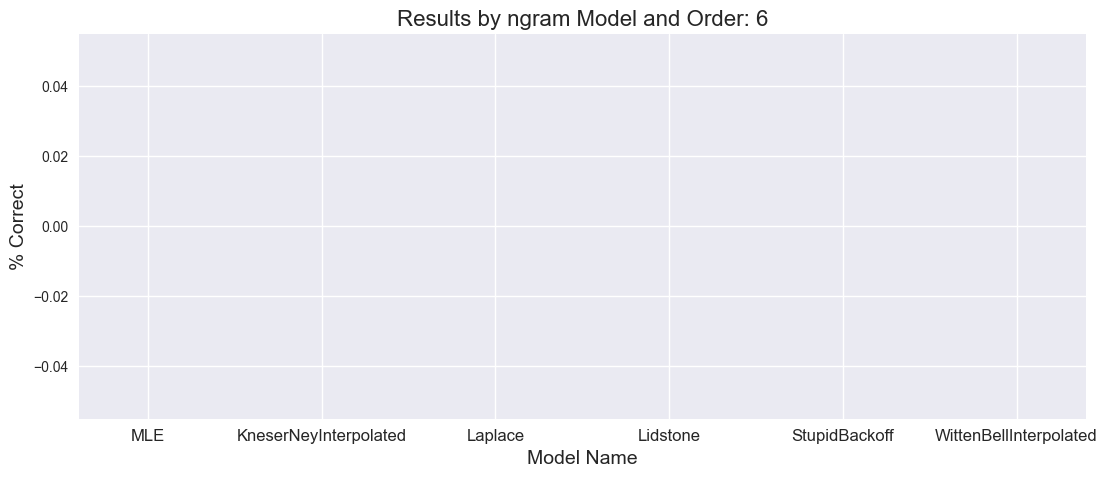

<Figure size 800x550 with 0 Axes>

In [56]:
print(orders)
for order in orders:

    ax = df_agg_results_test_1_trans[order].plot(kind='bar', color='blue', width=0.3, figsize=[13, 5])
    plt.xlabel("Model Name", fontsize=14)
    plt.ylabel("% Correct", fontsize=14)

    title = "Results by ngram Model and Order: " + str(order)
    plt.title(title,fontsize=16 )
    
    plt.xticks(rotation=0,fontsize=12)
    for p in ax.patches:
        ax.annotate(
            str(p.get_height()), xy=(p.get_x() + 0.25, p.get_height() + 0.1), fontsize=15
        )

    plt.show()
    plt.savefig("images/Aggregate Results Test-1.png")

## Test 2

In [57]:
""" Test 2
Function for Data preparation for this test
Take n rows from test set, convert a known sign to unclear sign and produce a dataframe
Note down the answers
"""

def test2_prepare_data(unclear_position, a, seed):
    try:

        verbose_debug = True
        min_text_chars = 2
        max_text_chars = 40
        max_num_of_rows= 400
        unclear_position= CONST_ALL
        #unclear_position= CONST_INITIAL

        df_made_up_from_test, test2_correct_answers =prepare_data(a, max_text_chars,min_text_chars,max_num_of_rows,unclear_position, seed)

        if(verbose_debug):
            print(df_made_up_from_test.changed_text)
            print("test2_correct_answers: \n", test2_correct_answers)
    except Exception as e:
        print("Exception:", e.__class__, "test2_prepare_data")
        traceback.print_exc()
        
    return df_made_up_from_test, test2_correct_answers


In [58]:
""" Test2
Function to Run the test
""" 
def test2_run(df,test2_correct_answers, algo,seed):
    try:
        out_dict = defaultdict()
        verbose_debug = True
        a= df[df.changed_text!=''].changed_text
        a_rev= df[df.changed_reversed_text!=''].changed_reversed_text
        check_the_answers = True
        try_reverse = False
        wrong_answer_details_verbose = True
        fill_using_position =True
        use_initial_terminal_model= False
        order_start=3

        out_dict,metrics_list = run_test("Test-2","train", algo, a, a_rev, fill_using_position, order_start, check_the_answers, test2_correct_answers, try_reverse, wrong_answer_details_verbose, seed)
    
        
    except Exception as e:
        print("Exception:", e.__class__, "test2_run")
        traceback.print_exc()
    return out_dict,metrics_list

In [59]:
""" Prepare and Run Test 2"""

verbose_debug= True
use_initial_terminal_model= False

results_2_dict = defaultdict()
results_2_metrics_dict = defaultdict()
test2_correct_answers = None
correct=0
total=0
a = df_test_x[df_test_x.l_to_r_text!=''].l_to_r_text
df_out= None
test2_correct_answers= None
out_dict=None
metrics_list= None

run_num_of_times_test= 10
orders = [6]
#algo= CONST_ALGO_SIGN_FILL_IN_START
#algo=CONST_ALGO_SIGN_FILL_IN_FULL
algo=CONST_ALGO_MIXED
unclear_position= CONST_ALL


for x in range(1,run_num_of_times_test+1):
    out_dict = defaultdict()
    df_out= None
    #random.seed(datetime.now())
    this_seed = x
    random.seed(x)
    df_out, test2_correct_answers = test2_prepare_data(unclear_position, a, this_seed )
    out_dict,metrics_list = test2_run(df_out, test2_correct_answers, algo, this_seed)
    
    """ add the output dictionary to dictionary of dictionaries containing results"""
    results_2_dict[x]= out_dict
    results_2_metrics_dict[x] =  metrics_list

0                          <s> 000 390 </s>
1                      <s> 235 240 000 </s>
2      <s> 861 002 003 220 590 405 000 </s>
3      <s> 140 287 002 415 220 879 000 </s>
4                      <s> 000 703 400 </s>
                       ...                 
395                    <s> 033 000 617 </s>
396        <s> 000 705 033 176 626 740 </s>
397            <s> 820 002 000 817 740 </s>
398                    <s> 767 368 000 </s>
399                        <s> 000 400 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '003', 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '520', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '617', 't

Sign, score, order of match: 590 0.2345679012345679 1
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 236 0 3
Sign, score, order of match: 236 0 3
L to R: Terminal char is unclear <s> 861 002 003 220 590 405 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 140 287 002 415 220 879 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
Char, score, order of match using algo-1 048 0 4
Sign, score, order of match: 048 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 1.0 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of ma

Char, score, order of match using algo-1 555 0 4
Sign, score, order of match: 555 0 4
Char, score, order of match using algo-1 903 0 3
Sign, score, order of match: 903 0 3
Char, score, order of match using algo-1 190 0 4
Sign, score, order of match: 190 0 4
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
Char, score, order of match using algo-1 920 0 3
Sign, score, order of match: 920 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 016 0 4
Sign, score, order of match: 016 0 4
Char, score, order of match using algo-1 407 0 3
Sign, score, order of match: 407 0 3
L to R: Initial char is unclear <s> 000 741 792 269 740 </s> Sending:  ['269', '792', '741']  to generate next char from second model
Sign, score, order of match: 060 0.211864406779661 1
L to R: Initial char is unclear <s> 000 930 </s> Sending:  ['</s>', '930'] 

Char, score, order of match using algo-1 572 0 3
Sign, score, order of match: 572 0 3
L to R: Initial char is unclear <s> 000 368 </s> Sending:  ['</s>', '368']  to generate next char from second model
Sign, score, order of match: 817 0.171875 1
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 158 400 </s> Sending:  ['</s>', '400', '158']  to generate next char from second model
Sign, score, order of match: 806 0.5714285714285714 2
L to R: Terminal char is unclear <s> 031 097 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 592 </s> Sending:  ['</s>', '592']  to generate next char from second model
Sign, score, order of match: 031 0.3333333333333333 1
L to R: Terminal char is unclear <s> 503 702 002 240 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 368 400 </s> Sending:  ['</s>', '400', '368']  to generate next char from second model
Sign, score, order of match: 055 1.0 2
L to R: Initial char is unclear <s> 000 798 233 388 444 740 904 832 </s> Sending:  ['388', '233', '798']  to generate next char from second model
Sign, score, order of match: 002 0.3333333333333333 2
Char, score, order of match using algo-1 140 0 3
Sign,

Char, score, order of match using algo-1 744 0 2
Sign, score, order of match: 744 0 2
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 415 220 320 920 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 706 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 002 0 2
Sign, score, order of match: 002 0 2
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Initial char is unclear <s> 000 406 741 590 406 740 </s> Sending:  ['590', '741', '406']  to generate next char from second model
Sign, score, order of match: 125 1.0 3
Char, score, order of match using algo-1 861 0 4
Sign, score, order of ma

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 500 0 3
Sign, score, order of match: 500 0 3
L to R: Initial char is unclear <s> 000 901 032 590 292 381 127 </s> Sending:  ['590', '032', '901']  to generate next char from second model
Sign, score, order of match: 620 1.0 3
L to R: Initial char is unclear <s> 000 740 832 241 </s> Sending:  ['241', '832', '740']  to generate next char from second model
Sign, score, order of match: 176 1.0 3
L to R: Initial char is unclear <s> 000 002 231 520 </s> Sending:  ['520', '231', '002']  to generate next char from second model
Sign, score, order of match: 220 0.5 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 321 0 4
Sign, score, order of match: 321 0 4
Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
Char, score, order of match using algo-1 637 0 4
Si

Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Terminal char is unclear <s> 861 002 003 220 590 405 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 140 287 002 415 220 879 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.3010444913126444 1
Char, score, order of match using algo-1 772 0 4
Sign, score, order of match: 772 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.9922297378728533 3
Char, score, order of match using algo-1 001 0 3
Sign, score, order of match: 001 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char, s

Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
Char, score, order of match using algo-1 903 0 3
Sign, score, order of match: 903 0 3
Char, score, order of match using algo-1 190 0 4
Sign, score, order of match: 190 0 4
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
Char, score, order of match using algo-1 920 0 3
Sign, score, order of match: 920 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
Char, score, order of match using algo-1 016 0 4
Sign, score, order of match: 016 0 4
Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
L to R: Initial char is unclear <s> 000 741 792 269 740 </s> Sending:  ['269', '792', '741']  to generate next char from second model
Sign, score, order of match: 060 0.1961470

Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 158 400 </s> Sending:  ['</s>', '400', '158']  to generate next char from second model
Sign, score, order of match: 806 0.24575883441656265 2
L to R: Terminal char is unclear <s> 031 097 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.030730778712098384 1
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.07946467105852463 1
L to R: Initial char is unclear <s> 000 820 002 031 243 151 </s> Sending:  ['031', '002', '820']  to generate next char from second model
Sign, score, order of match: 741 0.019780293031775767 2
Char, score, order of match using algo-1 156 0 4
Sign, 

Sign, score, order of match: 140 0.0738695621943588 1
L to R: Terminal char is unclear <s> 235 240 055 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 617 </s> Sending:  ['</s>', '617']  to generate next char from second model
Sign, score, order of match: 033 0.07704850858692378 1
L to R: Initial char is unclear <s> 000 240 904 740 </s> Sending:  ['740', '904', '240']  to generate next char from second model
Sign, score, order of match: 002 0.33117021819779247 3
L to R: Terminal char is unclear <s> 125 861 000 </s>
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Terminal char is unclear <s> 817 002 013 840 176 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 384 700 875 </s> Sending

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 772 0 4
Sign, score, order of match: 772 0 4
L to R: Initial char is unclear <s> 000 002 482 740 </s> Sending:  ['740', '482', '002']  to generate next char from second model
Sign, score, order of match: 820 0.9913775030708972 3
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
L to R: Initial char is unclear <s> 000 740 400 840 712 </s> Sending:  ['840', '400', '740']  to generate next char from second model
Sign, score, order of match: 440 0.9044824614134586 3
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order of match: 002 0.16041598353439268 2
L to R: Terminal char is unclear <s> 840 000 </s>
Char, score, order of match using algo-1 712 0 3
Sig

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Initial char is unclear <s> 000 002 255 435 690 740 </s> Sending:  ['435', '255', '002']  to generate next char from second model
Sign, score, order of match: 861 0.331536507945705 3
L to R: Initial char is unclear <s> 000 002 004 390 621 </s> Sending:  ['390', '004', '002']  to generate next char from second model
Sign, score, order of match: 817 0.33339617462460375 3
Char, score, order of match using algo-1 407 0 4
Sign, score, order of match: 407 0 4
L to R: Terminal char is unclear <s> 031 388 002 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 140 0 3
Sign, score, order of match: 140 0 3
L to R: Initial char is unclear <s> 000 368 480 003 390 </s> Sending:  ['003', '480', '368']  to generate next char from second model
Sign, score, order of match: 861 0.9907113917116328 3
Char, score, order of matc

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 480 0 4
Sign, score, order of match: 480 0 4
L to R: Terminal char is unclear <s> 806 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 365 0 3
Sign, score, order of match: 365 0 3
L to R: Initial char is unclear <s> 000 440 742 </s> Sending:  ['</s>', '742', '440']  to generate next char from second model
Sign, score, order of match: 220 0.008156606851549755 1
L to R: Initial char is unclear <s> 000 838 585 740 400 </s> Sending:  ['740', '585', '838']  to generate next char from second model
Sign, score, order of match: 741 0.00676818950930626 1
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3


Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 920 400 740 </s> Sending:  ['740', '400', '920']  to generate next char from second model
Sign, score, order of match: 320 0.015015015015015015 1
Char, score, order of match using algo-1 001 0 3
Sign, score, order of match: 001 0 3
L to R: Terminal char is unclear <s> 413 892 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
L to R: Terminal char is unclear <s> 703 400 002 061 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
L to R: Terminal char is unclear <s> 740 803 390 060 000 </s>
Char, score, order of match using 

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 368 400 </s> Sending:  ['</s>', '400', '368']  to generate next char from second model
Sign, score, order of match: 055 0.003424657534246575 2
L to R: Initial char is unclear <s> 000 798 233 388 444 740 904 832 </s> Sending:  ['388', '233', '798']  to generate next char from second model
Sign, score, order of match: 002 0.0034129692832764505 2
Char, score, order of match using algo-1 820 0 3
Sign, score, order of match: 820 0 3
L to R: Initial char is unclear <s> 000 368 220 520 </s> Sending:  ['520', '220', '368']  to generate next char from second model
Sign, score, order of match: 817 0.01854714064914992 1
L to R: Initial char is unclear <s> 000 390 368 </s> Sending:  ['</s>', '368', '390']  to generate next char from second model
Sign, score, order of match: 125 0.0034129692832764505 2
Char, score, order of match using algo-1 125 0 4
Sign, score, order of ma

Char, score, order of match using algo-1 142 0 3
Sign, score, order of match: 142 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 368 093 400 </s> Sending:  ['400', '093', '368']  to generate next char from second model
Sign, score, order of match: 072 0.003424657534246575 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 015 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Initial char is unclear <s> 000 060 142 156 </s> Sending:  ['156', '142', '060']  to generate next char from second model
Sign, score, order of match: 820 0.003424657534246575 3
Char, score, order of match using algo-1 400 0 4
Sign, score, 

Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Initial char is unclear <s> 000 060 798 415 220 554 740 </s> Sending:  ['415', '798', '060']  to generate next char from second model
Sign, score, order of match: 201 0.003418803418803419 3
L to R: Terminal char is unclear <s> 710 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
L to R: Terminal char is unclear <s> 692 060 235 240 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 384 740 400 </s> Sending:  ['400', '740', '384']  to generate next char from second model
Sign, score, order of match: 033 0.003424657534246575 3
Char, score, order of match using algo-1 233 0 3
Sign, score, order of

                            0        1
0                  model_name  Laplace
1                 model_order        6
2                 total_texts      400
3            total_hit_at_1_%     42.0
4   total_hit_category_at_1_%     52.0
5     beg_hit_category_at_1_%     43.0
6     ter_hit_category_at_1_%     64.0
7     med_hit_category_at_1_%     49.0
8              beg_hit_at_1_%     33.0
9              ter_hit_at_1_%     58.0
10             med_hit_at_1_%     39.0
11           total_hit_at_5_%     59.0
12             beg_hit_at_5_%     50.0
13             ter_hit_at_5_%     68.0
14             med_hit_at_5_%     60.0
15          total_hit_at_10_%     66.0
16            beg_hit_at_10_%     57.0
17            ter_hit_at_10_%     78.0
18            med_hit_at_10_%     65.0
19                    beg_mrr     0.41
20                    ter_mrr     0.63
21                    med_mrr     0.48
22                        mrr      0.5

****************Model Name: Lidstone Type: <class 'nltk.lm.mode

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second model
Sign, score, order of match: 806 0.029427501337613696 1
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
L to R: Initial char is unclear <s> 000 530 299 002 798 415 220 176 175 760 740 </s> Sending:  ['002', '299', '530']  to generate next char from second model
Sign, score, order of match: 323 0.00396600566572238 1
Char, score, order of match using algo-1 527 0 3
Sign, score, order of match: 527 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 231 255 435 690 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order o

Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
L to R: Terminal char is unclear <s> 820 002 016 220 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
L to R: Initial char is unclear <s> 000 035 415 </s> Sending:  ['</s>', '415', '035']  to generate next char from second model
Sign, score, order of match: 171 0.019476905954368393 1
L to R: Terminal char is unclear <s> 820 060 415 220 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 520 455 220 002 803 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 342 504 002 016 </s> Sending:  ['002', '504', '342']  to generate next 

Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 803 0 2
Sign, score, order of match: 803 0 2
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Initial char is unclear <s> 000 406 741 590 406 740 </s> Sending:  ['590', '741', '406']  to generate next char from second model
Sign, score, order of match: 125 0.003993154592127781 3
Char, score, order of match using algo-1 817 0 4
Sign, score, order of match: 817 0 4
Char, score, order of match using algo-1 232 0 4
Sign, score, order of match: 232 0 4
L to R: Terminal char is unclear <s> 233 055 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 002 482 740 </s> Sending:  ['740', '482', '002']  to generate next char from second model
Sign, score, ord

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 233 550 </s> Sending:  ['</s>', '550', '233']  to generate next char from second model
Sign, score, order of match: 002 0.00396600566572238 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
L to R: Initial char is unclear <s> 000 740 932 </s> Sending:  ['</s>', '932', '740']  to generate next char from second model
Sign, score, order of match: 055 0.003993154592127781 2
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <

Sign, score, order of match: 590 0.2345679012345679 1
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 236 0 3
Sign, score, order of match: 236 0 3
L to R: Terminal char is unclear <s> 861 002 003 220 590 405 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 140 287 002 415 220 879 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
Char, score, order of match using algo-1 048 0 4
Sign, score, order of match: 048 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 1.0 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of ma

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 140 704 575 000 </s>
Char, score, order of match using algo-1 869 0 3
Sign, score, order of match: 869 0 3
L to R: Terminal char is unclear <s> 140 919 520 032 861 002 219 070 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 406 0 4
Sign, score, order of match: 406 0 4
L to R: Terminal char is unclear <s> 817 002 495 615 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 920 400 740 </s> Sending:  ['740', '400', '920']  to generate next char fr

Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 706 0 4
L to R: Terminal char is unclear <s> 820 002 016 220 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 336 0 4
Sign, score, order of match: 336 0 4
L to R: Initial char is unclear <s> 000 035 415 </s> Sending:  ['</s>', '415', '035']  to generate next char from second model
Sign, score, order of match: 171 0.6666666666666666 1
L to R: Terminal char is unclear <s> 820 060 415 220 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 520 455 220 002 803 000 </s>
Char, score, order of match using algo-1 153 0 3
Sign, score, order of match: 153 0 3
L to R: Initial char is unclear <s> 000 342 504 002 016 </s> Sending:  ['002', '504', '342']  to generate next ch

Char, score, order of match using algo-1 232 0 4
Sign, score, order of match: 232 0 4
L to R: Terminal char is unclear <s> 233 055 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 637 0 4
Sign, score, order of match: 637 0 4
L to R: Initial char is unclear <s> 000 002 482 740 </s> Sending:  ['740', '482', '002']  to generate next char from second model
Sign, score, order of match: 820 1.0 3
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
L to R: Initial char is unclear <s> 000 740 400 840 712 </s> Sending:  ['840', '400', '740']  to generate next char from second model
Sign, score, order of match: 440 1.0 3
Char, score, order of match using algo-1 804 0 4
Sign, score, order of match: 804 0 4
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order of match: 002 0.57142857

Sign, score, order of match: 055 1.0 2
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 435 0.425531914893617 1
L to R: Terminal char is unclear <s> 564 690 291 002 233 560 000 </s>
Char, score, order of match using algo-1 814 0 2
Sign, score, order of match: 814 0 2
L to R: Terminal char is unclear <s> 255 435 690 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.06725468577728776 1
L to R: Terminal char is unclear <s> 705 255 000 </s>
Char, score, order of match using algo-1 061 0 3
Sign, score, order of match: 061 0 3
L to R: Terminal char is unclear <s> 550 060 240 740 000 </s>
Char, score, order of match using

Sign, score, order of match: 920 0.9714132386349758 2
L to R: Terminal char is unclear <s> 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 413 0 3
Sign, score, order of match: 413 0 3
L to R: Terminal char is unclear <s> 025 032 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 031 002 003 390 </s> Sending:  ['003', '002', '031']  to generate next char from second model
Sign, score, order of match: 892 0.16286887773562417 2
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.18006082260981987 1
L to R: Terminal char is unclear <s> 792 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 002 032 220 240 055 161 </s> Sending:  ['220', '

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 741 004 390 </s> Sending:  ['390', '004', '741']  to generate next char from second model
Sign, score, order of match: 060 0.14518850274591014 1
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 034 0 3
Sign, score, order of match: 034 0 3
L to R: Terminal char is unclear <s> 032 892 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 060 235 504 031 740 </s> Sending:  ['504', '235', '060']  to generate next char from second model
Sign, score, order of match: 820 0.3019237708940789 2
Cha

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 592 </s> Sending:  ['</s>', '592']  to generate next char from second model
Sign, score, order of match: 741 0.2236100819778178 1
L to R: Terminal char is unclear <s> 503 702 002 240 176 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 368 400 </s> Sending:  ['</s>', '400', '368']  to generate next char from second model
Sign, score, order of match: 055 0.5052563317091738 2
L to R: Initial char is unclear <s> 000 798 233 388 444 740 904 832 </s> Sending:  ['388', '233', '798']  to generate next char from second model
Sign, score, order of match: 002 0.22564835397480681 2
Char, score, order of match using algo

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 002 482 740 </s> Sending:  ['740', '482', '002']  to generate next char from second model
Sign, score, order of match: 820 0.7781535678330844 3
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
L to R: Initial char is unclear <s> 000 740 400 840 712 </s> Sending:  ['840', '400', '740']  to generate next char from second model
Sign, score, order of match: 440 0.7589375518590915 3
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order of match: 002 0.47677321653187005 2
L to R: Terminal char is unclear <s> 840 000 </s>
Char, score, order of match using algo-1 712 0 3
Sig

Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
L to R: Initial char is unclear <s> 000 740 932 </s> Sending:  ['</s>', '932', '740']  to generate next char from second model
Sign, score, order of match: 055 0.5043117247644506 2
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 435 0.312837408701175 1
L to R: Terminal char is unclear <s> 564 690 291 002 233 560 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
L to R: Terminal char is unclear <s> 255 435 690 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


0                          <s> 000 390 </s>
1                      <s> 000 240 520 </s>
2      <s> 000 002 003 220 590 405 740 </s>
3      <s> 140 287 000 415 220 879 740 </s>
4                      <s> 000 703 400 </s>
                       ...                 
395                    <s> 033 550 000 </s>
396        <s> 233 705 033 176 626 000 </s>
397            <s> 820 002 390 000 740 </s>
398                    <s> 767 000 001 </s>
399                        <s> 097 000 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '003', 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '235', 'type': 'Initial'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '861', 'type': 'Initial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '002', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '617', 'type'

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.06725468577728776 1
L to R: Terminal char is unclear <s> 820 002 032 220 240 055 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 736 904 158 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
L to R: Terminal char is unclear <s> 550 060 032 904 000 </s>
Char, score, order of match using algo-1 705 0 3
Sign, score, order of match: 705 0 3
L to R: Initial char is unclear <s> 000 256 </s> Sending:  ['</s>', '256'

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 156 0 4
Sign, score, order of match: 156 0 4
L to R: Initial char is unclear <s> 000 436 690 740 </s> Sending:  ['740', '690', '436']  to generate next char from second model
Sign, score, order of match: 255 1.0 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Terminal char is unclear <s> 233 176 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Initial char is unclear <s> 000 151 </s> Sending:  ['</s>', '151']  to generate next char from second model
Sign, score, order of match: 740 0.1276595744680851 1
L to R: Terminal char is unclear <s> 400 820 100 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <

Char, score, order of match using algo-1 070 0 3
Sign, score, order of match: 070 0 3
L to R: Initial char is unclear <s> 000 060 741 550 527 </s> Sending:  ['550', '741', '060']  to generate next char from second model
Sign, score, order of match: 920 1.0 3
L to R: Terminal char is unclear <s> 803 235 240 705 033 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Initial char is unclear <s> 000 002 004 407 </s> Sending:  ['407', '004', '002']  to generate next char from second model
Sign, score, order of match: 861 0.6666666666666666 3
L to R: Initial char is unclear <s> 000 031 001 518 081 892 400 </s> Sending:  ['518', '001', '031']  to generate next char from second model
Sign, score, order of match: 250 1.0 3
L to R: Terminal char is unclear <s> 226 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 

Char, score, order of match using algo-1 578 0 4
Sign, score, order of match: 578 0 4
L to R: Terminal char is unclear <s> 820 002 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 255 000 </s>
Char, score, order of match using algo-1 061 0 3
Sign, score, order of match: 061 0 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 500 0 3
Sign, score, order of match: 500 0 3
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 820 002 231 000 </s>
Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score

                            0     1
0                  model_name   MLE
1                 model_order     6
2                 total_texts   400
3            total_hit_at_1_%  34.0
4   total_hit_category_at_1_%  48.0
5     beg_hit_category_at_1_%  57.0
6     ter_hit_category_at_1_%  38.0
7     med_hit_category_at_1_%  48.0
8              beg_hit_at_1_%  42.0
9              ter_hit_at_1_%  27.0
10             med_hit_at_1_%  33.0
11           total_hit_at_5_%  56.0
12             beg_hit_at_5_%  59.0
13             ter_hit_at_5_%  56.0
14             med_hit_at_5_%  53.0
15          total_hit_at_10_%  63.0
16            beg_hit_at_10_%  64.0
17            ter_hit_at_10_%  66.0
18            med_hit_at_10_%  61.0
19                    beg_mrr   0.5
20                    ter_mrr  0.39
21                    med_mrr  0.42
22                        mrr  0.43

****************Model Name: KneserNeyInterpolated Type: <class 'nltk.lm.models.KneserNeyInterpolated'> Order: 6
L to R: Initial char is

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
L to R: Terminal char is unclear <s> 003 422 176 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 590 125 002 550 000 </s>
Char, score, order of match using algo-1 526 0 3
Sign, score, order of match: 526 0 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 840 0 3
Sign, score, order of match: 840 0 3
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L 

Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
L to R: Initial char is unclear <s> 000 690 002 706 033 590 405 740 001 354 </s> Sending:  ['706', '002', '690']  to generate next char from second model
Sign, score, order of match: 921 0.9030102440494125 2
L to R: Initial char is unclear <s> 000 035 </s> Sending:  ['</s>', '035']  to generate next char from second model
Sign, score, order of match: 171 0.41435458184478974 1
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 440 0.04482461413458484 2
L to R: Initial char is unclear <s> 000 002 803 240 233 520 </s> Sending:  ['240', '803', '002']  to generate next char from second model
Sign, score, order of match: 820 0.9242516687139315 3
L to R: Initial char is unclear <s> 000 033 705 031 741 390 741 </s> Sending:  ['031', '705', '033']  to generate next char from second model
Sign, score, order 

Char, score, order of match using algo-1 506 0 3
Sign, score, order of match: 506 0 3
L to R: Terminal char is unclear <s> 590 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 056 415 060 240 772 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 323 0 4
Sign, score, order of match: 323 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 893 140 236 </s> Sending:  ['236', '140', '893']  to generate next char from second model
Sign, score, order of match: 001 0.45174751431153964 1
L to R: Initial char is unclear <s> 000 592 </s> Sending:  ['</s>', '592']  to generate next char from second model
Sign, score, order of match: 031 0.3811569749924676 1
L to R: Initi

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
L to R: Terminal char is unclear <s> 220 032 590 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.10312564807894727 1
L to R: Initial char is unclear <s> 000 032 877 740 </s> Sending:  ['740', '877', '032']  to generate next char from second model
Sign, score, order of match: 033 0.1981848063596542 3
L to R: Initial char is unclear <s> 000 004 390 </s> Sending:  ['</s>', '390', '004']  to generate next char from second model
Sign, score, order of match: 002 0.22074977612065214 2
Char, score, order of match using algo-1 821 0 3
Sign, score, order of match: 821 0 3
L to R: Initial char is unclear <s> 000 002 717 803 226 </s> 

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 233 923 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 772 0 4
Sign, score, order of match: 772 0 4
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sending:  ['585', '017', '741']  to generate next char from second model
Sign, score, order of match: 630 0.9450853736487457 3
Char, score, order of match using algo-1 578 0 4
Sign, score, order of match: 578 0 4
L to R: Terminal char is unclear <s> 820 002 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 255 000 </s>
Char, score, order of match using algo-1 324 0 3

Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 484 0 3
Sign, score, order of match: 484 0 3
L to R: Terminal char is unclear <s> 097 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Fwd hexagram Model Train: : KneserNeyInterpolated
beg%: 39.13  ter%: 24.76  med%: 33.33  tot%: 32.75  and a total of  131  out of 400
beg_w_cat%: 52.17  ter_w_cat%: 34.29  med_w_cat%: 45.56  tot_w_cat%: 44.5

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '590', 'pred_answer_group': 'square', 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '002', 'pred_answer_group': None, 'correct_answer': '235', 'correct_answer_group': 'fish', 'type': 'Initial'}, {'text': '<s> 140 287 002 415 220 

Sign, score, order of match: 590 0.052348993288590606 1
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.005084745762711864 2
L to R: Initial char is unclear <s> 000 002 003 220 590 405 740 </s> Sending:  ['220', '003', '002']  to generate next char from second model
Sign, score, order of match: 390 0.003418803418803419 3
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.003401360544217687 1
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order 

Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
L to R: Initial char is unclear <s> 000 220 706 033 520 </s> Sending:  ['033', '706', '220']  to generate next char from second model
Sign, score, order of match: 032 0.052763819095477386 1
Char, score, order of match using algo-1 531 0 3
Sign, score, order of match: 531 0 3
L to R: Initial char is unclear <s> 000 002 605 760 740 </s> Sending:  ['760', '605', '002']  to generate next char from second model
Sign, score, order of match: 540 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.015082956259426848 2
L to R: Terminal char is unclear <s> 920 060 741 590 406 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second mod

Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.04161073825503356 1
Char, score, order of match using algo-1 540 0 4
Sign, score, order of match: 540 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 176 705 033 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to generate next char from second model
Sign, score, order of match: 297 0.003418803418803419 3
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Initial char is unclear <s> 000 035 415 </s> Sending:  ['</s>', '415', '035']  to generate next char from second model
Sign, score, order of ma

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 235 0 2
Sign, score, order of match: 235 0 2
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 406 741 590 406 740 </s> Sending:  ['590', '741', '406']  to generate next char from second model
Sign, score, order of match: 125 0.003424657534246575 3
Char, score, order of match using algo-1 817 0 4
Sign, score, order of match: 817 0 4
L to R: Initial char is unclear <s> 000 700 097 151 </s> Sending:  ['151', '097', '700']  to generate next char from second model
Sign, score, order of match: 034 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 055 752 740 </s> Sending:  ['740', '752', '055']  to generate ne

Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 071 0 4
Sign, score, order of match: 071 0 4
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 575 705 742 491 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 368 480 003 390 </s> Sending:  ['003', '480', '368']  to generate next char from second model
Sign, score, order of match: 861 0.003424657534246575 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 470 806 158 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Ch

Sign, score, order of match: 590 0.06466416353775553 1
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.0061902082160945416 2
L to R: Initial char is unclear <s> 000 002 003 220 590 405 740 </s> Sending:  ['220', '003', '002']  to generate next char from second model
Sign, score, order of match: 390 0.00398406374501992 3
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.00395703787450537 1
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order of

Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
L to R: Initial char is unclear <s> 000 220 706 033 520 </s> Sending:  ['033', '706', '220']  to generate next char from second model
Sign, score, order of match: 032 0.06420607458669743 1
Char, score, order of match using algo-1 531 0 3
Sign, score, order of match: 531 0 3
L to R: Initial char is unclear <s> 000 002 605 760 740 </s> Sending:  ['760', '605', '002']  to generate next char from second model
Sign, score, order of match: 540 0.003993154592127781 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.018849685838569358 2
L to R: Terminal char is unclear <s> 920 060 741 590 406 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second mode

Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
L to R: Terminal char is unclear <s> 503 070 520 590 292 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.045936395759717315 1
Char, score, order of match using algo-1 540 0 4
Sign, score, order of match: 540 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 176 705 033 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to gener

Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
L to R: Terminal char is unclear <s> 216 861 002 798 585 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 803 0 2
Sign, score, order of match: 803 0 2
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 406 741 590 406 740 </s> Sending:  ['590', '741', '406']  to generate next char from second model
Sign, score, order of match: 125 0.003993154592127781 3
Char, score, order of match using algo-1 817 0 4
Sign, score, order of match: 817 0 4
L to R: Initial char is unclear <s> 000 700 097 151 </s> Sending:  ['151', '097', '700']  to generate next char from second model
Sign, sc

Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 071 0 4
Sign, score, order of match: 071 0 4
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 575 705 742 491 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 368 480 003 390 </s> Sending:  ['003', '480', '368']  to generate next char from second model
Sign, score, order of match: 861 0.003993154592127781 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 470 806 158 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Ch

Sign, score, order of match: 590 0.2345679012345679 1
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.2857142857142857 2
L to R: Initial char is unclear <s> 000 002 003 220 590 405 740 </s> Sending:  ['220', '003', '002']  to generate next char from second model
Sign, score, order of match: 390 0.5 3
Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
Char, score, order of match using algo-1 048 0 4
Sign, score, order of match: 048 0 4
Char, score, order of match using algo-1 752 0 4
Sign, score, order of match: 752 0 4
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
Char, score, order o

Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
L to R: Initial char is unclear <s> 000 002 605 760 740 </s> Sending:  ['760', '605', '002']  to generate next char from second model
Sign, score, order of match: 540 1.0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.1125 2
L to R: Terminal char is unclear <s> 920 060 741 590 406 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second model
Sign, score, order of match: 806 0.43333333333333335 1
L to R: Initial char is unclear <s> 000 706 033 520 </s> Sending:  ['520', '033', '706']  to generate next char from second model
Sign, score, order of match: 240 0.25 3
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 1

Char, score, order of match using algo-1 323 0 4
Sign, score, order of match: 323 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 893 140 236 </s> Sending:  ['236', '140', '893']  to generate next char from second model
Sign, score, order of match: 001 0.5 1
L to R: Initial char is unclear <s> 000 592 </s> Sending:  ['</s>', '592']  to generate next char from second model
Sign, score, order of match: 031 0.3333333333333333 1
L to R: Initial char is unclear <s> 000 702 002 240 176 740 </s> Sending:  ['240', '002', '702']  to generate next char from second model
Sign, score, order of match: 061 0.3333333333333333 1
Char, score, order of match using algo-1 048 0 4
Sign, score, order of match: 048 0 4
Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 706 0 4
L to R: Initial char is unclear <s> 000 368 400 </s> Sending:  ['</s>', '400', '368']  to generate next char from second mode

Char, score, order of match using algo-1 154 0 4
Sign, score, order of match: 154 0 4
L to R: Terminal char is unclear <s> 235 240 220 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 072 368 093 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
L to R: Terminal char is unclear <s> 861 002 125 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 015 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Terminal char is unclear <s> 820 060 142 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match us

Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
L to R: Terminal char is unclear <s> 049 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 920 0 3
Sign, score, order of match: 920 0 3
L to R: Terminal char is unclear <s> 090 550 534 742 220 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.22077922077922077 1
L to R: Initial char is unclear <s> 000 240 845 061 407 </s> Sending:  ['061', '845', '240']  to generate next char from second model
Sign, score, order of match: 798 1.0 3
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
L to R: Terminal cha

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 413 0 3
Sign, score, order of match: 413 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.05764865944310346 1
L to R: Terminal char is unclear <s> 820 002 032 220 240 055 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
L to R: Terminal char is unclear <s> 736 904 158 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 585 0 3


Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 002 0 2
Sign, score, order of match: 002 0 2
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 031 </s> Sending:  ['</s>', '031']  to generate next char from second model
Sign, score, order of match: 002 0.09428172829252537 1
Char, score, order of match using algo-1 416 0 3
Sign, score, order of match: 416 0 3
Char, score, order of match using algo-1 585 0 3
Sign, score, order of match: 585 0 3
L to R: Initial char is unclear <s> 000 690 002 706 033 590 405 740 001 354 </s> Sending:  ['706', '002', '690']  to generate next char from second model
Sign, score, order of match: 921 0.5078593623196076 2
L to R: Initial cha

Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Initial char is unclear <s> 000 861 740 </s> Sending:  ['</s>', '740', '861']  to generate next char from second model
Sign, score, order of match: 877 0.2907676728605678 2
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
L to R: Terminal char is unclear <s> 125 384 700 000 </s>
Char, score, order of match using algo-1 034 0 3
Sign, score, order of match: 034 0 3
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Terminal char is unclear <s> 818 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Terminal char is unclear <s> 235 220 176 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Initial char is unclear <s> 000 267 400 </s

Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 072 368 093 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
L to R: Terminal char is unclear <s> 861 002 125 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 015 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Terminal char is unclear <s> 820 060 142 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Terminal char is unclear <s> 406 390 892 000 </s>
Char, score, order of match us

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 687 000 </s>
Char, score, order of match using algo-1 692 0 3
Sign, score, order of match: 692 0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
L to R: Initial char is unclear <s> 000 435 690 740 </s> Sending:  ['740', '690', '435']  to generate next char from second model
Sign, score, order of match: 255 0.942643533735944 3
L to R: Terminal char is unclear <s> 416 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
L to R: Terminal char is unclear <s> 550 060 240 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 049 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Cha

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


0                          <s> 000 390 </s>
1                      <s> 235 240 000 </s>
2      <s> 861 002 003 220 000 405 740 </s>
3      <s> 140 000 002 415 220 879 740 </s>
4                      <s> 617 000 400 </s>
                       ...                 
395                    <s> 000 550 617 </s>
396        <s> 233 705 033 176 000 740 </s>
397            <s> 820 002 000 817 740 </s>
398                    <s> 767 368 000 </s>
399                        <s> 000 400 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '003', 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '520', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '590', 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '287', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '703', 'type'

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 792 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 820 002 706 611 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
L to R: Terminal char is unclear <s> 550 060 032 904 000 </s>
Char, score, order of match using algo-1 705 0 3
Sign, score, order of match: 705 0 3
L 

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 014 0 4
Sign, score, order of match: 014 0 4
L to R: Terminal char is unclear <s> 233 176 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 717 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 090 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 060 443 740 550 527 </s> Sending:  ['740', '443', '060']  to generate next char from second model
Sign, score, order of match: 920 0.3082706766917293 1
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sen

Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 455 0 4
Sign, score, order of match: 455 0 4
L to R: Initial char is unclear <s> 000 233 706 033 760 740 </s> Sending:  ['033', '706', '233']  to generate next char from second model
Sign, score, order of match: 235 0.5 3
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Initial char is unclear <s> 000 002 772 740 </s> Sending:  ['740', '772', '002']  to generate next char from second model
Sign, score, order of match: 817 0.5 3
L to R: Initial char is unclear <s> 000 235 520 </s> Sending:  ['</s>', '520', '235']  to generate next char from second model
Sign, score, order of match: 803 0.2857142857142857 2
L to R: Initial char is unclear <s> 000 060

Char, score, order of match using algo-1 617 0 3
Sign, score, order of match: 617 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Terminal char is unclear <s> 240 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sending:  ['585', '017', '741']  to generate next char from second model
Sign, score, order of match: 630 1.0 3
L to R: Terminal char is unclear <s> 415 578 032 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
L to R: Initial char is unclear <s> 000 002 003 390 </s> Sending:  ['390', '003', '002']  to generate next char from second model
Sign, score, order of match: 820 0.3333333333333333 3
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
L to R: Terminal char is unclear <s> 255 000 </s>
Char, score, order of match using algo-1 061 0 3
Si

Sign, score, order of match: 590 0.10312564807894727 1
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.9922297378728533 3
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 167 0 3
Sign, score, order of match: 167 0 3
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '176

Char, score, order of match using algo-1 840 0 3
Sign, score, order of match: 840 0 3
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 590 407 740 001 004 407 </s> Sending:  ['740', '407', '590']  to generate next char from second model
Sign, score, order of match: 031 0.24324641834890026 3
L to R: Initial char is unclear <s> 000 252 002 093 760 740 </s> Sending:  ['093', '002', '252']  to generate next char from second model
Sign, score, order of match: 840 0.9300572461584815 2
Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
L to R: Terminal char is unclear <s> 632 000 </s>
Char, score, order of match using algo-1 930 0 3
Sign, score, order of match: 930 0 3
L to R: Initial char is unclear <s> 000 142 400 740 </s> Sending:  ['740', '400',

Sign, score, order of match: 033 0.07946467105852463 1
L to R: Terminal char is unclear <s> 741 820 002 031 243 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Terminal char is unclear <s> 118 153 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
L to R: Terminal char is unclear <s> 545 900 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 014 0 4
Sign, score, order of match: 014 0 4
L to R: Terminal char is unclear <s> 233 176 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Terminal char is unclear <s> 717 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 390 0 3
Sign, score,

Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 235 176 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
L to R: Terminal char is unclear <s> 831 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 235 240 904 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
Char, score, order of match using algo-1 175 0 4
Sign, score, order of match: 175 0 4
L to R: Terminal char is unclear <s> 125 384 700 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
L to R: Initial char is unclear <s> 000 919 520 360 861 002 235 231 705 033 032 877 740 </s> Sending:  ['360', '520', '919']  to generate next char from second model
Sign, sc

Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
L to R: Terminal char is unclear <s> 034 700 097 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
L to R: Initial char is unclear <s> 000 055 752 740 </s> Sending:  ['740', '752', '055']  to generate next char from second model
Sign, score, order of match: 233 0.9906869646623337 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
L to R: Terminal char is unclear <s> 440 740 400 840 000 </s>
Char, score, order of match using algo-1 712 0 3
Sign, score, order of match: 712 0 3
L to R: Terminal char is unclear <s> 233 236 000 </s>
Char, score, order of match using algo-1

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 740 0 1
Sign, score, order of match: 740 0 1
L to R: Terminal char is unclear <s> 176 740 832 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 820 002 231 000 </s>
Char, score, order of match using algo-1 804 0 3
Sign, score, order of match: 804 0 3
L to R: Initial char is unclear <s> 000 002 240 923 101 740 140 845 407 </s> Sending:  ['923', '240', '002']  to generate next char from second model
Sign, score, order of match: 861 0.481431417628961 3
Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 706 0 4
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
L to R: Terminal char is unclear <s> 240 013 840 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
Char, score, orde

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.030730778712098384 1
Fwd hexagram Model Train: : KneserNeyInterpolated
beg%: 44.66  ter%: 19.35  med%: 30.64  tot%: 30.75  and a total of  123  out of 400
beg_w_cat%: 52.43  ter_w_cat%: 30.65  med_w_cat%: 43.93  tot_w_cat%: 42.0

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '590', 'pred_answer_group': 'square', 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '151', 'pred_answer_group': 'human', 'correct_answer': '520', 'correct_answer_group': 'stick', 'type': 'Terminal'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '906', 'pred_answer_group': 'bow', 'correct_answer': '287', 'correct_answer_group': 'i

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003424657534246575 3
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '176', '231']  to generate next char from second model
Sign, score, order of match: 002 0.01910828025477707 1
C

Char, score, order of match using algo-1 820 0 3
Sign, score, order of match: 820 0 3
L to R: Initial char is unclear <s> 000 919 520 032 861 002 219 070 520 </s> Sending:  ['032', '520', '919']  to generate next char from second model
Sign, score, order of match: 140 0.003424657534246575 2
L to R: Initial char is unclear <s> 000 125 350 299 061 400 740 </s> Sending:  ['299', '350', '125']  to generate next char from second model
Sign, score, order of match: 413 0.003424657534246575 2
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 0.003424657534246575 3
Char, score, order of match using algo-1 255 0 4
Sign, score, order of match: 255 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Initial char is unclear <s> 000 405 100 740 790 </s> Sending:  ['740', '100', '405']  to generate next char from second model
Sign, score, o

Char, score, order of match using algo-1 904 0 3
Sign, score, order of match: 904 0 3
Char, score, order of match using algo-1 035 0 3
Sign, score, order of match: 035 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 590 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 003 423 </s> Sending:  ['</s>', '423', '003']  to generate next char from second model
Sign, score, order of match: 060 0.003418803418803419 2
L to R: Initial char is unclear <s> 000 415 060 240 772 740 </s> Sending:  ['240', '060', '415']  to generate next char from second model
Sign, score, order of match: 798 0.022658610271903322 1
L to R: Initial char is unclear <s> 000 002 803 322 920 3

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 840 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 060 017 407 </s> Sending:  ['407', '017', '060']  to generate next char from second model
Sign, score, order of match: 193 0.003424657534246575 3
L to R: Terminal char is unclear <s> 263 368 032 220 240 706 033 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 033 </s> Sending:  ['</s>', '033']  to generate next char from second model
Sign, score, order of match: 705 0.0723055934515689 1
L to R: Terminal char is unclear <s> 107 002 231 233 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, s

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 760 240 </s> Sending:  ['</s>', '240', '760']  to generate next char from second model
Sign, score, order of match: 740 0.003424657534246575 2
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 002 621 416 740 </s> Sending:  ['416', '621', '002']  to generate next char from second model
Sign, score, order of match: 820 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 920 944 002 240 482 740 </s> Sending:  ['002', '944', '920']  to generate next char from second model
Sign, score, order of match: 140 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 002 </s> Sending:  ['</s>', '002']  to generate next char from second model
Sign, score, order of match: 861 0.10298363811357074 1


Sign, score, order of match: 590 0.06466416353775553 1
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003993154592127781 3
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '1

Char, score, order of match using algo-1 255 0 4
Sign, score, order of match: 255 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Initial char is unclear <s> 000 405 100 740 790 </s> Sending:  ['740', '100', '405']  to generate next char from second model
Sign, score, order of match: 590 0.026113671274961597 1
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
Char, score, order of match using algo-1 001 0 3
Sign, score, order of match: 001 0 3
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
L to R: Terminal char is unclear <s> 703 400 002 061 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 690 0 3
Sign, score, order of match: 690 0 3
L to R: Terminal char is unclear <s> 540 540 000 </s>
Char, 

Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 590 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 003 423 </s> Sending:  ['</s>', '423', '003']  to generate next char from second model
Sign, score, order of match: 060 0.00398406374501992 2
L to R: Initial char is unclear <s> 000 415 060 240 772 740 </s> Sending:  ['240', '060', '415']  to generate next char from second model
Sign, score, order of match: 798 0.02857142857142857 1
L to R: Initial char is unclear <s> 000 002 803 322 920 390 </s> Sending:  ['322', '803', '002']  to generate next char from second model
Sign, score, order of match: 820 0.014634146341463415 2
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 

Sign, score, order of match: 705 0.08982545764154959 1
L to R: Terminal char is unclear <s> 107 002 231 233 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 060 032 740 400 </s> Sending:  ['740', '032', '060']  to generate next char from second model
Sign, score, order of match: 013 0.003993154592127781 3
Char, score, order of match using algo-1 060 0 3
Sign, score, order of match: 060 0 3
L to R: Initial char is unclear <s> 000 890 400 </s> Sending:  ['</s>', '400', '890']  to generate next char from second model
Sign, score, order of match: 104 0.003993154592127781 2
L to R: Initial char is unclear <s> 000 002 019 760 740 </s> Sending:  ['760', '019', '002']  to generate next char from second model
Sign, score, order of match: 817 0.003993154592127781 3
L to R: Initial char is unclear <s> 000 440 615 741 243 617 </s> Sending:  ['741', '615', '440']  to generate next char from second model
Si

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 002 621 416 740 </s> Sending:  ['416', '621', '002']  to generate next char from second model
Sign, score, order of match: 820 0.003993154592127781 3
L to R: Initial char is unclear <s> 000 920 944 002 240 482 740 </s> Sending:  ['002', '944', '920']  to generate next char from second model
Sign, score, order of match: 140 0.003993154592127781 3
L to R: Initial char is unclear <s> 000 002 </s> Sending:  ['</s>', '002']  to generate next char from second model
Sign, score, order of match: 861 0.11950741673663588 1
L to R: Terminal char is unclear <s> 400 520 220 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-

Sign, score, order of match: 590 0.2345679012345679 1
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 236 0 3
Sign, score, order of match: 236 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 1.0 3
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '176', '231']  to ge

Char, score, order of match using algo-1 140 0 3
Sign, score, order of match: 140 0 3
L to R: Initial char is unclear <s> 000 919 520 032 861 002 219 070 520 </s> Sending:  ['032', '520', '919']  to generate next char from second model
Sign, score, order of match: 140 1.0 2
L to R: Initial char is unclear <s> 000 125 350 299 061 400 740 </s> Sending:  ['299', '350', '125']  to generate next char from second model
Sign, score, order of match: 413 1.0 2
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 1.0 3
Char, score, order of match using algo-1 050 0 4
Sign, score, order of match: 050 0 4
Char, score, order of match using algo-1 519 0 4
Sign, score, order of match: 519 0 4
L to R: Initial char is unclear <s> 000 405 100 740 790 </s> Sending:  ['740', '100', '405']  to generate next char from second model
Sign, score, order of match: 590 0.23529411764705882 1
Char, scor

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 001 0 4
Sign, score, order of match: 001 0 4
Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 590 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 003 423 </s> Sending:  ['</s>', '423', '003']  to generate next char from second model
Sign, score, order of match: 060 0.5 2
L to R: Initial char is unclear <s> 000 415 060 240 772 740 </s> Sending:  ['240', '060', '415']  to generate next char from second model
Sign, score, order of match: 798 0.17721518987341772 1
L to R: Initial char is unclear <s> 000 002 803 322 920 390 </s> Sending:  ['322', '803', '002']  to generate next char from second model
Sign, score, order of m

Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
L to R: Terminal char is unclear <s> 440 740 400 840 000 </s>
Char, score, order of match using algo-1 712 0 3
Sign, score, order of match: 712 0 3
L to R: Terminal char is unclear <s> 233 236 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 491 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 840 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 060 017 407 </s> Sending:  ['407', '017', '060']  to generate next char from second model
Sign, score, order of match: 193 1.0 3
L to R: Terminal char is unclear <s> 263 368 032 220 240 706 033 000 </s>
Char, score, order of

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 436 0 4
Sign, score, order of match: 436 0 4
L to R: Terminal char is unclear <s> 416 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 255 740 </s> Sending:  ['</s>', '740', '255']  to generate next char from second model
Sign, score, order of match: 705 0.5454545454545454 2
L to R: Terminal char is unclear <s> 550 060 240 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.06725468577728776 1
L to R: Initial char is unclear <s> 000 741 097 161 </s> Sending:  ['161', '097', '741']  to generate next char from second model
Sign, score, order of match: 140 1.0 3
Char, score, order of m

Sign, score, order of match: 590 0.18006082260981987 1
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.7949586491980902 3
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 167 0 3
Sign, score, order of match: 167 0 3
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '176

Sign, score, order of match: 032 0.16150161206379451 1
L to R: Initial char is unclear <s> 000 060 803 740 103 </s> Sending:  ['740', '803', '060']  to generate next char from second model
Sign, score, order of match: 550 0.6099970559436858 3
L to R: Terminal char is unclear <s> 861 002 605 760 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 790 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 060 741 590 406 740 </s> Sending:  ['590', '741', '060']  to generate next char from second model
Sign, score, order of match: 920 0.9714132386349758 2
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 335 0 4
Sign, 

Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
L to R: Terminal char is unclear <s> 001 000 </s>
Char, score, order of match using algo-1 138 0 3
Sign, score, order of match: 138 0 3
Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 892 824 </s> Sending:  ['</s>', '824', '892']  to generate next char from second model
Sign, score, order of match: 413 0.6806143631723182 2
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 465 806 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 060 590 390 740 </s> Sending:  ['390', '590', '060']  to generate next char from second model
Sign, score, order of match: 795 0.7515639885677994 3
L to R: Ini

Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 415 220 520 </s> Sending:  ['520', '220', '415']  to generate next char from second model
Sign, score, order of match: 798 0.1624230520631274 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Terminal char is unclear <s> 142 151 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 717 002 032 220 255 435 690 740 </s> Sending:  ['032', '002', '717']  to generate next char from second model
Sign, score, order of match: 820 0.7560877912179913 3
L to R: Terminal char is unclear <s> 220 032 590 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of

Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 002 003 390 </s> Sending:  ['390', '003', '002']  to generate next char from second model
Sign, score, order of match: 820 0.27579070778418685 3
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
L to R: Terminal char is unclear <s> 255 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 031 125 455 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 740 0 1
Sign, score, order of match: 740 0 1
L to R: Terminal char is unclear <s> 176 740 832 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 820 002 23

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


0                          <s> 000 390 </s>
1                      <s> 235 000 520 </s>
2      <s> 000 002 003 220 590 405 740 </s>
3      <s> 140 287 002 415 220 000 740 </s>
4                      <s> 617 000 400 </s>
                       ...                 
395                    <s> 033 550 000 </s>
396        <s> 000 705 033 176 626 740 </s>
397            <s> 820 002 390 000 740 </s>
398                    <s> 767 368 000 </s>
399                        <s> 097 000 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '003', 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '240', 'type': 'Medial'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '861', 'type': 'Initial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '879', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '703', 'type':

Char, score, order of match using algo-1 413 0 3
Sign, score, order of match: 413 0 3
L to R: Terminal char is unclear <s> 025 032 000 </s>
Char, score, order of match using algo-1 407 0 3
Sign, score, order of match: 407 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.2345679012345679 1
L to R: Terminal char is unclear <s> 792 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
Char, score, order of match using algo-1 861 0 4
Sign, score, order of match: 861 0 4
L to R: Initial char is unclear <s> 00

Sign, score, order of match: 060 0.211864406779661 1
Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 706 0 4
L to R: Initial char is unclear <s> 000 142 400 740 </s> Sending:  ['740', '400', '142']  to generate next char from second model
Sign, score, order of match: 061 1.0 3
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 034 0 3
Sign, score, order of match: 034 0 3
L to R: Initial char is unclear <s> 000 892 151 </s> Sending:  ['</s>', '151', '892']  to generate next char from second model
Sign, score, order of match: 590 0.15625 1
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
L to R: Terminal char is unclear <s> 171 000 </s>
Char, score, order of match using algo-1 035 0 3
Sign, score, order of match: 035 0 3
L to R: Terminal char is unclear <s> 717 740 000 </s>
Char, score, order of ma

Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Initial char is unclear <s> 000 140 100 740 </s> Sending:  ['740', '100', '140']  to generate next char from second model
Sign, score, order of match: 003 1.0 3
L to R: Initial char is unclear <s> 000 176 740 </s> Sending:  ['</s>', '740', '176']  to generate next char from second model
Sign, score, order of match: 002 0.10714285714285714 2
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Initial char is unclear <s> 000 705 861 </s> Sending:  ['</s>', '861', '705']  to generate next char from second model
Sign, score, order of match: 590 1.0 2
Char, score, order of match using algo-1 900 0 4
Sign, score, order of match: 900 0 4
Char, score, order of match using algo-1 838 0 4
Sign, score, order of match: 838 0 4
L to R: Initial char is unclear <s> 000 002 155 630 740 </s> Sending:  ['630', '155', '002']  to generate next char from second model
Sign,

Char, score, order of match using algo-1 318 0 2
Sign, score, order of match: 318 0 2
L to R: Terminal char is unclear <s> 140 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 195 0 4
Sign, score, order of match: 195 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 231 017 585 095 520 032 000 </s>
Char, score, order of match using algo-1 407 0 3
Sign, score, order of match: 407 0 3
L to R: Initial char is unclear <s> 000 590 405 740 </s> Sending:  ['740', '405', '590']  to generate next char from second model
Sign, score, order of match: 220 0.2727272727272727 3
L to R: Initial char is unclear <s> 000 156 </s> Sending:  ['</s>', '156']  to generate next char from second model
Sign, score, order of match: 003 0.2391304347826087 1
L to R: Terminal char is unclear <s> 843 000 </s>
Char, score, order of match using algo-1 281 0

Char, score, order of match using algo-1 390 0 2
Sign, score, order of match: 390 0 2
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Initial char is unclear <s> 000 017 585 740 </s> Sending:  ['740', '585', '017']  to generate next char from second model
Sign, score, order of match: 002 0.25 3
L to R: Initial char is unclear <s> 000 002 104 </s> Sending:  ['</s>', '104', '002']  to generate next char from second model
Sign, score, order of match: 817 0.5 2
L to R: Terminal char is unclear <s> 033 550 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Initial char is unclear <s> 000 705 033 176 626 740 </s> Sending:  ['176', '033', '705']  to generate next char from second model
Sign, score, order of match: 233 0.3333333333333333 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Terminal char is unclear <s> 767 368 000 </s>
Char, score, order o

Sign, score, order of match: 590 0.10312564807894727 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Initial char is unclear <s> 000 002 003 220 590 405 740 </s> Sending:  ['220', '003', '002']  to generate next char from second model
Sign, score, order of match: 861 0.47066497355294434 3
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 615 0 4
Sign, score, order of match: 615 0 4
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign, score, order of match: 002 0.10026031937330522 1
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '17

Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order of match: 033 0.07941744094199654 1
L to R: Initial char is unclear <s> 000 590 407 740 001 004 407 </s> Sending:  ['740', '407', '590']  to generate next char from second model
Sign, score, order of match: 031 0.24324641834890026 3
Char, score, order of match using algo-1 335 0 4
Sign, score, order of match: 335 0 4
Char, score, order of match using algo-1 741 0 3
Sign, score, order of match: 741 0 3
L to R: Terminal char is unclear <s> 632 000 </s>
Char, score, order of match using algo-1 930 0 3
Sign, score, order of match: 930 0 3
Char, score, order of match using algo-1 604 0 4
Sign, score, order of match: 604 0 4
Char, score, order of match using algo-1 790 0 4
Sign, score, order of match: 790 0 4
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, ord

Sign, score, order of match: 740 0.030730778712098384 1
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.07946467105852463 1
L to R: Initial char is unclear <s> 000 820 002 031 243 151 </s> Sending:  ['031', '002', '820']  to generate next char from second model
Sign, score, order of match: 741 0.019780293031775767 2
L to R: Terminal char is unclear <s> 118 153 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 436 0 4
Sign, score, order of match: 436 0 4
Char, score, order of match using algo-1 617 0 4
Sign, score, order of match: 617 0 4
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
L to R: Initial char is unclear <s> 000 176 740 </s> Sending:  ['</s>', '740', '176']  to generate next char from second model
Sign, score, order of match: 002 0.146528417337408 2
L

Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Terminal char is unclear <s> 817 002 013 840 176 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 384 700 875 </s> Sending:  ['875', '700', '384']  to generate next char from second model
Sign, score, order of match: 125 0.9906476993931047 3
Char, score, order of match using algo-1 268 0 2
Sign, score, order of match: 268 0 2
L to R: Terminal char is unclear <s> 818 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Terminal char is unclear <s> 235 220 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 820 267 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order 

Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Initial char is unclear <s> 000 236 400 </s> Sending:  ['</s>', '400', '236']  to generate next char from second model
Sign, score, order of match: 220 0.3224050339536932 2
L to R: Terminal char is unclear <s> 491 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Initial char is unclear <s> 000 461 </s> Sending:  ['</s>', '461']  to generate next char from second model
Sign, score, order of match: 840 0.9005724615848147 1
Char, score, order of match using algo-1 004 0 4
Sign, score, order of match: 004 0 4
Char, score, order of match using algo-1 255 0 3
Sign, score, order of match: 255 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 176 0.04948913993538

Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
Char, score, order of match using algo-1 831 0 4
Sign, score, order of match: 831 0 4
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Terminal char is unclear <s> 140 390 002 061 000 </s>
Char, score, order of match using algo-1 409 0 3
Sign, score, order of match: 409 0 3
L to R: Terminal char is unclear <s> 233 388 000 </s>
Char, score, order of match using algo-1 526 0 3
Sign, score, order of match: 526 0 3
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 740 0.13129757959224667 1
Char, score, order of match using algo-1 805 0 2
Sign, score, order of match: 805 0 2
Char, score, order of mat

Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Initial char is unclear <s> 000 002 003 220 590 405 740 </s> Sending:  ['220', '003', '002']  to generate next char from second model
Sign, score, order of match: 390 0.003418803418803419 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 150 0 4
Sign, score, order of match: 150 0 4
L to R: Terminal char is unclear <s> 817 002 048 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 482 0 4
Sign, score, order of match: 482 0 4
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign, score, order of match: 233 0.022091310751104567 1
L to R: Initial char is unclear <s> 000 231 176 740 </s> Sending:  ['740', '176', '231']  to generate next char from second model
S

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 0.003424657534246575 3
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 061 0 4
Sign, score, order of match: 061 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 920 400 740 </s> Sending:  ['740', '400', '920']  to generate next char from second model
Sign, score, order of match: 320 0.015015015015015015 1
Char, score, order of match using algo-1 002 0 2
Sign, score, order of match: 002 0 2
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
Char, score, order of 

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 717 0 3
Sign, score, order of match: 717 0 3
L to R: Initial char is unclear <s> 000 892 </s> Sending:  ['</s>', '892']  to generate next char from second model
Sign, score, order of match: 590 0.00975609756097561 1
Char, score, order of match using algo-1 817 0 3
Sign, score, order of match: 817 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 820 002 803 322 920 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Terminal char is unclear <s> 031 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of mat

Char, score, order of match using algo-1 235 0 2
Sign, score, order of match: 235 0 2
Char, score, order of match using algo-1 017 0 4
Sign, score, order of match: 017 0 4
Char, score, order of match using algo-1 235 0 2
Sign, score, order of match: 235 0 2
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 034 700 097 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 055 752 740 </s> Sending:  ['740', '752', '055']  to generate next char from second model
Sign, score, order of match: 233 0.003424657534246575 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 803 0 4
Sign, score, order of match: 803 0 4
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order 

Char, score, order of match using algo-1 013 0 4
Sign, score, order of match: 013 0 4
Char, score, order of match using algo-1 255 0 4
Sign, score, order of match: 255 0 4
L to R: Initial char is unclear <s> 000 002 004 390 621 </s> Sending:  ['390', '004', '002']  to generate next char from second model
Sign, score, order of match: 817 0.010135135135135136 3
L to R: Initial char is unclear <s> 000 790 407 590 </s> Sending:  ['590', '407', '790']  to generate next char from second model
Sign, score, order of match: 032 0.003424657534246575 3
L to R: Terminal char is unclear <s> 031 388 002 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 705 742 491 226 </s> Sending:  ['491', '742', '705']  to generate next char from second model
Sign, score, order of match: 575 0.003424657534246575 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is uncl

                            0        1
0                  model_name  Laplace
1                 model_order        6
2                 total_texts      400
3            total_hit_at_1_%     36.0
4   total_hit_category_at_1_%     48.0
5     beg_hit_category_at_1_%     49.0
6     ter_hit_category_at_1_%     52.0
7     med_hit_category_at_1_%     47.0
8              beg_hit_at_1_%     34.0
9              ter_hit_at_1_%     43.0
10             med_hit_at_1_%     34.0
11           total_hit_at_5_%     61.0
12             beg_hit_at_5_%     59.0
13             ter_hit_at_5_%     70.0
14             med_hit_at_5_%     57.0
15          total_hit_at_10_%     67.0
16            beg_hit_at_10_%     66.0
17            ter_hit_at_10_%     75.0
18            med_hit_at_10_%     63.0
19                    beg_mrr     0.44
20                    ter_mrr     0.55
21                    med_mrr     0.44
22                        mrr     0.47

****************Model Name: Lidstone Type: <class 'nltk.lm.mode

Char, score, order of match using algo-1 527 0 3
Sign, score, order of match: 527 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
L to R: Initial char is unclear <s> 000 060 231 798 740 </s> Sending:  ['798', '231', '060']  to generate next char from second model
Sign, score, order of match: 692 0.008517887563884156 2
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.003975014196479273 1
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 0.003993154592127781 3
Char

Char, score, order of match using algo-1 250 0 4
Sign, score, order of match: 250 0 4
L to R: Terminal char is unclear <s> 550 060 231 705 033 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 741 368 000 </s>
Char, score, order of match using algo-1 091 0 3
Sign, score, order of match: 091 0 3
Char, score, order of match using algo-1 443 0 3
Sign, score, order of match: 443 0 3
Char, score, order of match using algo-1 820 0 3
Sign, score, order of match: 820 0 3
L to R: Terminal char is unclear <s> 817 368 220 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 892 0 3
Sign, score, order of match: 892 0 3
L to R: Initial char is unclear <s> 000 632 504 031 </s> Sending:  ['031', '504', '632']  to generate next char from second model
Sign, score, order of match: 032 0.008384572386808273 1
L to R: Terminal char is unclear <

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.045936395759717315 1
L to R: Initial char is unclear <s> 000 033 </s> Sending:  ['</s>', '033']  to generate next char from second model
Sign, score, order of match: 705 0.08982545764154959 1
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 817 002 019 760 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 440 615 741 243 617 </s> Sending:  ['74

Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Terminal char is unclear <s> 140 390 002 061 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 233 388 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
Char, score, order of match using algo-1 415 0 3
Sign, score, order of match: 415 0 3
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 435 0.04284976768198245 1
Char, score, order of match using algo-1 803 0 2
Sign, score, order of match: 803 0 2
Char, score, order of match using algo-1 435 0 4
Sign, score, order of match: 435 0 4
L to R: Terminal char is unclear <s> 416 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score,

Sign, score, order of match: 590 0.2345679012345679 1
L to R: Terminal char is unclear <s> 792 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
Char, score, order of match using algo-1 861 0 4
Sign, score, order of match: 861 0 4
L to R: Initial char is unclear <s> 000 256 </s> Sending:  ['</s>', '256']  to generate next char from second model
Returning Positional Prob for pos: 3 : 033 for text_seed: ['</s>', '256'] context: []
Sign, score, order of match: 033 0.005292685508627077 0
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 820 0 4
Sign, score, order of match: 820 0 4
Char, score, order of match using al

Char, score, order of match using algo-1 617 0 4
Sign, score, order of match: 617 0 4
Char, score, order of match using algo-1 717 0 4
Sign, score, order of match: 717 0 4
L to R: Initial char is unclear <s> 000 176 740 </s> Sending:  ['</s>', '740', '176']  to generate next char from second model
Sign, score, order of match: 002 0.10714285714285714 2
L to R: Terminal char is unclear <s> 717 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 090 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 060 443 740 550 527 </s> Sending:  ['740', '443', '060']  to generate next char from second model
Sign, score, order of match: 920 0.3082706766917293 1
L to R: Initial char is unclear <s> 000 315 921 070 760 740 </s> Sending:  ['070', '921', '315']

Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
L to R: Terminal char is unclear <s> 692 060 031 741 000 </s>
Char, score, order of match using algo-1 106 0 3
Sign, score, order of match: 106 0 3
Char, score, order of match using algo-1 055 0 4
Sign, score, order of match: 055 0 4
L to R: Terminal char is unclear <s> 806 235 000 </s>
Char, score, order of match using algo-1 804 0 3
Sign, score, order of match: 804 0 3
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Initial char is unclear <s> 000 002 004 407 </s> Sending:  ['407', '004', '002']  to generate next char from second model
Sign, score, order of match: 861 0.6666666666666666 3
L to R: Init

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 337 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Terminal char is unclear <s> 233 923 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 637 0 4
Sign, score, order of match: 637 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 415 578 032 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
L to R: Initial char is unclear <s> 000 002 003 390 </s> Sen

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Fwd hexagram Model Train: : StupidBackoff
beg%: 33.64  ter%: 29.17  med%: 28.93  tot%: 30.25  and a total of  121  out of 400
beg_w_cat%: 48.6  ter_w_cat%: 37.5  med_w_cat%: 44.16  tot_w_cat%: 43.75

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '590', 'pred_answer_group': 'square', 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '231', 'pred_answer_group': 'fish', 'correct_answer': '240', 'correct_answer_group': 'fish', 'type': 'Medial'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 9, 'pred_answer': '390', 'pred_answer_group': 'stick', 'correct_answer': '861', 'correct_answer_group': 'rhomb', 'type': 'Initial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '705', 'pred_answer_group': 'U-shape', 'correct_answer': '879', 'correct_answ

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.18006082260981987 1
L to R: Terminal char is unclear <s> 792 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 585 0 3
Sign, score, order of match: 585 0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
L to R: Initial char is unclear <s> 000 256 </s> Sending:  ['</s>', '256']  to generate next char from second model
Returning Positional Prob for pos: 3 : 033 for text_seed: ['</s>', '256'] context: []
Sign, score, order of match: 033 0.005292685508627077 0
Char,

Char, score, order of match using algo-1 717 0 4
Sign, score, order of match: 717 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sending:  ['</s>', '167']  to generate next char from second model
Sign, score, order of match: 705 0.4013549274902085 1
L to R: Initial char is unclear <s> 000 390 151 </s> Sending:  ['</s>', '151', '390']  to generate next char from second model
Sign, score, order of match: 590 0.72668694086994 2
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Terminal char is unclear <s> 001 000 </s>
Char, score, order of match using algo-1 138 0 3
Sign, score, order of match: 138 0 3
Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
L to R: Terminal char is unclear <s> 554 525 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear

Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
L to R: Terminal char is unclear <s> 692 060 031 741 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
L to R: Terminal char is unclear <s> 806 235 000 </s>
Char, score, order of match using algo-1 241 0 3
Sign, score, order of match: 241 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Initial char is unclear <s> 000 002 004 407 </s> Sending:  ['407', '004', '002']  to generate next char from second model
Sign, score, order of match: 861 0.4967659951200825 3
L to R: Init

Char, score, order of match using algo-1 318 0 2
Sign, score, order of match: 318 0 2
L to R: Terminal char is unclear <s> 140 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 195 0 4
Sign, score, order of match: 195 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 231 017 585 095 520 032 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 590 405 740 </s> Sending:  ['740', '405', '590']  to generate next char from second model
Sign, score, order of match: 235 0.23911402010361132 3
L to R: Initial char is unclear <s> 000 156 </s> Sending:  ['</s>', '156']  to generate next char from second model
Sign, score, order of match: 003 0.17041687362424102 1
L to R: Terminal char is unclear <s> 843 000 </s>
Char, score, order of match using algo-1 161

Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 817 000 </s>
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Initial char is unclear <s> 000 520 220 016 </s> Sending:  ['016', '220', '520']  to generate next char from second model
Sign, score, order of match: 400 0.3851219869319508 3
Char, score, order of match using algo-1 240 0 3
Sign, score, order of match: 240 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 710 390 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 435 0 4
Sign, score, order of match: 435 0 4
L to R: Terminal char is unclear <s> 692 060 235 240 000 </s>
Char, score, order of match using algo-1 151 0 3

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


0                          <s> 003 000 </s>
1                      <s> 235 240 000 </s>
2      <s> 861 002 000 220 590 405 740 </s>
3      <s> 140 287 002 415 220 879 000 </s>
4                      <s> 617 703 000 </s>
                       ...                 
395                    <s> 000 550 617 </s>
396        <s> 233 000 033 176 626 740 </s>
397            <s> 820 002 390 000 740 </s>
398                    <s> 767 368 000 </s>
399                        <s> 097 000 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '390', 'type': 'Terminal'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '520', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '003', 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '400', 'ty

Char, score, order of match using algo-1 150 0 3
Sign, score, order of match: 150 0 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
L to R: Terminal char is unclear <s> 920 060 741 590 390 000 </s>
Char, score, order of match using algo-1 004 0 3
Sign, score, order of match: 004 0 3
L to R: Initial char is unclear <s> 000 405 </s> Sending:  ['</s>', '405']  to generate next char from second model
Sign, score, order of match: 590 0.23529411764705882 1
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 031 002 003 390 </s> Sending:  ['003', '002', '031']  to generate next char from second model
Sign, score, order of match: 892 0.2857142857142857 2
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score

Char, score, order of match using algo-1 617 0 4
Sign, score, order of match: 617 0 4
L to R: Terminal char is unclear <s> 820 002 240 220 717 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Initial char is unclear <s> 000 151 </s> Sending:  ['</s>', '151']  to generate next char from second model
Sign, score, order of match: 740 0.1276595744680851 1
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 090 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sending:  ['</s>', '167']  to generate next char from second mo

Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
Char, score, order of match using algo-1 031 0 3
Sign, score, order of match: 031 0 3
L to R: Terminal char is unclear <s> 692 060 031 741 000 </s>
Char, score, order of match using algo-1 106 0 3
Sign, score, order of match: 106 0 3
L to R: Terminal char is unclear <s> 861 002 772 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 806 235 000 </s>
Char, score, order of match using algo-1 804 0 3
Sign, score, order of match: 804 0 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
Char, score, order of match using algo-1 031 0 4
Sign, score, order of match: 031 0 4
L to R: Initial char is unclear <s> 000 002 004 407 </s> Sending:  ['407', '004', '002']  to generate next char from second model
Sign, sc

Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Initial char is unclear <s> 000 100 740 </s> Sending:  ['</s>', '740', '100']  to generate next char from second model
Sign, score, order of match: 415 0.3442622950819672 2
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sending:  ['585', '017', '741']  to generate next char from second model
Sign, score, order of match: 630 1.0 3
L to R: Terminal char is unclear <s> 415 578 032 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 250 </s> Sending:  ['</s>', '250']  to generate next char from second model
Sign, score, order of match: 255 0.16666666666666666 1
Char, score, order of match using algo-1 060 0 4
Sign, score, order of ma

                            0     1
0                  model_name   MLE
1                 model_order     6
2                 total_texts   400
3            total_hit_at_1_%  35.0
4   total_hit_category_at_1_%  45.0
5     beg_hit_category_at_1_%  50.0
6     ter_hit_category_at_1_%  36.0
7     med_hit_category_at_1_%  49.0
8              beg_hit_at_1_%  40.0
9              ter_hit_at_1_%  26.0
10             med_hit_at_1_%  38.0
11           total_hit_at_5_%  55.0
12             beg_hit_at_5_%  52.0
13             ter_hit_at_5_%  55.0
14             med_hit_at_5_%  56.0
15          total_hit_at_10_%  63.0
16            beg_hit_at_10_%  59.0
17            ter_hit_at_10_%  64.0
18            med_hit_at_10_%  64.0
19                    beg_mrr  0.45
20                    ter_mrr  0.36
21                    med_mrr  0.46
22                        mrr  0.43

****************Model Name: KneserNeyInterpolated Type: <class 'nltk.lm.models.KneserNeyInterpolated'> Order: 6
L to R: Terminal char i

Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
L to R: Initial char is unclear <s> 000 171 035 740 090 400 </s> Sending:  ['740', '035', '171']  to generate next char from second model
Sign, score, order of match: 061 0.9189028924374812 3
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 904 158 400 </s> Sending:  ['400', '158', '904']  to generate next char from second model
Sign, score, order of match: 032 0.09649442603193734 1
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
Char, s

Char, score, order of match using algo-1 814 0 2
Sign, score, order of match: 814 0 2
L to R: Terminal char is unclear <s> 061 142 400 000 </s>
Char, score, order of match using algo-1 565 0 3
Sign, score, order of match: 565 0 3
L to R: Initial char is unclear <s> 000 031 </s> Sending:  ['</s>', '031']  to generate next char from second model
Sign, score, order of match: 002 0.140604097619765 1
L to R: Initial char is unclear <s> 000 892 151 </s> Sending:  ['</s>', '151', '892']  to generate next char from second model
Sign, score, order of match: 590 0.15652063874661043 1
L to R: Terminal char is unclear <s> 920 060 235 504 031 000 </s>
Char, score, order of match using algo-1 157 0 3
Sign, score, order of match: 157 0 3
L to R: Terminal char is unclear <s> 921 690 002 706 033 590 405 740 001 000 </s>
Char, score, order of match using algo-1 138 0 3
Sign, score, order of match: 138 0 3
L to R: Terminal char is unclear <s> 171 000 </s>
Char, score, order of match using algo-1 035 0 3


Char, score, order of match using algo-1 814 0 3
Sign, score, order of match: 814 0 3
L to R: Terminal char is unclear <s> 590 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 056 415 060 240 772 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 893 140 236 </s> Sending:  ['236', '140', '893']  to generate next char from second model
Sign, score, order of match: 001 0.45174751431153964 1
L to R: Terminal char is unclear <s> 031 000 </s>
Char, score, order of match using algo-1 157 0 3
Sign, score, order of match: 157 0 3
Char, score, order of match using algo-1 772 0 

Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
L to R: Initial char is unclear <s> 000 125 018 596 302 820 </s> Sending:  ['596', '018', '125']  to generate next char from second model
Sign, score, order of match: 381 0.99027309247948 3
L to R: Terminal char is unclear <s> 503 861 000 </s>
Char, score, order of match using algo-1 096 0 3
Sign, score, order of match: 096 0 3
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.07946467105852463 1
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order of match: 033 0.07941744094199654 1
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
L to R: Initial char is unclear <s> 000 002 415 100 740 </s> Sending:  ['100', '415', '002']  to generate next char from second model
Sign, score, order of 

Char, score, order of match using algo-1 409 0 3
Sign, score, order of match: 409 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 250 </s> Sending:  ['</s>', '250']  to generate next char from second model
Sign, score, order of match: 255 0.15037661946369388 1
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 031 125 455 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 901 032 590 292 381 127 </s> Sending:  ['590', '032', '901']  to generate next char from second model
Sign, score, order of match: 620 0.999000301295571 3
L to R: Terminal char is unclear <s> 176 740 832 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Ch

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 097 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Fwd hexagram Model Train: : KneserNeyInterpolated
beg%: 39.13  ter%: 20.17  med%: 38.62  tot%: 33.25  and a total of  133  out of 400
beg_w_cat%: 51.09  ter_w_cat%: 31.09  med_w_cat%: 49.21  tot_w_cat%: 44.25

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '156', 'pred_answer_group': 'human', 'correct_answer': '390', 'correct_answer_group': 'stick', 'type': 'Terminal'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '151', 'pred_answer_group': 'human', 'correct_answer': '520', 'correct_answer_group': 'stick', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 9, 'pred_answer': '032', 'pred_answer_group': None, 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Medial'}, {'text': '

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 140 287 002 415 220 879 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 617 703 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.003424657534246575 3
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending: 

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 435 0 4
Sign, score, order of match: 435 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.0034129692832764505 1
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 176 125 350 299 061 400 000 </s>
C

Char, score, order of match using algo-1 416 0 3
Sign, score, order of match: 416 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 525 400 </s> Sending:  ['</s>', '400', '525']  to generate next char from second model
Sign, score, order of match: 550 0.008517887563884156 2
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
L to R: Terminal char is unclear <s> 465 806 000 </s>
Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
L to R: Terminal char is unclear <s> 550 060 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initi

Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 060 741 017 390 </s> Sending:  ['017', '741', '060']  to generate next char from second model
Sign, score, order of match: 920 0.003424657534246575 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 032 590 690 </s> Sending:  ['690', '590', '032']  to generate next char from second model
Sign, score, order of match: 220 0.003424657534246575 3
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 032 877 000 </s>


Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 250 </s> Sending:  ['</s>', '250']  to generate next char from second model
Sign, score, order of match: 255 0.003395585738539898 1
Char, score, order of match using algo-1 435 0 4
Sign, score, order of match: 435 0 4
L to R: Terminal char is unclear <s> 031 125 455 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 901 032 590 292 381 127 </s> Sending:  ['590', '032', '901']  to generate next char from second model
Sign, score, order of match: 620 0.003424657534246575 3
L to R: Terminal char is unclear <s> 176 740 832 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 803 0 4
Sign, score, order of match: 803 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 

                            0        1
0                  model_name  Laplace
1                 model_order        6
2                 total_texts      400
3            total_hit_at_1_%     42.0
4   total_hit_category_at_1_%     53.0
5     beg_hit_category_at_1_%     50.0
6     ter_hit_category_at_1_%     54.0
7     med_hit_category_at_1_%     53.0
8              beg_hit_at_1_%     40.0
9              ter_hit_at_1_%     47.0
10             med_hit_at_1_%     41.0
11           total_hit_at_5_%     60.0
12             beg_hit_at_5_%     52.0
13             ter_hit_at_5_%     66.0
14             med_hit_at_5_%     59.0
15          total_hit_at_10_%     66.0
16            beg_hit_at_10_%     59.0
17            ter_hit_at_10_%     72.0
18            med_hit_at_10_%     65.0
19                    beg_mrr     0.45
20                    ter_mrr     0.56
21                    med_mrr     0.49
22                        mrr      0.5

****************Model Name: Lidstone Type: <class 'nltk.lm.mode

Char, score, order of match using algo-1 482 0 4
Sign, score, order of match: 482 0 4
L to R: Initial char is unclear <s> 000 060 032 850 090 </s> Sending:  ['850', '032', '060']  to generate next char from second model
Sign, score, order of match: 013 0.003948110547095319 2
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 540 060 803 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.018849685838569358 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3

Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Terminal char is unclear <s> 001 000 </s>
Char, score, order of match using algo-1 416 0 3
Sign, score, order of match: 416 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 525 400 </s> Sending:  ['</s>', '400', '525']  to generate next char from second model
Sign, score, order of match: 550 0.01076487252124646 2
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
L to R: Terminal char is unclear <s> 465 806 000 </s>
Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
L to R: Terminal char is unclear <s> 550 060 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 390 0 4
S

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 032 590 690 </s> Sending:  ['690', '590', '032']  to generate next char from second model
Sign, score, order of match: 220 0.003993154592127781 3
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 032 877 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 031 501 861 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 764 002 717 803 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 901 032 590 292 381 127 </s> Sending:  ['590', '032', '901']  to generate next char from second model
Sign, score, order of match: 620 0.003993154592127781 3
L to R: Terminal char is unclear <s> 176 740 832 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 803 0 4
Sign, score, order of match: 803 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
L to R: Initial char is unclear <s> 000 060 235 240 773 740 </s> Sending:  ['240', '235', '060']  to generate next char from second model
Sign, score, order of match: 692 0.006232294617563739 3
Char, score, order of match using algo-1 416 0 4
Sign, score, order of match: 416 0 4
L to R: Terminal char is unclear <

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 236 0 3
Sign, score, order of match: 236 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 140 287 002 415 220 879 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 617 703 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 1.0 3
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', 

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 440 0 4
Sign, score, order of match: 440 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.3333333333333333 1
Char, score, order of ma

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.06725468577728776 1
Char, score, order of match using algo-1 191 0 4
Sign, score, order of match: 191 0 4
L to R: Initial char is unclear <s> 000 435 690 740 900 001 003 423 </s> Sending:  ['740', '690', '435']  to generate next char from second model
Sign, score, order of match: 255 0.9444444444444444 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 014 0 4
Sign, score, order of match: 014 0 4
L to R: Terminal char is unclear <s> 741 530 455 220 001 838 176 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 171 035 000 </s>
Char, score, order of match using algo-1 368 0 3
Sign, score, order

Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 031 501 861 000 </s>
Char, score, order of match using algo-1 096 0 3
Sign, score, order of match: 096 0 3
L to R: Terminal char is unclear <s> 764 002 717 803 000 </s>
Char, score, order of match using algo-1 153 0 3
Sign, score, order of match: 153 0 3
L to R: Initial char is unclear <s> 000 125 018 596 302 820 </s> Sending:  ['596', '018', '125']  to generate next char from second model
Sign, score, order of match: 381 1.0 3
L to R: Terminal char is unclear <s> 503 861 000 </s>
Char, score, order of match using algo-1 096 0 3
Sign, score, order of match: 096 0 3
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.22077922077922077 1
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order

Char, score, order of match using algo-1 416 0 4
Sign, score, order of match: 416 0 4
L to R: Terminal char is unclear <s> 806 233 384 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
Char, score, order of match using algo-1 752 0 3
Sign, score, order of match: 752 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
L to R: Terminal char is unclear <s> 032 790 407 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 031 388 002 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 575 705 742

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 140 287 002 415 220 879 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 617 703 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.7958756185122373 3
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  [

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 335 0 4
Sign, score, order of match: 335 0 4
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.16851910659468614 1
Char, score, order of m

Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
L to R: Initial char is unclear <s> 000 525 400 </s> Sending:  ['</s>', '400', '525']  to generate next char from second model
Sign, score, order of match: 550 0.9667466450254638 2
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
Char, score, order of match using algo-1 772 0 4
Sign, score, order of match: 772 0 4
L to R: Terminal char is unclear <s> 465 806 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 550 060 590 390 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char fro

Sign, score, order of match: 740 0.31337997656077105 1
L to R: Initial char is unclear <s> 000 090 </s> Sending:  ['</s>', '090']  to generate next char from second model
Sign, score, order of match: 740 0.6429719017207108 1
L to R: Initial char is unclear <s> 000 032 034 </s> Sending:  ['</s>', '034', '032']  to generate next char from second model
Sign, score, order of match: 032 0.504322668263602 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 060 741 017 390 </s> Sending:  ['017', '741', '060']  to generate next char from second model
Sign, score, order of match: 920 0.9857066193174879 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, o

Char, score, order of match using algo-1 705 0 3
Sign, score, order of match: 705 0 3
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
L to R: Initial char is unclear <s> 000 100 740 </s> Sending:  ['</s>', '740', '100']  to generate next char from second model
Sign, score, order of match: 415 0.32438328403472816 2
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sending:  ['585', '017', '741']  to generate next char from second model
Sign, score, order of match: 630 0.6264850444119178 3
L to R: Terminal char is unclear <s> 415 578 032 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 002 0 4
Sign, s

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


0                          <s> 000 390 </s>
1                      <s> 235 000 520 </s>
2      <s> 861 002 003 220 590 405 000 </s>
3      <s> 140 287 000 415 220 879 740 </s>
4                      <s> 000 703 400 </s>
                       ...                 
395                    <s> 000 550 617 </s>
396        <s> 233 705 033 176 000 740 </s>
397            <s> 820 002 390 000 740 </s>
398                    <s> 767 000 001 </s>
399                        <s> 097 000 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '003', 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '240', 'type': 'Medial'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '740', 'type': 'Terminal'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '002', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '617', 'type'

Char, score, order of match using algo-1 165 0 3
Sign, score, order of match: 165 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 575 031 002 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.2345679012345679 1
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.06725468577728776 1
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
L to R: Initial char is unclear <s> 000 002 706 611 740 </s> Sending:  ['611', '706', '002']  to generate next char from second model
Sign, score, order of match: 817 

Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 171 000 </s>
Char, score, order of match using algo-1 035 0 3
Sign, score, order of match: 035 0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.1125 2
L to R: Terminal char is unclear <s> 817 002 803 240 233 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
L to R: Terminal char is unclear <s> 900 000 </s>
Char, score, order of match using algo-1 158 0 3
Sign, score, order of match: 158 0 3
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 690 158 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
Char, sc

Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
Char, score, order of match using algo-1 013 0 4
Sign, score, order of match: 013 0 4
L to R: Terminal char is unclear <s> 859 741 384 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 810 892 269 002 240 845 032 740 </s> Sending:  ['269', '892', '810']  to generate next char from second model
Sign, score, order of match: 033 1.0 3
L to R: Terminal char is unclear <s> 820 060 235 240 455 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 415 220 740 400 </s> Sending:  ['740', '220', '415']  to generate next char from second model
Sign, score, order of match: 798 0.75 3
Char, score, order of match using algo-1 455 0 4
Sign, score, order of match: 455 0

Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Terminal char is unclear <s> 219 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 033 520 </s> Sending:  ['</s>', '520', '033']  to generate next char from second model
Sign, score, order of match: 705 0.5882352941176471 2
L to R: Initial char is unclear <s> 000 555 526 </s> Sending:  ['</s>', '526', '555']  to generate next char from second model
Sign, score, order of match: 235 0.75 2
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Initial char is unclear <s> 000 595 002 495 460 520 </s> Sending:  ['495', '002', '595']  to generate next char from second model
Sign, score, order of match: 906 1

beg%: 42.86  ter%: 31.25  med%: 26.7  tot%: 32.5  and a total of  130  out of 400
beg_w_cat%: 58.93  ter_w_cat%: 40.18  med_w_cat%: 40.91  tot_w_cat%: 45.75

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '590', 'pred_answer_group': 'square', 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '231', 'pred_answer_group': 'fish', 'correct_answer': '240', 'correct_answer_group': 'fish', 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '002', 'correct_answer_group': None, 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 5, 'pred_answer': '060', 'pred_answer_group': None, 'correct_answer': '617', 'correct_answer_group': 'net', 'type': 'Initial'}, {'text': '<s> 031 705 243 </s>', 'len_text': 5, 'pred_answer': '033', 'pred_answer_group': None, 'correct_answer':

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
Char, score, order of match using algo-1 542 0 3
Sign, score, order of match: 542 0 3
L to R: Initial char is unclear <s> 000 440 742 </s> Sending:  ['</s>', '742', '440']  to generate next char from second model
Sign, score, order of match: 220 0.14571658129958823 1
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
Char, score, order of match using algo-1 706 0 3
Sign, score, order of match: 706 0 3
L to R: Terminal char is unclear <s> 415 220 000 </s>
Char, score, order of match using algo-1 241 0 3
Sign, score, order of match: 241 0 3
L to R: Terminal char is unclear <s> 176 336 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
L to R: Initial char is unclear <s> 000 383 861 740 </s> Sending:  ['740', '861', '383']  to generate ne

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 632 000 </s>
Char, score, order of match using algo-1 930 0 3
Sign, score, order of match: 930 0 3
Char, score, order of match using algo-1 604 0 4
Sign, score, order of match: 604 0 4
L to R: Terminal char is unclear <s> 003 700 900 000 </s>
Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 061 000 </s>
Char, score, order of match using algo-1 409 0 3
Sign, score, order of match: 409 0 3
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 231 177 000 </s>
Char, score, order of match using algo-1 519 0 3
Sign, score, order of match: 519 0 3
Char, score, order of match using algo-1 617 0 4
S

Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order of match: 033 0.07941744094199654 1
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sending:  ['</s>', '167']  to generate next char from second model
Sign, score, order of match: 705 0.4508436275986743 1
L to R: Terminal char is unclear <s> 240 503 017 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 100 740 400 </s> Sending:  ['400', '740', '100']  to generate next char from second model
Sign, score, order of match: 240 0.23

Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
L to R: Terminal char is unclear <s> 831 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
Char, score, order of match using algo-1 337 0 4
Sign, score, order of match: 337 0 4
L to R: Initial char is unclear <s> 000 384 700 875 </s> Sending:  ['875', '700', '384']  to generate next char from second model
Sign, score, order of match: 125 0.9906476993931047 3
L to R: Terminal char is unclear <s> 140 919 520 360 861 002 235 231 705 033 032 877 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 818 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order o

Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 233 236 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Initial char is unclear <s> 000 461 </s> Sending:  ['</s>', '461']  to generate next char from second model
Sign, score, order of match: 840 0.9005724615848147 1
L to R: Terminal char is unclear <s> 193 060 017 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 255 0 3
Sign, score, order of match: 255 0 3
L to R: Initial char is unclea

Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 861 002 255 435 690 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 002 004 390 621 </s> Sending:  ['390', '004', '002']  to generate next char from second model
Sign, score, order of match: 817 0.33339617462460375 3
Char, score, order of match using algo-1 071 0 4
Sign, score, order of match: 071 0 4
L to R: Initial char is unclear <s> 000 388 002 003 426 </s> Sending:  ['003', '002', '388']  to generate next char from second model
Sign, score, order of match: 031 0.9459194536506981 3
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Initial char is unclear <s> 000 0

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.003401360544217687 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.003424657534246575 3
Char, score, order of match using algo-1 482 0 4
Sign, score, order of match: 482 0 4
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 391 595 850 480 001 000 </s>
Char, score, order of m

Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
L to R: Terminal char is unclear <s> 456 002 240 231 520 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.0034129692832764505 1
L to R: Terminal char is unclear <s> 140 919 520 032 861 002 219 070 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 297 0 3
Sign, score, order of match: 297 0 3
Char, score, order of match using algo-1 615 0 4
Sign, score, order

Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.04161073825503356 1
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to generate next char from second model
Sign, score, order of match: 297 0.003418803418803419 3
Char, score, order of match using algo-1 904 0 3
Sign, score, order of match: 904 0 3
L to R: Terminal char is unclear <s> 171 035 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 060 415 220 520 </s> Sending:

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 817 0 4
Sign, score, order of match: 817 0 4
Char, score, order of match using algo-1 232 0 4
Sign, score, order of match: 232 0 4
L to R: Initial char is unclear <s> 000 055 752 740 </s> Sending:  ['740', '752', '055']  to generate next char from second model
Sign, score, order of match: 233 0.003424657534246575 3
L to R: Terminal char is unclear <s> 240 176 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order 

Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Initial char is unclear <s> 000 002 240 482 740 </s> Sending:  ['482', '240', '002']  to generate next char from second model
Sign, score, order of match: 861 0.005119453924914676 3
Char, score, order of match using algo-1 158 0 4
Sign, score, order of match: 158 0 4
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 060 705 033 520 </s> Sending:  ['033', '705', '060']  to generate next char from second model
Sign, score, order of match: 820 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 032 </s> Sending:  ['</s>', '032']  to generate next char from second model
Sign, score, order of match: 002 0.03333333333333333 1
Char, score, order 

                            0        1
0                  model_name  Laplace
1                 model_order        6
2                 total_texts      400
3            total_hit_at_1_%     41.0
4   total_hit_category_at_1_%     53.0
5     beg_hit_category_at_1_%     59.0
6     ter_hit_category_at_1_%     55.0
7     med_hit_category_at_1_%     47.0
8              beg_hit_at_1_%     43.0
9              ter_hit_at_1_%     49.0
10             med_hit_at_1_%     36.0
11           total_hit_at_5_%     61.0
12             beg_hit_at_5_%     62.0
13             ter_hit_at_5_%     71.0
14             med_hit_at_5_%     54.0
15          total_hit_at_10_%     68.0
16            beg_hit_at_10_%     69.0
17            ter_hit_at_10_%     74.0
18            med_hit_at_10_%     64.0
19                    beg_mrr     0.52
20                    ter_mrr     0.59
21                    med_mrr     0.44
22                        mrr      0.5

****************Model Name: Lidstone Type: <class 'nltk.lm.mode

Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second model
Sign, score, order of match: 806 0.029427501337613696 1
L to R: Initial char is unclear <s> 000 706 033 520 </s> Sending:  ['520', '033', '706']  to generate next char from second model
Sign, score, order of match: 240 0.008347245409015025 3
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
L to R: Terminal char is unclear <s> 456 002 240 231 520 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sen

Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to generate next char from second model
Sign, score, order of match: 297 0.00398406374501992 3
Char, score, order of match using algo-1 904 0 3
Sign, score, order of match: 904 0 3
L to R: Terminal char is unclear <s> 171 035 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 060 415 220 520 </s> Sending:  ['220', '415', '060']  to generate next char from second model
Sign, score, order of match: 550 0.00398406374501992 3
L to R: Initial char is unclear <s> 000 455 220 002 803 226 </s> Sending:  ['002', '220', '455']  to generate next char from second model
Sign, score, order of match: 503 0.003975014196479273 3
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is uncle

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.045936395759717315 1
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 015 0 4
Sign, score, order of match: 015 0 4
Char, score, order of match using algo-1 060 0 3
Sign, score, order of match: 060 0 3
L to R: Initial char is unclear <s> 000 890 400 </s> Sending:  ['</s>', '400', '890']  to generate next char from second model
Sign, score, order of match: 104 0.003993154592127781 2
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 7

Char, score, order of match using algo-1 803 0 4
Sign, score, order of match: 803 0 4
Char, score, order of match using algo-1 484 0 4
Sign, score, order of match: 484 0 4
L to R: Initial char is unclear <s> 000 002 </s> Sending:  ['</s>', '002']  to generate next char from second model
Sign, score, order of match: 861 0.11950741673663588 1
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Initial char is unclear <s> 000 308 002 236 </s> Sending:  ['236', '002', '308']  to generate next char from second model
Sign, score, order of match: 090 0.003993154592127781 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 861 0 3
Sign, score, order of match: 861 0 3
L to R: Initial char is unclear <s> 000 240 255 435 690 740 </s> Sending:  ['435', '255', '240']  to generate next char from second model
Sign, score, order of match: 235 0.006232294617563739 3
Char, score, order 

Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Terminal char is unclear <s> 861 002 003 220 590 405 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 1.0 3
Char, score, order of match using algo-1 615 0 4
Sign, score, order of match: 615 0 4
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign

Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 440 0 4
Sign, score, order of match: 440 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.3333333333333333 1
L to R: Terminal char is unclear <s> 140 919 520 032 861 002 219 070 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 297 0 3
Sign, score, order of match: 297 0 3
Char, score, order of match using algo-1 615 0 4
Sign, score, order of match: 615 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using algo-1 061 0 4
Sign, score, order of match: 061 0 4
Char, score, order of match using algo-1 740 0 4
S

Char, score, order of match using algo-1 706 0 4
Sign, score, order of match: 706 0 4
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to generate next char from second model
Sign, score, order of match: 297 0.5 3
Char, score, order of match using algo-1 371 0 3
Sign, score, order of match: 371 0 3
L to R: Terminal char is unclear <s> 171 035 000 </s>
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
L to R: Initial char is unclear <s> 000 060 415 220 520 </s> Sending:  ['220', '415', '060']  to generate next char from second model
Sign, score, order of match: 550 0.5 3
L to R: Initial char is unclear <s> 000 455 220 002 803 226 </s> Sending:  ['002', '220', '455']  to generate next char from second model
Sign, score, order of match: 503 0.3333333333333333 3
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 590 000 </s>
Char, score, o

Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 861 0 4
Sign, score, order of match: 861 0 4
Char, score, order of match using algo-1 232 0 4
Sign, score, order of match: 232 0 4
L to R: Initial char is unclear <s> 000 055 752 740 </s> Sending:  ['740', '752', '055']  to generate next char from second model
Sign, score, order of match: 233 1.0 3
L to R: Terminal char is unclear <s> 240 176 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 159 0 4
Sign, score, order of match: 159 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 233 236 000 </s>
Char, score, order of match usi

Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 002 920 817 408 </s> Sending:  ['817', '920', '002']  to generate next char from second model
Sign, score, order of match: 861 1.0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
Char, score, order of match using algo-1 388 0 4
Sign, score, order of match: 388 0 4
L to R: Initial char is unclear <s> 000 740 932 </s> Sending:  ['</s>', '932', '740']  to generate next char from second model
Sign, score, order of match: 055 1.0 2
L to R: Terminal char is unclear <s> 278 220 958 741 838 240 032 220 070 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 687 000 </s>
Char, score, order of match using algo-1 692 0 3
Sign, score, order of match: 692 0 3
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, 

Sign, score, order of match: 590 0.18006082260981987 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Terminal char is unclear <s> 861 002 003 220 590 405 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.1441979565193284 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.7958756185122373 3
Char, score, order of match using algo-1 482 0 4
Sign, score, order of match: 482 0 4
L to R: Terminal char is unclear <s> 031 705 000 </s>
Char, score, order of match using algo-1 167 0 3
Sign, score, order of match: 167 0 3
L to R: Terminal char is u

Sign, score, order of match: 032 0.0848468536009134 2
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second model
Sign, score, order of match: 806 0.2834800711214204 1
L to R: Initial char is unclear <s> 000 706 033 520 </s> Sending:  ['520', '033', '706']  to generate next char from second model
Sign, score, order of match: 240 0.20088993407507222 3
Char, score, order of match using algo-1 752 0 4
Sign, score, order of match: 752 0 4
L to R: Terminal char is unclear <s> 456 002 240 231 520 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
L to R: I

Char, score, order of match using algo-1 064 0 3
Sign, score, order of match: 064 0 3
L to R: Terminal char is unclear <s> 590 390 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.19277814557456735 1
L to R: Terminal char is unclear <s> 003 140 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 525 400 </s> Sending:  ['</s>', '400', '525']  to generate next char from second model
Sign, score, order of match: 550 0.9667466450254638 2
L to R: Initial char is unclear <s> 000 892 824 </s> Sending:  ['</s>', '824', '892']  to generate next char from second model
Sign, score, order of match: 413 0.6806143631723182 2
Char, score

Char, score, order of match using algo-1 880 0 3
Sign, score, order of match: 880 0 3
L to R: Initial char is unclear <s> 000 861 368 </s> Sending:  ['</s>', '368', '861']  to generate next char from second model
Sign, score, order of match: 255 0.07151389995400625 2
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.19277814557456735 1
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order of match: 032 0.13630972252756945 1
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Initial char is unclear <s> 000 455 </s> Sending:  ['</s>', '455']  to generate next char from second model
Sign, score, order of match: 240 0.04905211695111773 1
Char, score, order of match using algo-1 590 0 

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 740 832 241 </s> Sending:  ['241', '832', '740']  to generate next char from second model
Sign, score, order of match: 176 0.7632620121183448 3
Char, score, order of match using algo-1 175 0 4
Sign, score, order of match: 175 0 4
L to R: Terminal char is unclear <s> 861 002 240 923 101 740 140 845 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 235 705 033 845 407 321 000 </s>
Char, score, order of match using algo-1 407 0 3
Sign, score, order of match: 407 0 3
L to R: Terminal char is unclear <s> 692 060 235 240 773 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 233 384 740 </s> Sending:  ['740', '384', '233

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


0                          <s> 003 000 </s>
1                      <s> 000 240 520 </s>
2      <s> 861 002 003 000 590 405 740 </s>
3      <s> 140 287 002 415 220 000 740 </s>
4                      <s> 000 703 400 </s>
                       ...                 
395                    <s> 033 000 617 </s>
396        <s> 233 705 033 176 000 740 </s>
397            <s> 820 002 390 817 000 </s>
398                    <s> 767 000 001 </s>
399                        <s> 000 400 </s>
Name: changed_text, Length: 400, dtype: object
test2_correct_answers: 
 [{'text': '<s> 003 390 </s>', 'len_text': 16, 'answer': '390', 'type': 'Terminal'}, {'text': '<s> 235 240 520 </s>', 'len_text': 20, 'answer': '235', 'type': 'Initial'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 36, 'answer': '220', 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 36, 'answer': '879', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 20, 'answer': '617', 'type'

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Terminal char is unclear <s> 590 125 002 550 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
L to R: Initial char is unclear <s> 000 125 741 031 061 142 740 </s> Sending:  ['031', '741', '125']  to generate next char from second model
Sign, score, order of match: 032 0.08333333333333333 1
L to R: Terminal char is unclear <s> 552 840 714 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order

Char, score, order of match using algo-1 070 0 4
Sign, score, order of match: 070 0 4
L to R: Terminal char is unclear <s> 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
L to R: Initial char is unclear <s> 000 503 017 740 400 </s> Sending:  ['740', '017', '503']  to generate next char from second model
Sign, score, order of match: 240 0.2 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 415 100 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
L to R: Initial char is unclear <s> 000 806 158 400 </s> Sending:  ['400', '158', '806']  to generate next char from second model
Sign, score, order of match: 470 0.25 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
Char, score, order of match using a

Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 545 031 350 400 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 055 0 4
Sign, score, order of match: 055 0 4
L to R: Initial char is unclear <s> 000 235 520 </s> Sending:  ['</s>', '520', '235']  to generate next char from second model
Sign, score, order of match: 803 0.2857142857142857 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 235 240 705 033 176 740 </s> Sending:  ['705', '240', '235']  to generate next char from second model
Sign, sco

Sign, score, order of match: 033 0 4
L to R: Terminal char is unclear <s> 817 002 097 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 595 002 495 460 520 </s> Sending:  ['495', '002', '595']  to generate next char from second model
Sign, score, order of match: 906 1.0 3
L to R: Terminal char is unclear <s> 361 741 236 832 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.1125 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 923 740 </s> Sending:  ['</s>', '740', '923']  to generate next char from second model
Sign, score, order of match: 240 0.13636363636363635 2
Char, score, order of match using algo-1 637 0 4
Sign, sc

beg%: 39.32  ter%: 28.71  med%: 29.12  tot%: 32.0  and a total of  128  out of 400
beg_w_cat%: 51.28  ter_w_cat%: 35.64  med_w_cat%: 44.51  tot_w_cat%: 44.25

 Wrong Answers: [{'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '235', 'correct_answer_group': 'fish', 'type': 'Initial'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 9, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '220', 'correct_answer_group': 'fish', 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '705', 'pred_answer_group': 'U-shape', 'correct_answer': '879', 'correct_answer_group': 'rhomb', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 5, 'pred_answer': '060', 'pred_answer_group': None, 'correct_answer': '617', 'correct_answer_group': 'net', 'type': 'Initial'}, {'text': '<s> 031 705 243 </s>', 'len_text': 5, 'pred_answer': '156', 'pred_answer_gr

Sign, score, order of match: 176 0.04948913993538552 1
L to R: Initial char is unclear <s> 000 636 240 001 692 </s> Sending:  ['001', '240', '636']  to generate next char from second model
Sign, score, order of match: 690 0.9450542332027719 2
L to R: Initial char is unclear <s> 000 440 742 </s> Sending:  ['</s>', '742', '440']  to generate next char from second model
Sign, score, order of match: 220 0.14571658129958823 1
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 740 001 031 240 520 </s> Sending:  ['031', '001', '740']  to generate next char from second model
Sign, score, order of match: 923 0.19103347363962067 2
L to R: Initial char is unclear <s> 000 220 520 </s> Sending:  ['</s>', '520', '220']  to generate next char from second model
Sign, score, order of match: 002 0.15067741287536404 2
L to R: Initial char is uncl

Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
L to R: Initial char is unclear <s> 000 930 </s> Sending:  ['</s>', '930']  to generate next char from second model
Sign, score, order of match: 632 0.4502109068996686 1
L to R: Initial char is unclear <s> 000 142 400 740 </s> Sending:  ['740', '400', '142']  to generate next char from second model
Sign, score, order of match: 061 0.9907948804860902 3
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 061 000 </s>
Char, score, order of match using algo-1 409 0 3
Sign, score, order of match: 409 0 3
L to R: Terminal char is unclear <s> 799 840 760 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 231 177 000 </s>
Char

Sign, score, order of match: 740 0.05481319674600783 1
L to R: Terminal char is unclear <s> 400 820 100 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Terminal char is unclear <s> 090 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 070 0 4
Sign, score, order of match: 070 0 4
L to R: Terminal char is unclear <s> 705 000 </s>
Char, score, order of match using algo-1 167 0 3
Sign, score, order of match: 167 0 3
L to R: Initial char is unclear <s> 000 503 017 740 400 </s> Sending:  ['740', '017', '503']  to generate next char from second model
Sign, score, order of match: 240 0.23154167465556438 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 415 100 740 000 </s>
Char, score, order of ma

Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 617 </s> Sending:  ['</s>', '617']  to generate next char from second model
Sign, score, order of match: 033 0.07704850858692378 1
Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
L to R: Initial char is unclear <s> 000 861 740 </s> Sending:  ['</s>', '740', '861']  to generate next char from second model
Sign, score, order of match: 032 0.30228963112813667 2
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 002 </s> Sending:  ['</s>', '002']  to generate next char from second model
Sign, score, order of match: 861 0.1536507945704993 1
Char, score, order of match using algo-1 460 0 

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 491 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Initial char is unclear <s> 000 461 </s> Sending:  ['</s>', '461']  to generate next char from second model
Sign, score, order of match: 840 0.9005724615848147 1
Char, score, order of match using algo-1 892 0 3
Sign, score, order of match: 892 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 176 0.04948913993538552 1
L to R: Initial char is unclear <s> 000 033 </s> Sending:  ['</s>', '033']  to generate next char from second model
Sign, score, order of match: 705 0.24357704797295035 1
L to R: Initial char is unclear <s> 000 002 231 233 590 390 740 </s> Sending:  ['233', '23

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 388 002 003 426 </s> Sending:  ['003', '002', '388']  to generate next char from second model
Sign, score, order of match: 031 0.9459194536506981 3
Char, score, order of match using algo-1 140 0 3
Sign, score, order of match: 140 0 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Initial char is unclear <s> 000 002 240 482 740 </s> Sending:  ['482', '240', '002']  to generate next char from second model
Sign, score, order of match: 861 0.481431417628961 3
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 060 705 033 520 </s> Sending:  ['033', '705', '060']  to generate nex

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.005084745762711864 2
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.003401360544217687 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003424657534246575 3
Char

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Terminal char is unclear <s> 590 125 002 550 000 </s>
Char, score, order of match using algo-1 527 0 3
Sign, score, order of match: 527 0 3
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
L to R: Initial char is unclear <s> 000 125 741 031 061 142 740 </s> Sending:  ['031', '741', '125']  to generate next char from second model
Sign, score, order of match: 032 0.006462035541195477 1
L to R: Terminal char is unclear <s> 552 840 714 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, orde

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 090 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 705 000 </s>
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
L to R: Initial char is unclear <s> 000 503 017 740 400 </s> Sending:  ['740', '017', '503']  to generate next char from second model
Sign, score, order of match: 240 0.003401360544217687 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 415 100 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 806 158 40

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 798 415 220 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 545 031 350 400 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 235 520 </s> Sending:  ['</s>', '520', '235']  to generate next char from second model
Sign, score, order of match: 803 0.005084745762711864 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 555 526 </s> Sending:  ['</s>', '526', '555']  to generate next char from second model
Sign, score, order of match: 235 0.0068143100511073255 2
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Terminal char is unclear <s> 817 002 097 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 595 002 495 460 520 </s> Sending:  ['495', '002', '595']  to generate next char from second model
Sign, score, order of match: 906 0.003424657534246575 3
L to R: Terminal char is unclear <s> 361 741 236 832 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 03

beg%: 39.32  ter%: 51.49  med%: 35.71  tot%: 40.75  and a total of  163  out of 400
beg_w_cat%: 51.28  ter_w_cat%: 56.44  med_w_cat%: 52.2  tot_w_cat%: 53.0

 Wrong Answers: [{'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '235', 'correct_answer_group': 'fish', 'type': 'Initial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '176', 'pred_answer_group': '-', 'correct_answer': '879', 'correct_answer_group': 'rhomb', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 5, 'pred_answer': '060', 'pred_answer_group': None, 'correct_answer': '617', 'correct_answer_group': 'net', 'type': 'Initial'}, {'text': '<s> 031 705 243 </s>', 'len_text': 5, 'pred_answer': '156', 'pred_answer_group': 'human', 'correct_answer': '705', 'correct_answer_group': 'U-shape', 'type': 'Medial'}, {'text': '<s> 806 231 176 740 </s>', 'len_text': 6, 'pred_answer': '002', 'pred_answer_group': None, 'corr

Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
L to R: Terminal char is unclear <s> 798 705 033 840 032 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 803 0 4
Sign, score, order of match: 803 0 4
L to R: Initial char is unclear <s> 000 171 035 740 090 400 </s> Sending:  ['740', '035', '171']  to generate next char from second model
Sign, score, order of match: 061 0.008517887563884156 3
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 736 904 158 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, orde

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 090 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 705 000 </s>
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
L to R: Initial char is unclear <s> 000 503 017 740 400 </s> Sending:  ['740', '017', '503']  to generate next char from second model
Sign, score, order of match: 240 0.00395703787450537 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 415 100 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 806 158 400

Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 545 031 350 400 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 235 520 </s> Sending:  ['</s>', '520', '235']  to generate next char from second model
Sign, score, order of match: 803 0.0061902082160945416 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 235 240 705 033 176 740 </s> Sending:  ['705', '240', '235']  to generate next char from second model
Sign, score, order of match: 803 0.003993154592127781 3
Char, score, order of match using algo-1 031 0 4
Sign, score, order of match: 031 0 4
L to R: Terminal char is unclear <s>

Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 595 002 495 460 520 </s> Sending:  ['495', '002', '595']  to generate next char from second model
Sign, score, order of match: 906 0.003993154592127781 3
L to R: Terminal char is unclear <s> 361 741 236 832 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.018849685838569358 2
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 923 740 </s> Sending:  ['</s>', '740', '923']  to generate next char from second model
Sign, score, order of match: 240 0.008165487207403375 2
Char, score, order of match using algo-1 636 0 4
Sign, score, order of match: 636 0 4
L to R: Initial char is unclear <s

beg%: 39.32  ter%: 51.49  med%: 35.71  tot%: 40.75  and a total of  163  out of 400
beg_w_cat%: 51.28  ter_w_cat%: 56.44  med_w_cat%: 52.2  tot_w_cat%: 53.0

 Wrong Answers: [{'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '235', 'correct_answer_group': 'fish', 'type': 'Initial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '176', 'pred_answer_group': '-', 'correct_answer': '879', 'correct_answer_group': 'rhomb', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 5, 'pred_answer': '060', 'pred_answer_group': None, 'correct_answer': '617', 'correct_answer_group': 'net', 'type': 'Initial'}, {'text': '<s> 031 705 243 </s>', 'len_text': 5, 'pred_answer': '156', 'pred_answer_group': 'human', 'correct_answer': '705', 'correct_answer_group': 'U-shape', 'type': 'Medial'}, {'text': '<s> 806 231 176 740 </s>', 'len_text': 6, 'pred_answer': '002', 'pred_answer_group': None, 'corr

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 736 904 158 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Terminal char is unclear <s> 590 125 002 550 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
L to R: Initial char is unclear <s> 000 125 741 031 061 142 740 </s> Sending:  ['031', '741', '125']  to generate next char from second model
Sign, score, order of match: 032 0.0

Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
L to R: Initial char is unclear <s> 000 806 158 400 </s> Sending:  ['400', '158', '806']  to generate next char from second model
Sign, score, order of match: 470 0.25 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 520 400 </s> Sending:  ['</s>', '400', '520']  to generate next char from second model
Sign, score, order of match: 233 0.2857142857142857 2
Char, score, order of match using algo-1 850 0 4
Sign, score, order of match: 850 0 4
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.2857142857142857 2
L to R: Initial char is unclear <s> 000 

Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 545 031 350 400 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 055 0 4
Sign, score, order of match: 055 0 4
L to R: Initial char is unclear <s> 000 235 520 </s> Sending:  ['</s>', '520', '235']  to generate next char from second model
Sign, score, order of match: 803 0.2857142857142857 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 235 240 705 033 176 740 </s> Sending:  ['705', '240', '235']  to generate next char from second model
Sign, score, order of match: 803 1.0 3
Char, score, order of match using algo-1 031 0 4
Sign, score, order of match: 031 0 4
L to R: Terminal char is unclear <s> 861 002 004 000 </s

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 595 002 495 460 520 </s> Sending:  ['495', '002', '595']  to generate next char from second model
Sign, score, order of match: 906 1.0 3
L to R: Terminal char is unclear <s> 361 741 236 832 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.1125 2
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 923 740 </s> Sending:  ['</s>', '740', '923']  to generate next char from second model
Sign, score, order of match: 240 0.13636363636363635 2
Char, score, order of match using algo-1 637 0 4
Sign, score, order of match: 637 0 4
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sendi

Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
Char, score, order of match using algo-1 243 0 3
Sign, score, order of match: 243 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 820 002 390 817 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 484 0 3
Sign, score, order of match: 484 0 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
Fwd hexagram Model Train: : StupidBackoff
beg%: 39.32  ter%: 28.71  med%: 29.12  tot%: 32.0  and a total of  128  out of 400
beg_w_cat%: 51.28  ter_w_cat%: 35.64  med_w_cat%: 44.51  tot_w_cat%: 44.25

 Wrong Answers: [{'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.1679839984063547 2
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.1441979565193284 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.7958756185122373 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.7949586491980902 3
Char, score,

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 060 231 798 740 </s> Sending:  ['798', '231', '060']  to generate next char from second model
Sign, score, order of match: 692 0.7891235312797713 2
L to R: Terminal char is unclear <s> 140 704 575 000 </s>
Char, score, order of match using algo-1 869 0 3
Sign, score, order of match: 869 0 3
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 817 002 495 615 000 </s>
Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
L to R: Initial char is unclear <s> 000 060 742 705 760 740 </s> Sending:  ['705', '742', '060']  to generate next char from second model
Sign, score, order of match: 920 0.8513488409018737 2
Char, score, order of match using algo-1 233 0 4
Sign, score, order of

Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 794 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 436 0 4
Sign, score, order of match: 436 0 4
L to R: Initial char is unclear <s> 000 705 033 520 </s> Sending:  ['520', '033', '705']  to generate next char from second model
Sign, score, order of match: 233 0.24653930777508004 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 337 0 4
Sign, score, order of match: 337 0 4
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match:

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 300 0 4
Sign, score, order of match: 300 0 4
L to R: Terminal char is unclear <s> 220 032 590 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.18006082260981987 1
L to R: Terminal char is unclear <s> 235 032 877 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 004 390 </s> Sending:  ['</s>', '390', '004']  to generate next char from second model
Sign, score, order of match: 002 0.4577809380479655 2
L to R: Terminal char is unclear <s> 031 501 861 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 055

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Initial char is unclear <s> 000 002 350 460 798 415 100 740 </s> Sending:  ['460', '350', '002']  to generate next char from second model
Sign, score, order of match: 817 0.43217910158191775 3
L to R: Initial char is unclear <s> 000 250 </s> Sending:  ['</s>', '250']  to generate next char from second model
Sign, score, order of match: 255 0.09190347424707537 1
L to R: Terminal char is unclear <s> 240 639 690 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 017 0 3
Sign, score, order of match: 017 0 3
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 175 0 4
Sign, score, order of match: 175 0 4
Char, score, order of match using algo-1 845 0 4
Sign,

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


Sign, score, order of match: 590 0.2345679012345679 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 1.0 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 1.0 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign, score, order of match: 233 0.14583333333333334 1
Ch

Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 1.0 3
Char, score, order of match using algo-1 615 0 4
Sign, score, order of match: 615 0 4
L to R: Terminal char is unclear <s> 786 530 742 240 001 760 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 407 0 4
Sign, score, order of match: 407 0 4
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 031 001 015 140 </s> Sending:  ['015', '001', '031']  to generate next char from second model
Sign, score, order of match: 250 0.25 2
L to R: Initial char is unclear <s> 000 892 824 </s> Sending:  ['</s>', '824', '892']  to generate next char from second model
Sign, score, order of matc

Char, score, order of match using algo-1 456 0 3
Sign, score, order of match: 456 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 615 343 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 821 0 3
Sign, score, order of match: 821 0 3
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 156 </s> Sending:  ['</s>', '156']  to generate next char from second model
Sign, score, order of match: 003 0.2391304347826087 1
L to R: Terminal char is unclear <s> 235 240 055 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, orde

Sign, score, order of match: 100 0.06725468577728776 1
L to R: Initial char is unclear <s> 000 033 </s> Sending:  ['</s>', '033']  to generate next char from second model
Sign, score, order of match: 705 0.3466666666666667 1
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 637 0 4
Sign, score, order of match: 637 0 4
L to R: Initial char is unclear <s> 000 060 031 176 740 </s> Sending:  ['176', '031', '060']  to generate next char from second model
Sign, score, order of match: 201 1.0 3
Char, score, order of match using algo-1 456 0 3
Sign, score, order of match: 456 0 3
L to R: Initial char is unclear <s> 000 002 019 760 740 </s> Sending:  ['760', '019', '002']  to generate next char from second model
Sign, score, order of match: 817 1.0 3
L to R: Initial char is unclear <s> 000 440 615 741 243 617 </s> Sending:  ['741', '615', '440']  to generate next char from second model
Sign, score, order of match: 220 

Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
Char, score, order of match using algo-1 921 0 4
Sign, score, order of match: 921 0 4
L to R: Terminal char is unclear <s> 687 000 </s>
Char, score, order of match using algo-1 692 0 3
Sign, score, order of match: 692 0 3
L to R: Terminal char is unclear <s> 564 690 291 002 233 560 000 </s>
Char, score, order of match using algo-1 814 0 2
Sign, score, order of match: 814 0 2
Char, score, order of match using algo-1 436 0 4
Sign, score, order of match: 436 0 4
L to R: Terminal char is unclear <s> 416 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Initial char is unclear <s> 000 255 740 </s> Sending:  ['</s>', '740', '255']  to generate next char from second model
Sign, score, order of match: 705 0.5454545454545454 2
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 049 000 </

Sign, score, order of match: 590 0.10312564807894727 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.3010444913126444 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.9915362993564636 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.9922297378728533 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign, score

Char, score, order of match using algo-1 773 0 3
Sign, score, order of match: 773 0 3
Char, score, order of match using algo-1 741 0 3
Sign, score, order of match: 741 0 3
L to R: Terminal char is unclear <s> 632 000 </s>
Char, score, order of match using algo-1 930 0 3
Sign, score, order of match: 930 0 3
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 176 0.04948913993538552 1
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
L to R: Initial char is unclear <s> 000 8

Sign, score, order of match: 740 0.05481319674600783 1
L to R: Initial char is unclear <s> 000 820 100 415 </s> Sending:  ['415', '100', '820']  to generate next char from second model
Sign, score, order of match: 002 0.04170997790499146 1
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order of match: 033 0.07941744094199654 1
Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sending:  ['</s>', '167']  to generate next char from second model
Sign, score, order of match: 705 0.4508436275986743 1
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 415 100 740 000 </s>
Char, score, orde

Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 831 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
L to R: Terminal char is unclear <s> 125 861 000 </s>
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Terminal char is unclear <s> 817 002 013 840 176 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Terminal char is unclear <s> 140 919 520 360 861 002 235 231 705 033 032 877 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 818 000

Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 176 0.04948913993538552 1
L to R: Initial char is unclear <s> 000 033 </s> Sending:  ['</s>', '033']  to generate next char from second model
Sign, score, order of match: 705 0.24357704797295035 1
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 060 031 176 740 </s> Sending:  ['176', '031', '060']  to generate next char from second model
Sign, score, order of match: 201 0.9154537790275965 3
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 002 019 760 740 </s> Sending:  ['760', '019', '002']  to generate next char from secon

Char, score, order of match using algo-1 111 0 3
Sign, score, order of match: 111 0 3
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
Char, score, order of match using algo-1 527 0 3
Sign, score, order of match: 527 0 3
Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
Char, score, order of match using algo-1 335 0 4
Sign, score, order of match: 335 0 4
Char, score, order of match using algo-1 031 0 4
Sign, score, order of match: 031 0 4
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
L to R: Initial char is unclear <s> 000 388 527 </s> Sending:  ['</s>', '527', '388']  to generate next char from second model
Sign, score, order of match: 233 0.4544050847214451 2
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
Char, score, order of match using algo-1 921 0 4
Sign, score, order of match: 921

Sign, score, order of match: 590 0.052348993288590606 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.003401360544217687 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003424657534246575 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign

Char, score, order of match using algo-1 255 0 4
Sign, score, order of match: 255 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.0034129692832764505 1
Char, score, order of match using algo-1 233 0 3
Sign, score, order of match: 233 0 3
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 0.003424657534246575 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 786 530 742 240 001 760 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using alg

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 592 </s> Sending:  ['</s>', '592']  to generate next char from second model
Sign, score, order of match: 031 0.0050933786078098476 1
L to R: Initial char is unclear <s> 000 702 002 240 176 740 </s> Sending:  ['240', '002', '702']  to generate next char from second model
Sign, score, order of match: 061 0.0034129692832764505 1
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 615 343 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
Char, score, order of match using algo-1 060 0 4
Sign, score, 

Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 877 159 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Initial char is unclear <s> 000 236 400 </s> Sending:  ['</s>', '400', '236']  to generate next char from second model
Sign, score, order of match: 220 0.005110732538330494 2
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order of match: 002 0.02152317880794702 2
L to R: Terminal char is unclear <s> 840 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 193 060 017 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 24

Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
Char, score, order of match using algo-1 921 0 4
Sign, score, order of match: 921 0 4
L to R: Terminal char is unclear <s> 687 000 </s>
Char, score, order of match using algo-1 692 0 3
Sign, score, order of match: 692 0 3
L to R: Terminal char is unclear <s> 564 690 291 002 233 560 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
Char, score, order of match using algo-1 435 0 4
Sign, score, order of match: 435 0 4
L to R: Terminal char is unclear <s> 416 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 255 740 </s> Sending:  ['</s>', '740', '255']  to generate next char from second model
Sign, score, order of match: 705 0.011784511784511785 2
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 049 000 

Sign, score, order of match: 590 0.06466416353775553 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.00395703787450537 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.003993154592127781 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003993154592127781 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign, 

Char, score, order of match using algo-1 255 0 4
Sign, score, order of match: 255 0 4
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.003975014196479273 1
Char, score, order of match using algo-1 233 0 3
Sign, score, order of match: 233 0 3
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 0.003993154592127781 3
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 786 530 742 240 001 760 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Terminal char is unclear <s> 615 343 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
Char, score, order of match using algo-1 892 0 3
Sign, score, order of match: 892 0 3
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Terminal char is unclear <s> 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Initial char is unclear <s> 000 156 </s> Sending:  ['</s>', '156']  to generate next char from second model
Sign, score, order of match: 003 0.02431453698913606 1
L to R: Terminal char is unclear <s> 235 240 055 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, ord

Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Initial char is unclear <s> 000 236 400 </s> Sending:  ['</s>', '400', '236']  to generate next char from second model
Sign, score, order of match: 220 0.006232294617563739 2
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order of match: 002 0.027823240589198037 2
L to R: Terminal char is unclear <s> 840 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 193 060 017 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.045936395759717315 1
L to R: In

Char, score, order of match using algo-1 233 0 3
Sign, score, order of match: 233 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 540 0 4
Sign, score, order of match: 540 0 4
L to R: Initial char is unclear <s> 000 388 527 </s> Sending:  ['</s>', '527', '388']  to generate next char from second model
Sign, score, order of match: 233 0.006246450880181715 2
Char, score, order of match using algo-1 235 0 3
Sign, score, order of match: 235 0 3
Char, score, order of match using algo-1 921 0 4
Sign, score, order of match: 921 0 4
L to R: Terminal char is unclear <s> 687 000 </s>
Char, score, order of match using algo-1 692 0 3
Sign, score, order of match: 692 0 3
L to R: Terminal char is unclear <s> 564 690 291 002 233 560 000 </s>
Char, sco

Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 035 0 4
Sign, score, order of match: 035 0 4
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 736 904 158 000 </s>
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.2345679012345679 1
L to R: Initial char is unclear <s> 000 790 </s> Sending:  ['</s>', '790']  to generate next char from second model
Sign, score, order of match: 032 0.21052631578947367 1
L to R: Terminal char is unclear <s> 003 422 176 100 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is

Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sending:  ['</s>', '167']  to generate next char from second model
Sign, score, order of match: 705 0.6666666666666666 1
Char, score, order of match using algo-1 070 0 4
Sign, score, order of match: 070 0 4
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Terminal char is unclear <s> 415 100 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
L to R: Initial char is unclear <s> 000 806 158 400 </s> Sending:  ['400', '158', '806']  to generate next char from second model
Sign, score, order of match: 470 0.25 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
Ch

Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 803 235 240 705 033 176 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 002 350 400 520 </s> Sending:  ['400', '350', '002']  to generate next char from second model
Sign, score, order of match: 817 1.0 3
Char, score, order of match using algo-1 004 0 4
Sign, score, order of match: 004 0 4
Char, score, order of match using algo-1 542 0 4
Sign, score, order of match: 542 0 4
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
L to R: Terminal char is unclear <s> 017 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
L to R: Terminal char is unclear <s> 032 032 000 </s>
Char, score, order of match using algo-1 407 0 3
Sign

Char, score, order of match using algo-1 741 0 3
Sign, score, order of match: 741 0 3
Char, score, order of match using algo-1 456 0 3
Sign, score, order of match: 456 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 923 740 </s> Sending:  ['</s>', '740', '923']  to generate next char from second model
Sign, score, order of match: 240 0.13636363636363635 2
L to R: Initial char is unclear <s> 000 100 740 </s> Sending:  ['</s>', '740', '100']  to generate next char from second model
Sign, score, order of match: 415 0.3442622950819672 2
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sending:  ['585', '017', '741']  to generate next char from second model
Sign, score, order of match: 630 1.0 3
Char, score, order of match using algo-1 578 0 4
Sign, score, order of match: 578 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order of match using 

Sign, score, order of match: 590 0.18006082260981987 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 906 0 4
Sign, score, order of match: 906 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.1441979565193284 1
L to R: Initial char is unclear <s> 000 002 048 740 </s> Sending:  ['740', '048', '002']  to generate next char from second model
Sign, score, order of match: 817 0.7958756185122373 3
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.7949586491980902 3
L to R: Initial char is unclear <s> 000 705 243 </s> Sending:  ['</s>', '243', '705']  to generate next char from second model
Sign, score

Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 233 706 033 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Terminal char is unclear <s> 456 002 240 231 520 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, sc

Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Terminal char is unclear <s> 001 000 </s>
Char, score, order of match using algo-1 138 0 3
Sign, score, order of match: 138 0 3
Char, score, order of match using algo-1 100 0 4
Sign, score, order of match: 100 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 892 824 </s> Sending:  ['</s>', '824', '892']  to generate next char from second model
Sign, score, order of match: 413 0.6806143631723182 2
L to R: Initial char is unclear <s> 000 033 923 740 001 </s> Sending:  ['740', '923', '033']  to generate next char from second model
Sign, score, order of match: 706 0.9053290927695501 3
L to R: Initial char is unclear <s> 000 806 158 </s> Sending:  ['</s>', '158', '806']  to generate next char from second model
Sign, score, order of match: 467 0.11669273804343139 2
L to R: Initial char is unclear <s> 000 060 590 390 740

Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 844 0 4
Sign, score, order of match: 844 0 4
L to R: Initial char is unclear <s> 000 002 760 740 </s> Sending:  ['740', '760', '002']  to generate next char from second model
Sign, score, order of match: 817 0.7958756185122373 3
L to R: Terminal char is unclear <s> 347 741 176 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 700 0 4
Sign, score, order of match: 700 0 4
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, ord

Char, score, order of match using algo-1 741 0 3
Sign, score, order of match: 741 0 3
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 923 740 </s> Sending:  ['</s>', '740', '923']  to generate next char from second model
Sign, score, order of match: 240 0.12564251742938376 2
L to R: Initial char is unclear <s> 000 100 740 </s> Sending:  ['</s>', '740', '100']  to generate next char from second model
Sign, score, order of match: 415 0.32438328403472816 2
L to R: Initial char is unclear <s> 000 741 017 585 740 </s> Sending:  ['585', '017', '741']  to generate next char from second model
Sign, score, order of match: 630 0.6264850444119178 3
Char, score, order of match using algo-1 578 0 4
Sign, score, order of match: 578 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
Char, score, order

beg%: 34.82  ter%: 38.61  med%: 32.62  tot%: 34.75  and a total of  139  out of 400
beg_w_cat%: 49.11  ter_w_cat%: 51.49  med_w_cat%: 46.52  tot_w_cat%: 48.5

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '590', 'pred_answer_group': 'square', 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Initial'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '231', 'pred_answer_group': 'fish', 'correct_answer': '240', 'correct_answer_group': 'fish', 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '906', 'pred_answer_group': 'bow', 'correct_answer': '287', 'correct_answer_group': 'insect', 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 5, 'pred_answer': '060', 'pred_answer_group': None, 'correct_answer': '617', 'correct_answer_group': 'net', 'type': 'Initial'}, {'text': '<s> 031 705 243 </s>', 'len_text': 5, 'pred_answer': '233', 'pred_answer_group': 'fish', 'correct_answ

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
Char, score, order of match using algo-1 350 0 4
Sign, score, order of match: 350 0 4
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
Char, score, order of match using algo-1 330 0 4
Sign, score, order of match: 330 0 4
L to R: Initial char is unclear <s> 000 405 </s> Sending:  ['</s>', '405']  to generate next char from second model
Sign, score, order of match: 590 0.23529411764705882 1
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
L to R: Initial char is unclear <s> 000 032 740 </s> Sending:  ['</s>', '740', '032']  to generate next char from second model
Sign, score, order of match: 840 0.6363636363636364 2
Char, score, order of match using algo-1 004 0 4
Sign, score, order of match: 004 0 4
L to R: Terminal char is unclear <s> 004 000 </s

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 034 0 3
Sign, score, order of match: 034 0 3
Char, score, order of match using algo-1 243 0 3
Sign, score, order of match: 243 0 3
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 035 </s> Sending:  ['</s>', '035']  to generate next char from second model
Sign, score, order of match: 171 0.6666666666666666 1
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 817 002 803 240 233 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 572 0 3
Sign, score, order of match: 572 0 3
L to R: Initial char is un

Sign, score, order of match: 806 0.43333333333333335 1
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
Char, score, order of match using algo-1 255 0 4
Sign, score, order of match: 255 0 4
L to R: Initial char is unclear <s> 000 140 100 740 </s> Sending:  ['740', '100', '140']  to generate next char from second model
Sign, score, order of match: 003 1.0 3
Char, score, order of match using algo-1 923 0 4
Sign, score, order of match: 923 0 4
L to R: Initial char is unclear <s> 000 233 176 740 </s> Sending:  ['740', '176', '233']  to generate next char from second model
Sign, score, order of match: 806 0.3333333333333333 3
L to R: Terminal char is unclear <s> 590 705 000 </s>
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
Char, score, order of match using algo-1 900 0 4
Sign, score, order of match: 900 0 4
L to R: Initial char is unclear <s> 000 741 384 740 </s> Sending:  ['740', '384', '741']  to generate next c

Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
L to R: Initial char is unclear <s> 000 151 </s> Sending:  ['</s>', '151']  to generate next char from second model
Sign, score, order of match: 740 0.1276595744680851 1
L to R: Initial char is unclear <s> 000 033 520 </s> Sending:  ['</s>', '520', '033']  to generate next char from second model
Sign, score, order of match: 705 0.5882352941176471 2
Char, score, order of match using algo-1 555 0 4
Sign, score, order of match: 555 0 4
L to R: Terminal char is unclear <s> 806 706 033 590 405 798 000 </s>
Char, score, order of match using algo-1 617 0 3
Sign, score, order of match: 617 0 3
L to R: Terminal char is unclear <s> 817 002 097 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 595 002 495 460 520 </s> Sending:  ['495', '002', '595']  to generate next char from second model
Sign, score, order of match: 906 1.0 3


beg%: 36.72  ter%: 30.0  med%: 29.07  tot%: 31.75  and a total of  127  out of 400
beg_w_cat%: 48.44  ter_w_cat%: 38.0  med_w_cat%: 45.35  tot_w_cat%: 44.5

 Wrong Answers: [{'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '236', 'pred_answer_group': 'fish', 'correct_answer': '520', 'correct_answer_group': 'stick', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 9, 'pred_answer': '032', 'pred_answer_group': None, 'correct_answer': '003', 'correct_answer_group': None, 'type': 'Medial'}, {'text': '<s> 140 287 002 415 220 879 740 </s>', 'len_text': 9, 'pred_answer': '806', 'pred_answer_group': 'circle', 'correct_answer': '002', 'correct_answer_group': None, 'type': 'Medial'}, {'text': '<s> 617 703 400 </s>', 'len_text': 5, 'pred_answer': '060', 'pred_answer_group': None, 'correct_answer': '617', 'correct_answer_group': 'net', 'type': 'Initial'}, {'text': '<s> 031 705 243 </s>', 'len_text': 5, 'pred_answer': '156', 'pred_answer_group': 'human

Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.9922297378728533 3
Char, score, order of match using algo-1 001 0 3
Sign, score, order of match: 001 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 001 0 4
Sign, score, order of match: 001 0 4
L to R: Initial char is unclear <s> 000 740 045 </s> Sending:  ['</s>', '045', '740']  to generate next char from second model
Sign, score, order of match: 176 0.04948913993538552 1
Char, score, order of match using algo-1 542 0 3
Sign, score, order of match: 542 0 3
L to R: Terminal char is unclear <s> 556 440 000 </s>
Char, score, order of match using algo-1 411 0 3
Sign, score, order of match: 411 0 3
L to R

Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 590 407 740 001 004 407 </s> Sending:  ['740', '407', '590']  to generate next char from second model
Sign, score, order of match: 031 0.24324641834890026 3
Char, score, order of match using algo-1 335 0 4
Sign, score, order of match: 335 0 4
Char, score, order of match using algo-1 741 0 3
Sign, score, order of match: 741 0 3
L to R: Initial char is unclear <s> 000 930 </s> Sending:  ['</s>', '930']  to generate next char from second model
Sign, score, order of match: 632 0.4502109068996686 1
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
Char, score, order of match using algo-1 790 0 4
Sign, score, order

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 382 0 4
Sign, score, order of match: 382 0 4
L to R: Terminal char is unclear <s> 137 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.07946467105852463 1
L to R: Terminal char is unclear <s> 741 820 002 031 243 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 156 0 4
Sign, score, order of match: 156 0 4
Char, score, order of match using algo-1 436 0 4
Sign, score, order of match: 436 0 4
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Initial char is unclear <s> 000 002 240 220 717 740 </s> Sending:  ['220', '240', '002']  to generate n

Char, score, order of match using algo-1 157 0 3
Sign, score, order of match: 157 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Terminal char is unclear <s> 741 368 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 904 0 3
Sign, score, order of match: 904 0 3
L to R: Initial char is unclear <s> 000 343 595 </s> Sending:  ['</s>', '595', '343']  to generate next char from second model
Returning Positional Prob for pos: 4 : 032 for text_seed: ['</s>', '595', '343'] context: []
Sign, score, order of match: 032 0.018680325399216633 0
Char, score, order of match using algo-1 628 0 4
Sign, score, order of match: 628 0 4
L to R: Terminal char is unclear <s> 831 390 000 </s>
Char, score, o

Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 880 0 3
Sign, score, order of match: 880 0 3
Char, score, order of match using algo-1 821 0 3
Sign, score, order of match: 821 0 3
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.07946467105852463 1
L to R: Initial char is unclear <s> 000 700 </s> Sending:  ['</s>', '700']  to generate next char from second model
Sign, score, order of match: 033 0.07941744094199654 1
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
L to R: Initial char is unclear <s> 000 002 415 100 740 </s> Sending:  ['100', '415', '002']  to generate next char from second model
Sign, score, order of match: 861 0.20509444445249186 3
L to R: Terminal char is unclear <s> 370 000 </s>
Char, score, order of match using algo-1 002 0 3
Sign, score, order of matc

Sign, score, order of match: 440 0.04482461413458484 2
L to R: Initial char is unclear <s> 000 060 220 798 740 </s> Sending:  ['798', '220', '060']  to generate next char from second model
Sign, score, order of match: 820 0.9315466137725553 3
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
Char, score, order of match using algo-1 772 0 4
Sign, score, order of match: 772 0 4
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Terminal char is unclear <s> 415 578 032 000 </s>
Char, score, order of match using algo-1 409 0 3
Sign, score, order of match: 409 0 3
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
L to R: Terminal char is unclear <s> 817 002 350 460 798 415 100 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Terminal char is unclear <s> 255 000 </s>
Char, score, order of match using algo-1 324 0 3
Sign, scor

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 484 0 3
Sign, score, order of match: 484 0 3
L to R: Terminal char is unclear <s> 097 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Fwd hexagram Model Train: : KneserNeyInterpolated
beg%: 36.72  ter%: 24.0  med%: 31.98  tot%: 31.5  and a total of  126  out of 400
beg_w_cat%: 46.09  ter_w_cat%: 34.0  med_w_cat%: 48.26  tot_w_cat%: 44.0

 Wrong Answers: [{'text': '<s> 003 390 </s>', 'len_text': 4, 'pred_answer': '156', 'pred_answer_group': 'human', 'correct_answer': '390', 'correct_answer_group': 'stick', 'type': 'Terminal'}, {'text': '<s> 235 240 520 </s>', 'len_text': 5, 'pred_answer': '151', 'pred_answer_group': 'human', 'correct_answer': '520', 'correct_answer_group': 'stick', 'type': 'Terminal'}, {'text': '<s> 861 002 003 220 590 405 740 </s>', 'len_text': 9, 'pred_answer': '032', 'pred_answer_group': None, 'c

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.003401360544217687 1
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003424657534246575 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Cha

Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
Char, score, order of match using algo-1 861 0 4
Sign, score, order of match: 861 0 4
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 255 435 690 740 </s> Sending:  ['690', '435', '255']  to generate next char from second model
Sign, score, order of match: 240 0.008305647840531562 3
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate ne

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to generate next char from second model
Sign, score, order of match: 297 0.003418803418803419 3
L to R: Initial char is unclear <s> 000 530 455 220 001 838 176 100 740 </s> Sending:  ['220', '455', '530']  to generate next char from second model
Sign, score, order of match: 323 0.0034071550255536627 1
Char, score, order of match using algo-1 035 0 3
Sign, score, order of match: 035 0 3
L to R: Terminal char is unclear <s> 820 060 415 220 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 455 0 4
Sign, score, order of match: 455 0 4
Char, score, order of match using algo-1 717 0 3
Sign, score, order of match: 717 0 3
L to R: Initial char is u

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 482 0 4
Sign, score, order of match: 482 0 4
L to R: Terminal char is unclear <s> 240 176 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 159 400 </s> Sending:  ['</s>', '400', '159']  to generate next char from second model
Sign, score, order of match: 877 0.005128205128205128 2
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 236 400 </s> Sending:  ['</s>', '400', '236']  to generate next char from second model
Sign, score, order of match: 220 0.005110732538330494 2
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order 

Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 540 0 4
Sign, score, order of match: 540 0 4
L to R: Terminal char is unclear <s> 233 388 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 055 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 415 0 3
Sign, score, order of match: 415 0 3
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 435 0.03333333333333333 1
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sig

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 798 0 3
Sign, score, order of match: 798 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.00395703787450537 1
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 0.003993154592127781 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 255 435 690 740 </s> Sending:  ['690', '435', '255']  to generate next char from second model
Sign, score, order of match: 240 0.010410958904109589 3
Char, score, order of match using algo-1 460 0 4
Sign, score, order of match: 460 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.003975014196479273 1
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 125 350 299 061 400 740 </s> Sending:  ['299', '350', '125']  to generate next char from second model
Sign, score, order of match: 413 0.003993154592127781 2
L to R: Terminal char is unc

Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Initial char is unclear <s> 000 002 016 220 151 </s> Sending:  ['220', '016', '002']  to generate next char from second model
Sign, score, order of match: 297 0.00398406374501992 3
L to R: Initial char is unclear <s> 000 530 455 220 001 838 176 100 740 </s> Sending:  ['220', '455', '530']  to generate next char from second model
Sign, score, order of match: 323 0.00396600566572238 1
Char, score, order of match using algo-1 035 0 3
Sign, score, order of match: 035 0 3
L to R: Terminal char is unclear <s> 820 060 415 220 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 455 0 4
Sign, score, order of match: 455 0 4
Char, score, order of match using algo-1 717 0 3
Sign, score, order of match: 717 0 3
L to R: Initial char is unclear <s> 000 892 </s> Sending:  ['</s>', '892']  to generate next char from second mode

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 159 400 </s> Sending:  ['</s>', '400', '159']  to generate next char from second model
Sign, score, order of match: 877 0.006260671599317018 2
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Initial char is unclear <s> 000 236 400 </s> Sending:  ['</s>', '400', '236']  to generate next char from second model
Sign, score, order of match: 220 0.006232294617563739 2
L to R: Initial char is unclear <s> 000 003 390 </s> Sending:  ['</s>', '390', '003']  to generate next char from second model
Sign, score, order of match: 002 0.027823240589198037 2
L to R: Initial char is unclear <s> 000 461 </s> Sending:  ['</s>', '461']  to generate next char from second model
Sign, score, order of match: 840 0.003993154592127781 1
L to R: Initial char 

Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 540 0 4
Sign, score, order of match: 540 0 4
L to R: Terminal char is unclear <s> 233 388 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 055 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 415 0 3
Sign, score, order of match: 415 0 3
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 435 0.04284976768198245 1
Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sig

Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
L to R: Terminal char is unclear <s> 235 240 000 </s>
Char, score, order of match using algo-1 236 0 3
Sign, score, order of match: 236 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 615 752 740 </s> Sending:  ['740', '752', '615']  to generate next char from second model
Sign, score, order of match: 503 1.0 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 806 231 176 000 </s>
Char, score, order of match using alg

Char, score, order of match using algo-1 046 0 3
Sign, score, order of match: 046 0 3
L to R: Terminal char is unclear <s> 017 575 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 255 435 690 740 </s> Sending:  ['690', '435', '255']  to generate next char from second model
Sign, score, order of match: 240 0.21052631578947367 3
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.3333333333333333 1
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 125 350 299 061 400 740 </s> Sending:  ['299', '350', '125']  to generate next char from second model
Sign, score, order of match: 413 1.0 2
L to R: Terminal char is unclear <s> 817 002 495

Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 400 </s> Sending:  ['</s>', '400']  to generate next char from second model
Sign, score, order of match: 740 0.3902439024390244 1
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 804 0 4
Sign, score, order of match: 804 0 4
Char, score, order of match using algo-1 900 0 4
Sign, score, order of match: 900 0 4
L to R: Initial char is unclear <s> 000 240 520 </s> Sending:  ['</s>', '520', '240']  to generate next char from second model
Sign, score, order of match: 806 0.2857142857142857 2
L to R: Terminal char is unclear <s> 495 000 </s>
Char, score, order of match using algo-1 861 0 3
Sign, score, order of match: 861 0 3
L to R: Terminal char is unclear <s> 017 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using

Sign, score, order of match: 740 0.3902439024390244 1
L to R: Terminal char is unclear <s> 017 000 </s>
Char, score, order of match using algo-1 220 0 3
Sign, score, order of match: 220 0 3
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
L to R: Initial char is unclear <s> 000 415 220 520 </s> Sending:  ['520', '220', '415']  to generate next char from second model
Sign, score, order of match: 240 0.18181818181818182 3
L to R: Initial char is unclear <s> 000 060 741 017 390 </s> Sending:  ['017', '741', '060']  to generate next char from second model
Sign, score, order of match: 920 1.0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 741 176 740 090 </s> Sending:  ['740', '176', '741']  to generate next char from second model
Sign, score, order of match: 347 0.8 3
L to R: Terminal char is unclear <s> 142 151 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign

Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
L to R: Terminal char is unclear <s> 817 002 350 460 798 415 100 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
L to R: Terminal char is unclear <s> 255 000 </s>
Char, score, order of match using algo-1 061 0 3
Sign, score, order of match: 061 0 3
L to R: Terminal char is unclear <s> 240 639 690 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Terminal char is unclear <s> 031 125 455 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
L to R: Initial char is unclear <s> 000 740 832 241 </s> Sending:  ['241', '832', '740']  to generate next char from second model
Sign, score, order of match: 176 1.0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of matc

                            0              1
0                  model_name  StupidBackoff
1                 model_order              6
2                 total_texts            400
3            total_hit_at_1_%           32.0
4   total_hit_category_at_1_%           45.0
5     beg_hit_category_at_1_%           48.0
6     ter_hit_category_at_1_%           38.0
7     med_hit_category_at_1_%           45.0
8              beg_hit_at_1_%           37.0
9              ter_hit_at_1_%           30.0
10             med_hit_at_1_%           29.0
11           total_hit_at_5_%           55.0
12             beg_hit_at_5_%           57.0
13             ter_hit_at_5_%           57.0
14             med_hit_at_5_%           52.0
15          total_hit_at_10_%           60.0
16            beg_hit_at_10_%           61.0
17            ter_hit_at_10_%           63.0
18            med_hit_at_10_%           58.0
19                    beg_mrr           0.45
20                    ter_mrr            0.4
21        

Char, score, order of match using algo-1 741 0 3
Sign, score, order of match: 741 0 3
L to R: Initial char is unclear <s> 000 930 </s> Sending:  ['</s>', '930']  to generate next char from second model
Sign, score, order of match: 632 0.25017642285028757 1
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
Char, score, order of match using algo-1 790 0 4
Sign, score, order of match: 790 0 4
L to R: Initial char is unclear <s> 000 405 </s> Sending:  ['</s>', '405']  to generate next char from second model
Sign, score, order of match: 590 0.16767521729414392 1
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.05764865944310346 1
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
L to R: Terminal char is unclear <s> 231 177 000 </s>
Char, score, order of match using algo-1 519 0 3
Sign, score, order of match: 519 0 3
L t

Char, score, order of match using algo-1 861 0 4
Sign, score, order of match: 861 0 4
Char, score, order of match using algo-1 550 0 4
Sign, score, order of match: 550 0 4
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
L to R: Terminal char is unclear <s> 142 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 798 400 </s> Sending:  ['</s>', '400', '798']  to generate next char from second model
Sign, score, order of match: 002 0.1179633746162803 1
L to R: Initial char is unclear <s> 000 033 415 175 740 </s> Sending:  ['175', '415', '033']  to generate next char from second model
Sign, score, order of match: 705 0.29595494481172474 1
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
L to R: Initial char is unclear <s> 000 167 </s> Sending:  ['</s>', '167']  to generate next char from second model
Sign, score, order of match: 705 0

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 032 590 690 </s> Sending:  ['690', '590', '032']  to generate next char from second model
Sign, score, order of match: 220 0.5592564052392569 3
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.18006082260981987 1
L to R: Initial char is unclear <s> 000 032 877 740 </s> Sending:  ['740', '877', '032']  to generate next char from second model
Sign, score, order of match: 235 0.28183904166120743 3
Char, score, order of match using algo-1 003 0 3
Sign, score, order of match: 003 0 3
L to R: Terminal char is unclear <s> 031 501 861 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 764 002 717 803 000 <

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 031 125 455 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
L to R: Initial char is unclear <s> 000 740 832 241 </s> Sending:  ['241', '832', '740']  to generate next char from second model
Sign, score, order of match: 176 0.7632620121183448 3
Char, score, order of match using algo-1 175 0 4
Sign, score, order of match: 175 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 060 0 4
Sign, score, order of match: 060 0 4
L to R: Terminal char is unclear <s> 240 013 840 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: 

                            0                       1
0                  model_name  WittenBellInterpolated
1                 model_order                       6
2                 total_texts                     400
3            total_hit_at_1_%                    35.0
4   total_hit_category_at_1_%                    48.0
5     beg_hit_category_at_1_%                    50.0
6     ter_hit_category_at_1_%                    46.0
7     med_hit_category_at_1_%                    48.0
8              beg_hit_at_1_%                    38.0
9              ter_hit_at_1_%                    38.0
10             med_hit_at_1_%                    32.0
11           total_hit_at_5_%                    56.0
12             beg_hit_at_5_%                    55.0
13             ter_hit_at_5_%                    63.0
14             med_hit_at_5_%                    53.0
15          total_hit_at_10_%                    62.0
16            beg_hit_at_10_%                    60.0
17            ter_hit_at_10_

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 031 002 003 390 </s> Sending:  ['003', '002', '031']  to generate next char from second model
Sign, score, order of match: 892 0.2857142857142857 2
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.06725468577728776 1
L to R: Terminal char is unclear <s> 820 002 032 220 240 055 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
Char, score, order of match using algo-1 033 0 3
Sign, score, order of match: 033 0 3
Char,

Char, score, order of match using algo-1 400 0 4
Sign, score, order of match: 400 0 4
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 034 0 3
Sign, score, order of match: 034 0 3
Char, score, order of match using algo-1 243 0 3
Sign, score, order of match: 243 0 3
L to R: Terminal char is unclear <s> 920 060 235 504 031 000 </s>
Char, score, order of match using algo-1 215 0 3
Sign, score, order of match: 215 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 171 000 </s>
Char, score, order of match using algo-1 035 0 3
Sign, score, order of match: 035 0 3
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.1125 2
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 368 033 705 031 741 390 00

Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
L to R: Terminal char is unclear <s> 032 590 741 350 460 798 000 </s>
Char, score, order of match using algo-1 617 0 3
Sign, score, order of match: 617 0 3
L to R: Initial char is unclear <s> 000 220 176 740 </s> Sending:  ['740', '176', '220']  to generate next char from second model
Sign, score, order of match: 235 0.3333333333333333 3
L to R: Initial char is unclear <s> 000 267 400 </s> Sending:  ['</s>', '400', '267']  to generate next char from second model
Sign, score, order of match: 820 1.0 2
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 003 140 100 000 </s>
Char, score, order of match using algo-1 7

Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Initial char is unclear <s> 000 240 220 520 </s> Sending:  ['520', '220', '240']  to generate next char from second model
Sign, score, order of match: 002 0.2 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 456 0 3
Sign, score, order of match: 456 0 3
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L to R: Initial char is unclear <s> 000 409 </s> Sending:  ['</s>', '409']  to generate next char from second model
Sign, score, order of match: 015 0.25 1
L to R: Terminal char is unclear <s> 692 924 745 798 000 </s>
Char, score, order of match using algo-1 617 0 3
Sign, score, order of match: 617 0 3
Char, score, order of match using algo-1 003 0 4
Sign, score, order of match: 003 0 4
L to R: Initial char is unclear <s> 000 840 740 170 072 </s> Sending:  ['170', '740', '840']  to 

Char, score, order of match using algo-1 176 0 4
Sign, score, order of match: 176 0 4
L to R: Initial char is unclear <s> 000 520 </s> Sending:  ['</s>', '520']  to generate next char from second model
Sign, score, order of match: 033 0.22077922077922077 1
Char, score, order of match using algo-1 845 0 4
Sign, score, order of match: 845 0 4
L to R: Terminal char is unclear <s> 740 760 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 892 031 013 000 </s>
Char, score, order of match using algo-1 840 0 3
Sign, score, order of match: 840 0 3
L to R: Terminal char is unclear <s> 820 002 621 416 000 </s>
Char, score, order of match using algo-1 151 0 3
Sign, score, order of match: 151 0 3
Char, score, order of match using algo-1 920 0 3
Sign, score, order of match: 920 0 3
L to R: Terminal char is unclear <s> 817 000 </s>
Char, score, order of match using algo-1 002 0 3
Sign, score, order of match: 002 0 3
L t

Sign, score, order of match: 590 0.10312564807894727 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.3010444913126444 1
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 001 0 3
Sign, score, order of match: 001 0 3
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
L to R: Terminal char is unclear <s> 391 595 850 480 001 000 </s>
Char, score, order of match using algo

Sign, score, order of match: 416 0.10561142643095038 1
Char, score, order of match using algo-1 920 0 3
Sign, score, order of match: 920 0 3
L to R: Terminal char is unclear <s> 034 000 </s>
Char, score, order of match using algo-1 700 0 3
Sign, score, order of match: 700 0 3
Char, score, order of match using algo-1 590 0 3
Sign, score, order of match: 590 0 3
Char, score, order of match using algo-1 413 0 3
Sign, score, order of match: 413 0 3
Char, score, order of match using algo-1 511 0 4
Sign, score, order of match: 511 0 4
L to R: Terminal char is unclear <s> 632 000 </s>
Char, score, order of match using algo-1 930 0 3
Sign, score, order of match: 930 0 3
L to R: Terminal char is unclear <s> 880 142 400 000 </s>
Char, score, order of match using algo-1 565 0 3
Sign, score, order of match: 565 0 3
L to R: Terminal char is unclear <s> 003 700 900 000 </s>
Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
L to R: Initial char is unclear <s> 000 4

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
Char, score, order of match using algo-1 760 0 4
Sign, score, order of match: 760 0 4
L to R: Terminal char is unclear <s> 705 000 </s>
Char, score, order of match using algo-1 167 0 3
Sign, score, order of match: 167 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 467 806 158 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
L to R: Terminal char is unclear <s> 852 000 </s>
Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
Char, score, order of match using algo-1 235 0 4
Sign, score, order 

Char, score, order of match using algo-1 161 0 2
Sign, score, order of match: 161 0 2
L to R: Terminal char is unclear <s> 032 590 741 350 460 798 000 </s>
Char, score, order of match using algo-1 154 0 3
Sign, score, order of match: 154 0 3
L to R: Initial char is unclear <s> 000 220 176 740 </s> Sending:  ['740', '176', '220']  to generate next char from second model
Sign, score, order of match: 032 0.19973474481939005 3
L to R: Initial char is unclear <s> 000 267 400 </s> Sending:  ['</s>', '400', '267']  to generate next char from second model
Sign, score, order of match: 820 0.9180723109370292 2
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 001 0 4
Sign, score, order of match: 001 0 4
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Terminal char is unclear <s> 003 140 100 000 </s>
Char, score, order of matc

Sign, score, order of match: 193 0.9451002711660139 3
L to R: Initial char is unclear <s> 000 368 032 220 240 706 033 520 </s> Sending:  ['220', '032', '368']  to generate next char from second model
Sign, score, order of match: 263 0.9903464132131803 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 176 0.04948913993538552 1
L to R: Terminal char is unclear <s> 700 000 </s>
Char, score, order of match using algo-1 824 0 3
Sign, score, order of match: 824 0 3
L to R: Terminal char is unclear <s> 107 002 231 233 590 390 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 031 0 4
Sign, score, order of match: 031 0 4
L to R: Terminal char is unclear <s> 104 890 000 </s>
Char, score, order of match using algo-1 317 0 3
Sign, sc

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 861 002 920 817 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
L to R: Initial char is unclear <s> 000 388 527 </s> Sending:  ['</s>', '527', '388']  to generate next char from second model
Sign, score, order of match: 233 0.4544050847214451 2
L to R: Terminal char is unclear <s> 055 740 000 </s>
Char, score, order of match using algo-1 386 0 3
Sign, score, order of match: 386 0 3
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Initial char is unclear <s> 000 690 </s> Sending:  ['</s>', '690']  to generate next char from second model
Sign, score, order of match: 740 0.13129757959224667 1
Char, score, order of match using algo-1 805 0 2
Sign, score, order of match: 805 0 2
L to R: Initial 

Sign, score, order of match: 590 0.052348993288590606 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.003401360544217687 1
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Terminal char is unclear <s> 391 595 850 480 001 000 </s>
Char, score, order of match using a

Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate next char from second model
Sign, score, order of match: 001 0.0034129692832764505 1
L to R: Terminal char is unclear <s> 140 919 520 032 861 002 219 070 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
Char, score, order of match using algo-1 142 0 4
Sign, score, order of match: 142 0 4
L to R: Initial char is unclear <s> 000 002 495 615 740 </s> Sending:  ['615', '495', '002']  to generate next char from second model
Sign, score, order of match: 825 0.003424657534246575 3
Char, score, order of match u

Sign, score, order of match: 467 0.003395585738539898 2
L to R: Terminal char is unclear <s> 550 060 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
L to R: Initial char is unclear <s> 000 070 520 590 292 861 </s> Sending:  ['590', '520', '070']  to generate next char from second model
Sign, score, order of match: 255 0.006734006734006734 2
L to R: Terminal char is unclear <s> 794 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 540 0 4
Sign, score, order of match: 540 0 4
L to R: Terminal char is unclear <s> 255 435 690 740 900 001 003 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
Char, score, order of match using algo-1 803 0 4

Char, score, order of match using algo-1 861 0 3
Sign, score, order of match: 861 0 3
L to R: Initial char is unclear <s> 000 002 717 803 226 </s> Sending:  ['803', '717', '002']  to generate next char from second model
Sign, score, order of match: 764 0.003424657534246575 3
L to R: Terminal char is unclear <s> 381 125 018 596 302 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
Char, score, order of match using algo-1 615 0 3
Sign, score, order of match: 615 0 3
L to R: Terminal char is unclear <s> 175 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 033 000 </s>
Char, score, order of match using algo-1 520 0 3
Sign, score, order of match: 520 0 3
L to R: Terminal char is unclear <s> 700 742 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 002 0 4
Sign, score, orde

Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Initial char is unclear <s> 000 060 003 426 </s> Sending:  ['426', '003', '060']  to generate next char from second model
Sign, score, order of match: 692 0.003424657534246575 3
Char, score, order of match using algo-1 435 0 4
Sign, score, order of match: 435 0 4
L to R: Terminal char is unclear <s> 817 002 004 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 032 790 407 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 388 002 003 426 </s> Sending:  ['003', '002', '388']  to generate next char from second model
Sign, score, order of match: 031 0.003424657534246575 3
Char, score, order of match using algo-1 590 0 3
Sign, score, order of mat

Sign, score, order of match: 590 0.06466416353775553 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 220 0 4
Sign, score, order of match: 220 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.00395703787450537 1
Char, score, order of match using algo-1 741 0 4
Sign, score, order of match: 741 0 4
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 798 0 4
Sign, score, order of match: 798 0 4
L to R: Terminal char is unclear <s> 391 595 850 480 001 000 </s>
Char, score, order of match using alg

Sign, score, order of match: 032 0.018849685838569358 2
L to R: Terminal char is unclear <s> 920 060 741 590 406 000 </s>
Char, score, order of match using algo-1 740 0 2
Sign, score, order of match: 740 0 2
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second model
Sign, score, order of match: 806 0.029427501337613696 1
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 806 0 3
Sign, score, order of match: 806 0 3
Char, score, order of match using algo-1 585 0 4
Sign, score, order of match: 585 0 4
Char, score, order of match using algo-1 690 0 4
Sign, score, order of match: 690 0 4
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Initial char is unclear <s> 000 704 575 595 </s> Sending:  ['595', '575', '704']  to generate ne

Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
L to R: Initial char is unclear <s> 000 033 923 740 001 </s> Sending:  ['740', '923', '033']  to generate next char from second model
Sign, score, order of match: 706 0.006260671599317018 3
L to R: Initial char is unclear <s> 000 806 158 </s> Sending:  ['</s>', '158', '806']  to generate next char from second model
Sign, score, order of match: 467 0.003948110547095319 2
L to R: Terminal char is unclear <s> 550 060 590 390 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
L to R: Initial char is unclear <s> 000 070 520 590 292 861 </s> Sending:  ['590', '520', '070']  to generate next char from second model
Sign, score, order of match: 255 0.008365867261572783 2
L to R: Terminal char is un

Char, score, order of match using algo-1 840 0 4
Sign, score, order of match: 840 0 4
L to R: Terminal char is unclear <s> 347 741 176 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 861 0 4
Sign, score, order of match: 861 0 4
Char, score, order of match using algo-1 700 0 4
Sign, score, order of match: 700 0 4
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.06466416353775553 1
Char, score, order of match using algo-1 877 0 4
Sign, score, order of match: 877 0 4
L to R: Terminal char is unclear <s> 104 004 000 </s>
Char, score, order of match using algo-1 390 0 3
Sign, score, order of match: 390 0 3
Char, score, order of match using algo-1 861 0 3
Sign, score, order of match: 861 0 3
L to R: Initial char is u

Char, score, order of match using algo-1 235 0 2
Sign, score, order of match: 235 0 2
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 002 231 520 </s> Sending:  ['520', '231', '002']  to generate next char from second model
Sign, score, order of match: 220 0.00398406374501992 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 705 033 845 407 321 407 </s> Sending:  ['845', '033', '705']  to generate next char from second model
Sign, score, order of match: 231 0.00398406374501992 3
L to R: Terminal char is unclear <s> 692 060 235 240 773 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 240 013 840 740 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 176 0 4
Sign, score

Sign, score, order of match: 590 0.2345679012345679 1
Char, score, order of match using algo-1 231 0 4
Sign, score, order of match: 231 0 4
Char, score, order of match using algo-1 806 0 4
Sign, score, order of match: 806 0 4
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Initial char is unclear <s> 000 703 400 </s> Sending:  ['</s>', '400', '703']  to generate next char from second model
Sign, score, order of match: 060 0.2 1
Char, score, order of match using algo-1 002 0 4
Sign, score, order of match: 002 0 4
L to R: Terminal char is unclear <s> 503 615 752 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 773 0 4
Sign, score, order of match: 773 0 4
L to R: Terminal char is unclear <s> 391 595 850 480 001 000 </s>
Char, score, order of match using algo-1 435 0 3
Sign,

Sign, score, order of match: 032 0 3
Char, score, order of match using algo-1 235 0 4
Sign, score, order of match: 235 0 4
L to R: Initial char is unclear <s> 000 740 400 </s> Sending:  ['</s>', '400', '740']  to generate next char from second model
Sign, score, order of match: 032 0.1125 2
L to R: Terminal char is unclear <s> 920 060 741 590 406 000 </s>
Char, score, order of match using algo-1 281 0 2
Sign, score, order of match: 281 0 2
L to R: Initial char is unclear <s> 000 154 </s> Sending:  ['</s>', '154']  to generate next char from second model
Sign, score, order of match: 806 0.43333333333333335 1
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
Char, score, order of match using algo-1 368 0 3
Sign, score, order of match: 368 0 3
Char, score, order of match using algo-1 590 0 4
Sign, score, order of match: 590 0 4
Char, score, order of match using algo-1 

Char, score, order of match using algo-1 435 0 3
Sign, score, order of match: 435 0 3
Char, score, order of match using algo-1 140 0 4
Sign, score, order of match: 140 0 4
L to R: Terminal char is unclear <s> 554 525 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 892 0 4
Sign, score, order of match: 892 0 4
L to R: Initial char is unclear <s> 000 033 923 740 001 </s> Sending:  ['740', '923', '033']  to generate next char from second model
Sign, score, order of match: 706 1.0 3
L to R: Initial char is unclear <s> 000 806 158 </s> Sending:  ['</s>', '158', '806']  to generate next char from second model
Sign, score, order of match: 467 0.16666666666666666 2
L to R: Terminal char is unclear <s> 550 060 590 390 000 </s>
Char, score, order of match using algo-1 004 0 3
Sign, score, order of match: 004 0 3
Char, score, order of match using algo-1 390 0 4
Sign, score, order of match: 390 0 4
L to R: Initi

Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 456 0 3
Sign, score, order of match: 456 0 3
Char, score, order of match using algo-1 300 0 4
Sign, score, order of match: 300 0 4
Char, score, order of match using algo-1 700 0 4
Sign, score, order of match: 700 0 4
L to R: Initial char is unclear <s> 000 390 </s> Sending:  ['</s>', '390']  to generate next char from second model
Sign, score, order of match: 590 0.2345679012345679 1
Char, score, order of match using algo-1 734 0 4
Sign, score, order of match: 734 0 4
L to R: Terminal char is unclear <s> 104 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 821 0 3
Sign, score, order of match: 821 0 3
L to R: Initial char is unclear <s> 000 002 717 803 226 </s> Sending:  ['803', '717', '002']  to generate next char from second model
Sign, score, order of match: 764 1.0 3
L

Char, score, order of match using algo-1 894 0 2
Sign, score, order of match: 894 0 2
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 002 231 520 </s> Sending:  ['520', '231', '002']  to generate next char from second model
Sign, score, order of match: 220 0.5 3
Char, score, order of match using algo-1 240 0 4
Sign, score, order of match: 240 0 4
L to R: Initial char is unclear <s> 000 705 033 845 407 321 407 </s> Sending:  ['845', '033', '705']  to generate next char from second model
Sign, score, order of match: 231 0.5 3
L to R: Terminal char is unclear <s> 692 060 235 240 773 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 240 013 840 740 000 </s>
Char, score, order of match using algo-1 436 0 3
Sign, score, order of match: 436 0 3
Char, score, order of match using algo-1 384 0 4
Sign, score, order of match: 384 0 4
Char, 

Sign, score, order of match: 740 0.31337997656077105 1
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Terminal char is unclear <s> 003 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 900 0 3
Sign, score, order of match: 900 0 3
Char, score, order of match using algo-1 032 0 4
Sign, score, order of match: 032 0 4
L to R: Initial char is unclear <s> 000 031 002 003 390 </s> Sending:  ['003', '002', '031']  to generate next char from second model
Sign, score, order of match: 892 0.16286887773562417 2
L to R: Terminal char is unclear <s> 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 740 </s> Sending:  ['</s>', '740']  to generate next char from second model
Sign, score, order of match: 100 0.05764865944310346 1
L to R: Terminal char is unclear <s> 820 002 032 220 24

Char, score, order of match using algo-1 804 0 3
Sign, score, order of match: 804 0 3
L to R: Terminal char is unclear <s> 861 002 004 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 002 590 390 740 </s> Sending:  ['390', '590', '002']  to generate next char from second model
Sign, score, order of match: 817 0.5414300354131335 3
Char, score, order of match using algo-1 233 0 4
Sign, score, order of match: 233 0 4
L to R: Terminal char is unclear <s> 892 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 032 0 3
Sign, score, order of match: 032 0 3
L to R: Terminal char is unclear <s> 031 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
Char, score, order of match using algo-1 922 0 3
Sign, score, order of match: 922 0 3
L to R: Terminal char is unclear <s> 617 741 004 000

Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 503 702 002 240 176 000 </s>
Char, score, order of match using algo-1 156 0 3
Sign, score, order of match: 156 0 3
L to R: Terminal char is unclear <s> 579 250 741 233 803 000 </s>
Char, score, order of match using algo-1 161 0 3
Sign, score, order of match: 161 0 3
Char, score, order of match using algo-1 033 0 4
Sign, score, order of match: 033 0 4
L to R: Terminal char is unclear <s> 741 368 000 </s>
Char, score, order of match using algo-1 400 0 3
Sign, score, order of match: 400 0 3
Char, score, order of match using algo-1 904 0 3
Sign, score, order of match: 904 0 3
Char, score, order of match using algo-1 140 0 3
Sign, score, order of match: 140 0 3
Char, score, order of match using algo-1 415 0 4
Sign, score, order of match: 415 0 4
Char, score, order of match using algo-1 821 0 3
Sign, score, order of match: 821 0 3
Char, score, order of match using algo-1

Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 520 0 4
Sign, score, order of match: 520 0 4
L to R: Terminal char is unclear <s> 790 590 405 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Terminal char is unclear <s> 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
L to R: Initial char is unclear <s> 000 156 </s> Sending:  ['</s>', '156']  to generate next char from second model
Sign, score, order of match: 003 0.17041687362424102 1
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 555 0 4
Sign, score, order of match: 555 0 4
Char, score, order of match using algo-1 235 0 2
Sign, score, order of match: 235 0 2
Char, score, order of match using algo-1 705 0 4
Sign, score, order of match: 705 0 4
L to R: Terminal char is unclear 

Char, score, order of match using algo-1 821 0 3
Sign, score, order of match: 821 0 3
L to R: Terminal char is unclear <s> 235 240 255 435 690 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
Char, score, order of match using algo-1 745 0 3
Sign, score, order of match: 745 0 3
L to R: Initial char is unclear <s> 000 384 740 400 </s> Sending:  ['400', '740', '384']  to generate next char from second model
Sign, score, order of match: 033 0.5344844769557711 3
L to R: Terminal char is unclear <s> 803 151 004 005 000 </s>
Char, score, order of match using algo-1 405 0 3
Sign, score, order of match: 405 0 3
Char, score, order of match using algo-1 740 0 4
Sign, score, order of match: 740 0 4
L to R: Terminal char is unclear <s> 900 017 585 000 </s>
Char, score, order of match using algo-1 740 0 3
Sign, score, order of match: 740 0 3
L to R: Initial char is unclear <s> 000 002 104 </s> Sending:  ['</s>', '104', '002']  to generate next char from 

Traceback (most recent call last):
  File "/var/folders/2k/6c4ntjkd6990yr2wf4q4g_q80000gn/T/ipykernel_20666/2909413128.py", line 74, in run_test
    net_dict = Counter(net_dict) + Counter(out_dict)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/collections/__init__.py", line 721, in __add__
    if elem not in self and count > 0:
TypeError: '>' not supported between instances of 'str' and 'int'


In [60]:
df_metric = None
df_merged = None

for runs in range(1,run_num_of_times_test+1):
    for index in range(0, len(model_name_list)):
        df_metric = results_2_metrics_dict[runs][index].transpose()
        
        # Use row 0 as column name and remove row 0
        df_metric.columns = df_metric.iloc[0]
        df_metric = df_metric.drop(df_metric.index[0])
        df_metric['run'] = runs
        if(df_merged is None or len(df_merged)==0):
            df_merged = df_metric
        else: 
            df_merged = pd.concat([df_merged, df_metric])

agg_func_math = {
    'mrr':
    ['mean'],
    
    'total_hit_at_1_%': 
    ['mean'],
    
    'total_hit_category_at_1_%': 
    ['mean'],
    
    'total_hit_at_5_%': 
    ['mean'],
    
    'total_hit_at_10_%': 
    ['mean'],
    
    'beg_hit_at_1_%':
    ['mean'],
    
    'ter_hit_at_1_%':
    ['mean'],
    
    'med_hit_at_1_%':
    ['mean']
    ,
}

df_res = df_merged.groupby(['model_name']).agg(agg_func_math)

df_res

0                         mrr total_hit_at_1_% total_hit_category_at_1_%  \
                         mean             mean                      mean   
model_name                                                                 
KneserNeyInterpolated   0.407             31.7                      43.9   
Laplace                 0.494             40.4                      52.4   
Lidstone                0.494             40.4                      52.4   
MLE                     0.415             32.5                      44.9   
StupidBackoff           0.415             32.5                      44.9   
WittenBellInterpolated  0.452             35.6                      47.6   

0                      total_hit_at_5_% total_hit_at_10_% beg_hit_at_1_%  \
                                   mean              mean           mean   
model_name                                                                 
KneserNeyInterpolated              53.3              63.1           38.6   
Laplace                            60.7              66.9           38.7   
Lidstone                           60.7              66.9           38.7   
MLE                                54.8              61.9           38.7   
StupidBackoff                      54.8              61.9           38.7   
WittenBellInterpolated             57.5              64.6           39.4   

0                      ter_hit_at_1_% med_hit_at_1_%  
                                 mean           mean  
model_name                                            
KneserNeyInterpolated            23.4           32.5  
Laplace                          49.4           36.7  
Lidstone                         49.4           36.7  
MLE                              28.2           31.0  
StupidBackoff                    28.2           31.0  
WittenBellInterpolated           36.1           33.4

In [61]:
print()
print("Aggregated Results for Test-2:")

"""Go through the results_2_dict which is dictionary of dictionary and process it"""
prefix = None
#agg_result_test_2_dict= defaultdict(dict[int, int])
agg_result_test_2_dict= defaultdict(dict)

for index in range(0, len(model_name_list)):
    for order in range (1, 8):
        agg_result_test_2_dict[model_name_list[index]][order]=0
        prefix = model_name_list[index]+ "_" + str(order)
        for runs in range(1,run_num_of_times_test+1):
            out_dict = results_2_dict[runs]
            if prefix in out_dict:
                #print("Run:", runs, prefix, "num_correct:", int(out_dict[prefix + "_" + "num_correct"]))
                #print("Run:", runs, prefix, "total_questions:", int(out_dict[prefix + "_" + "total_questions"]))
                correct = correct + int(out_dict[prefix + "_" + "num_correct"])
                total = total+ int(out_dict[prefix + "_" + "total_questions"])
                
        if(total>0):
            agg_result_test_2_dict[model_name_list[index]][order]=round((correct/total)*100,2)
            correct=0
            total=0

print()
print("Aggregated Correct %:")
print(agg_result_test_2_dict)

df_agg_results_test_2=pd.DataFrame(agg_result_test_2_dict)


Aggregated Results for Test-2:

Aggregated Correct %:
defaultdict(<class 'dict'>, {'MLE': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'KneserNeyInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Laplace': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'Lidstone': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'StupidBackoff': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}, 'WittenBellInterpolated': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}})


In [62]:
df_agg_results_test_2_trans = df_agg_results_test_2.transpose()
df_agg_results_test_2_trans.rename(columns={0:'Model'}, inplace=True)
df_agg_results_test_2_trans

1  2  3  4  5  6  7
MLE                     0  0  0  0  0  0  0
KneserNeyInterpolated   0  0  0  0  0  0  0
Laplace                 0  0  0  0  0  0  0
Lidstone                0  0  0  0  0  0  0
StupidBackoff           0  0  0  0  0  0  0
WittenBellInterpolated  0  0  0  0  0  0  0

## Test 3

In [63]:
"""  Test 3
Use the actual unclear text
We cannot handle multiple unclear character in a single text for now, so discard them
Data preparation for this test
""" 
verbose_debug = True
max_num_of_rows= 10

print("We have", len(df_unclear.index), " rows of unclear texts")

df_made_up = None
ls_made_up_row = []
test3_made_up_list = []
row_count=0

try:
    for text in df_unclear[df_unclear.l_to_r_text!=''].l_to_r_text :
        
        if text.find("[") != -1:
            """ Ignore the row as it is not clear where '[' appears if there is only one sign"""
            continue
        chars = text.split(' ')
        list_index = [i for i,val in enumerate(chars) if val=="000"]
        if(len(list_index)>1):
            print(text, "has more than one unclear char, skipping it ...")
        else:
            """Add this row after update padding for the text and reverse of the text"""
            made_up_row= {'site' : 'fake_site',
               'changed_reversed_text'  : pad(reverse_single_text(text)),
               'changed_text' : pad(text)}
            ls_made_up_row.append(made_up_row)
        
            row_count=row_count+1
            if(row_count>=max_num_of_rows): break

    df_made_up = pd.DataFrame(ls_made_up_row)
    test3_made_up_list  = df_made_up['changed_text'].tolist()
   
    
except Exception as e:
        print("Exception:", e.__class__, "Test 3 : Data preparation")
        traceback.print_exc()
    

if(verbose_debug):
    if(len(df_made_up)>0): 
        print(df_made_up.changed_text)
        print("We have", len(df_made_up.index), " rows of cleaned unclear texts after removing texts with more than one unclear character")


We have 291  rows of unclear texts
000 000 233 388 000 has more than one unclear char, skipping it ...
220 803 032 000 000 844 390 031 032 has more than one unclear char, skipping it ...
000 000 000 407 000 900 740 has more than one unclear char, skipping it ...
550 257 002 000 000 has more than one unclear char, skipping it ...
519 740 000 000 has more than one unclear char, skipping it ...
000 060 000 151 has more than one unclear char, skipping it ...
0            <s> 000 861 002 503 440 740 </s>
1                        <s> 000 790 750 </s>
2        <s> 861 002 032 220 240 100 000 </s>
3        <s> 000 530 296 002 840 032 740 </s>
4                    <s> 000 706 063 220 </s>
5    <s> 066 900 031 235 240 835 000 740 </s>
6            <s> 817 002 031 350 400 000 </s>
7            <s> 817 002 220 000 923 740 </s>
8                        <s> 000 032 400 </s>
9                    <s> 032 000 031 700 </s>
Name: changed_text, dtype: object
We have 10  rows of cleaned unclear texts after

In [64]:
""" Run Test 3"""
verbose_debug = False
a = df_made_up[df_made_up.changed_text!=''].changed_text
a_rev= df_made_up[df_made_up.changed_reversed_text!=''].changed_reversed_text
try_reverse = False
check_the_answers = False
wrong_answer_details_verbose = False
fill_using_position = False
use_initial_terminal_model= False
order_start=4
#algo= CONST_ALGO_SIGN_FILL_IN_START
#algo=CONST_ALGO_SIGN_FILL_IN_FULL
algo=CONST_ALGO_MIXED

ans = run_test("Test-3","all", algo, a, a_rev, fill_using_position, order_start, check_the_answers, None, try_reverse, wrong_answer_details_verbose, seed)

_____________________________
_____ Running  Test-3 _________
_____________________________

_____Trying unclear texts in Fwd Direction:______

****************Model Name: MLE Type: <class 'nltk.lm.models.MLE'> Order: 6
Fwd hexagram Model All: : MLE
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '407', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '520', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '235',


****************Model Name: KneserNeyInterpolated Type: <class 'nltk.lm.models.KneserNeyInterpolated'> Order: 6
Fwd hexagram Model All: : KneserNeyInterpolated
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '603', 'pred_answer_group': 'square'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '741', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '140', 'pred_answer_group': 'human'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '773', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '565', 'pred_answer_group': 'triangle'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002


****************Model Name: Laplace Type: <class 'nltk.lm.models.Laplace'> Order: 6
Fwd hexagram Model All: : Laplace
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '760', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '240', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002', 'pred_answer_group': None}, {'text': '<s>


****************Model Name: Lidstone Type: <class 'nltk.lm.models.Lidstone'> Order: 6
Fwd hexagram Model All: : Lidstone
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '760', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '240', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002', 'pred_answer_group': None}, {'text': '


****************Model Name: StupidBackoff Type: <class 'nltk.lm.models.StupidBackoff'> Order: 6
Fwd hexagram Model All: : StupidBackoff
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '533', 'pred_answer_group': 'triangle'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '323', 'pred_answer_group': 'house'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '407', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '520', 'pred_answer_group': 'stick'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002', 'pred_answer_group': None},


****************Model Name: WittenBellInterpolated Type: <class 'nltk.lm.models.WittenBellInterpolated'> Order: 6
Fwd hexagram Model All: : WittenBellInterpolated
[{'text': '<s> 000 861 002 503 440 740 </s>', 'pred_answer': '603', 'pred_answer_group': 'square'}, {'text': '<s> 000 790 750 </s>', 'pred_answer': '032', 'pred_answer_group': None}, {'text': '<s> 861 002 032 220 240 100 000 </s>', 'pred_answer': '740', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 530 296 002 840 032 740 </s>', 'pred_answer': '741', 'pred_answer_group': 'U-shape'}, {'text': '<s> 000 706 063 220 </s>', 'pred_answer': '235', 'pred_answer_group': 'fish'}, {'text': '<s> 066 900 031 235 240 835 000 740 </s>', 'pred_answer': '585', 'pred_answer_group': 'hill'}, {'text': '<s> 817 002 031 350 400 000 </s>', 'pred_answer': '565', 'pred_answer_group': 'triangle'}, {'text': '<s> 817 002 220 000 923 740 </s>', 'pred_answer': '240', 'pred_answer_group': 'fish'}, {'text': '<s> 000 032 400 </s>', 'pred_answer': '002'